# โหลด R packages

In [1]:
source("oaeTS.R", encoding = "UTF-8")
year_now = 2563

Loading required package: pacman



# แปลงข้อมูลราคาเป็น long format

## ราคาเกษตรกร (Farmgate price)
รวมไฟล์ราคา แล้ว save เป็น RDS

In [2]:
root = "../data/rice/farmgate/"

rhfg = read_price_rice_fg(root, "rhfg.xlsx") %>% mutate(price_id = 'RHFG')
rwfg = read_price_rice_fg(root, "rwfg.xlsx") %>% mutate(price_id = 'RWFG')
rgfg = read_price_rice_fg(root, "rgfg.xlsx") %>% mutate(price_id = 'RGFG')

rice_fg = rbind(rhfg, rwfg, rgfg) %>%
  select(date, price_id, place, amount) %>%
  filter(date < '2020-04-01')

saveRDS(rice_fg, '../data/rice/rice_fg.rds')
rice_fg

date       price_id place            amount
1     1989-01-01 RHFG     เฉลี่ยทั้งประเทศ 4237  
2     1989-02-01 RHFG     เฉลี่ยทั้งประเทศ 4331  
3     1989-03-01 RHFG     เฉลี่ยทั้งประเทศ 4420  
...   ...        ...      ...              ...   
30361 2020-01-01 RGFG     นครราชสีมา       13280 
30362 2020-02-01 RGFG     นครราชสีมา       13791 
30363 2020-03-01 RGFG     นครราชสีมา          NA

## ราคาขายส่ง (Wholesale price)
รวมไฟล์ราคา แล้ว save เป็น RDS

In [3]:
rice_ws = data.frame()
for (i in 2545:year_now) {
    df = read_price_rice_ws(i)
    rice_ws = rbind(rice_ws, df)
}

saveRDS(rice_ws, '../data/rice/rice_ws.rds')
rice_ws

date       price_id place   amount
1      2002-01-02 RHWS00AO bangkok 10865 
2      2002-01-03 RHWS00AO bangkok 10865 
3      2002-01-04 RHWS00AO bangkok 10865 
...    ...        ...      ...     ...   
154628 2020-03-16 RPWSA1GU bangkok 9950  
154629 2020-03-17 RPWSA1GU bangkok 9950  
154630 2020-03-18 RPWSA1GU bangkok 9950

## ราคาส่งออก (Export price)
รวมไฟล์ราคา แล้ว save เป็น RDS

In [4]:
rice_ex_th = data.frame()
for (i in 2546:year_now){
    df = suppressWarnings(read_price_rice_ex(i))
    rice_ex_th = rbind(rice_ex_th, df)
}

saveRDS(rice_ex_th, '../data/rice/rice_ex_th.rds')
rice_ex_th

date       price_id place    amount  
1     2003-01-03 RHXB00AO thailand 21248.81
2     2003-01-10 RHXB00AO thailand 21214.09
3     2003-01-17 RHXB00AO thailand 21192.17
...   ...        ...      ...      ...     
46538 2020-03-13 RPXBA1GU thailand 11240.66
46539 2020-03-06 RPXSA1GU thailand   362.00
46540 2020-03-13 RPXSA1GU thailand   352.00

## รวม ราคา 3 ตลาด

In [5]:
rice_price = rbind(rice_fg, rice_ws, rice_ex_th)
saveRDS(rice_price, '../data/rice/rice_price.rds')

In [6]:
rice_price = readRDS('../data/rice/rice_price.rds')
rice_price

date       price_id place            amount  
1      1989-01-01 RHFG     เฉลี่ยทั้งประเทศ 4237    
2      1989-02-01 RHFG     เฉลี่ยทั้งประเทศ 4331    
3      1989-03-01 RHFG     เฉลี่ยทั้งประเทศ 4420    
...    ...        ...      ...              ...     
231531 2020-03-13 RPXBA1GU thailand         11240.66
231532 2020-03-06 RPXSA1GU thailand           362.00
231533 2020-03-13 RPXSA1GU thailand           352.00

# แปลงข้อมูลราคาเป็น wide format

## โหลด metadata

In [7]:
tbl_admin_tha1 = read_excel("../data/tbl_admin_tha1.xlsx")
tbl_admin_tha1

id  name_oae1             name_alt                      
1   -5  รวมทั้งประเทศ         เฉลี่ยทั้งประเทศ|รวมทั้งประเทศ
2   -4  ภาคเหนือ              เหนือ                         
3   -3  ภาคตะวันออกเฉียงเหนือ ตะวันออกเฉียงเหนือ            
... ... ...                   ...                           
80  75  ปัตตานี               ปัตตานี                       
81  76  ยะลา                  ยะลา                          
82  77  นราธิวาส              นราธิวาส                      
    name_th1              name_en1             HASC_1 reg ADM1_PCODE code
1   ประเทศ                Whole Kingdom        TH.0   AGG NA         00  
2   ภาคเหนือ              Northern Region      TH.1   AGG NA         01  
3   ภาคตะวันออกเฉียงเหนือ North-Eastern Region TH.2   AGG NA         02  
... ...                   ...                  ...    ... ...        ... 
80  ปัตตานี               Pattani              TH.PI  S   TH94       94  
81  ยะลา                  Yala                 TH.YL  S   TH95       95  
82  นราธิวาส              Narathiwat           TH.NW  S   TH96       96

## ราคาเกษตรกร

In [15]:
prices = c("RGFG_0", "RGFG_1", "RGFG_2", "RGFG_3",
           "RGFG_KK", "RGFG_SN", "RGFG_UN", "RGFG_KL", "RGFG_UR", "RGFG_CR",
           "RHFG_0", "RHFG_1", "RHFG_2", "RHFG_3", 
           "RHFG_SU", "RHFG_NR", "RHFG_UR", "RHFG_SI", "RHFG_BR", "RHFG_CM",
           "RWFG_0", "RWFG_1", "RWFG_2", "RWFG_3", 
           "RWFG_NS", "RWFG_PC", "RWFG_KP", "RWFG_SH", "RWFG_PS", "RWFG_CC"
          )

rice_fg_wide = rice_price %>%
  filter(endsWith(price_id, "FG")) %>%
  mutate(HASC_1 = sapply(place,
                         lookup,
                         tbl_admin_tha1, 
                         key = 'name_th1', 
                         alt = 'name_alt',
                         val = 'HASC_1',
                         simplify = TRUE)
        ) %>%
  left_join(tbl_admin_tha1, by=c('HASC_1')) %>%
  mutate(place_id = str_replace_all(HASC_1, "TH.", "")) %>%
  mutate(price_id = paste(price_id, place_id, sep="_")) %>%
  mutate(date = floor_date(date, "month")) %>%
#   filter(price_id %in% prices) %>%
  pivot_wider(id_cols = date,
              names_from = price_id,
              values_from = amount,
              values_fn = list(amount = mean)
             )

rice_fg_wide

Warning message:
"Column `HASC_1` has different attributes on LHS and RHS of join"


date       RHFG_0 RHFG_1 RHFG_2 RHFG_3 RHFG_PH RHFG_SO RHFG_CM RHFG_LN
1   1989-01-01 4237   4237     NA   4281   NA        NA    4250    4183   
2   1989-02-01 4331   4046   4448   4513   NA      3917    4275    4250   
3   1989-03-01 4420   4264   4452   4550   NA      3900    4330      NA   
... ...        ...    ...    ...    ...    ...     ...     ...     ...    
373 2020-01-01 13757  14295  13756  NA     NA      15000   13850   13900  
374 2020-02-01 13914  14424  13914  NA     NA      15000      NA      NA  
375 2020-03-01    NA     NA     NA  NA     NA         NA      NA      NA  
    RHFG_KK RHFG_MS RHFG_RE RHFG_CY RHFG_NR RHFG_LB RHFG_SR RHFG_CC RHFG_CN
1     NA      NA      NA      NA      NA    NA      NA        NA    NA     
2   4417    4650    4467    4300    4467    NA      NA      4513    NA     
3   4350      NA    4488    4250    4517    NA      NA      4550    NA     
... ...     ...     ...     ...     ...     ...     ...     ...     ...    
373 13670   13711   14074   13731   13860   NA      NA      NA      NA     
374 13847   13882   14398   13512   13825   NA      NA      NA      NA     
375    NA      NA      NA      NA      NA   NA      NA      NA      NA     
    RHFG_SB RHFG_SH RHFG_AT RHFG_KP RHFG_BR RHFG_SI RHFG_SU RHFG_TK RHFG_PR
1   NA      NA      NA      NA      NA      NA      NA      NA      NA     
2   NA      NA      NA      NA      NA      NA      NA      NA      NA     
3   NA      NA      NA      NA      NA      NA      NA      NA      NA     
... ...     ...     ...     ...     ...     ...     ...     ...     ...    
373 NA      NA      NA      NA      13775   14196   13858   13932   13300  
374 NA      NA      NA      NA      13840   14182   13722   15000   12562  
375 NA      NA      NA      NA         NA      NA      NA      NA      NA  
    RHFG_CR RHFG_PY RHFG_LG RHFG_UN RHFG_NK RHFG_LE RHFG_NF RHFG_SN RHFG_MD
1   NA      NA      NA      NA      NA      NA      NA      NA      NA     
2   NA      NA      NA      NA      NA      NA      NA      NA      NA     
3   NA      NA      NA      NA      NA      NA      NA      NA      NA     
... ...     ...     ...     ...     ...     ...     ...     ...     ...    
373 13950   13600   13650   13256   13754   14779   15196   14120   13956  
374    NA      NA      NA   13805   13769   14779   15483   13893   14533  
375    NA      NA      NA      NA      NA      NA      NA      NA      NA  
    RHFG_YS RHFG_UR RHFG_PB RHFG_NS RHFG_UT RHFG_PC RHFG_PS RHFG_UD RHFG_MH
1   NA      NA      NA      NA      NA      NA      NA      NA      NA     
2   NA      NA      NA      NA      NA      NA      NA      NA      NA     
3   NA      NA      NA      NA      NA      NA      NA      NA      NA     
... ...     ...     ...     ...     ...     ...     ...     ...     ...    
373 14108   14092   NA      NA      NA      NA      13900   14000   NA     
374 14070   14232   NA      NA      NA      NA      13500   14250   NA     
375    NA      NA   NA      NA      NA      NA         NA      NA   NA     
    RHFG_NB RHFG_AC RHFG_RT RHFG_PE RHFG_KN RHFG_CB RHFG_RY RHFG_SK RHFG_KL
1   NA      NA      NA      NA      NA      NA      NA      NA      NA     
2   NA      NA      NA      NA      NA      NA      NA      NA      NA     
3   NA      NA      NA      NA      NA      NA      NA      NA      NA     
... ...     ...     ...     ...     ...     ...     ...     ...     ...    
373 13738   14066   NA      NA      NA      NA      NA      NA      12811  
374 13592   14260   NA      NA      NA      NA      NA      NA      12859  
375    NA      NA   NA      NA      NA      NA      NA      NA         NA  
    RHFG_NN RHFG_CT RHFG_TT RHFG_SP RHFG_BK RHFG_NA RWFG_0 RWFG_1 RWFG_2 RWFG_3
1   NA      NA      NA      NA      NA      NA      3939   NA     NA     NA    
2   NA      NA      NA      NA      NA      NA      4056   NA     NA     NA    
3   NA      NA      NA      NA      NA      NA      4135   NA     NA     NA    
... ...     ...     ...     ...     ...     

## ราคาขายส่ง ราคาส่งออก

In [9]:
prices = c("RHWS00BO", "RHWS00BN", # hommali rice wholesale
           "RHXB00BO", "RHXB00BN", # hommali rice export
           "RWWS05GO", "RWWS05GN", # white rice wholesale 
           "RWXB05GU", # white rice export 
           "RGWS10LO", "RGWS10LN", # glutinous wholesale
           "RGXB10GF", "RGXB10GS", "RGXB10GU", "RGXB10LU" # glutinous export
          )

rice_price_wide = rice_price %>%
  select(-place) %>%
  filter(price_id %in% prices) %>%
  filter(!is.na(date)) %>% # there are some missing date due to week
  mutate(date = floor_date(date, "month")) %>%
  mutate(price_id = substr(price_id, start = 1, stop = 4)) %>%
  pivot_wider(id_cols = date,
              names_from = price_id,
              values_from = amount,
              values_fn = list(amount = mean)
             )

rice_price_wide = rice_fg_wide %>% left_join(rice_price_wide, by="date")
saveRDS(rice_price_wide, '../data/rice/rice_price_tidy.rds')

rice_price_wide

date       RHFG_0 RHFG_1 RHFG_2 RHFG_3 RHFG_CM RHFG_NR RHFG_BR RHFG_SI
1   1989-01-01 4237   4237     NA   4281   4250      NA    NA      NA     
2   1989-02-01 4331   4046   4448   4513   4275    4467    NA      NA     
3   1989-03-01 4420   4264   4452   4550   4330    4517    NA      NA     
... ...        ...    ...    ...    ...    ...     ...     ...     ...    
373 2020-01-01 13757  14295  13756  NA     13850   13860   13775   14196  
374 2020-02-01 13914  14424  13914  NA        NA   13825   13840   14182  
375 2020-03-01    NA     NA     NA  NA        NA      NA      NA      NA  
    RHFG_SU RHFG_UR RWFG_0 RWFG_1 RWFG_2 RWFG_3 RWFG_NS RWFG_KP RWFG_PC RWFG_PS
1   NA      NA      3939   NA     NA     NA     NA      NA      NA      NA     
2   NA      NA      4056   NA     NA     NA     NA      NA      NA      NA     
3   NA      NA      4135   NA     NA     NA     NA      NA      NA      NA     
... ...     ...     ...    ...    ...    ...    ...     ...     ...     ...    
373 13858   14092   7756   7395   7893   7860   7422    7408    7366    7520   
374 13722   14232   8166   7544   8048   8124   7557    7537    7577    7612   
375    NA      NA     NA     NA     NA     NA     NA      NA      NA      NA   
    RWFG_SH RWFG_CC RGFG_0 RGFG_1 RGFG_2 RGFG_CR RGFG_UN RGFG_SN RGFG_UR
1   NA      NA      3317   3249   3332   3250    3320    3239    3372   
2   NA      NA      3385   3293   3424   3300    3376    3418    3493   
3   NA      NA      3370   3320   3402   3300    3405    3348    3437   
... ...     ...     ...    ...    ...    ...     ...     ...     ...    
373 7726    7560    14258  14176  14219  14700   16107   15180   12360  
374 8252    7800    14732  13750  14733     NA   16587   14679   12850  
375   NA      NA       NA     NA     NA     NA      NA      NA      NA  
    RGFG_KK RGFG_3 RGFG_KL RHWS     RWWS     RGWS     RHXB     RWXB    
1   3600    NA     NA      NA       NA       NA       NA       NA      
2   3475    NA     NA      NA       NA       NA       NA       NA      
3   3465    NA     NA      NA       NA       NA       NA       NA      
... ...     ...    ...     ...      ...      ...      ...      ...     
373 15642   NA     14717   31050.00 12463.64 35686.36 34581.83 13592.89
374 16013   NA     15193   30976.32 12831.58 34997.37 34663.58 14214.23
375    NA   NA        NA   30650.00 13923.08 32800.00 34713.48 15816.10
    RGXB    
1   NA      
2   NA      
3   NA      
... ...     
373 38754.84
374 35675.46
375 32969.51

# จัดการ missing values

In [11]:
price = readRDS('../data/rice/rice_price_tidy.rds')
price_xts = column_to_rownames(price, var = "date") %>% as.xts()

In [18]:
price_fg = rice_fg_wide %>% 
  column_to_rownames(var = "date") %>% as.xts()

## ข้าวหอมมะลิ

In [31]:
as.data.frame(sapply(price_fg, function(x) sum(!is.na(x))))

sapply(price_fg, function(x) sum(!is.na(x)))
RHFG_0  363                                         
RHFG_1  281                                         
RHFG_2  355                                         
...     ...                                         
RGFG_BK 65                                          
RGFG_TK  7                                          
RGFG_PS  4

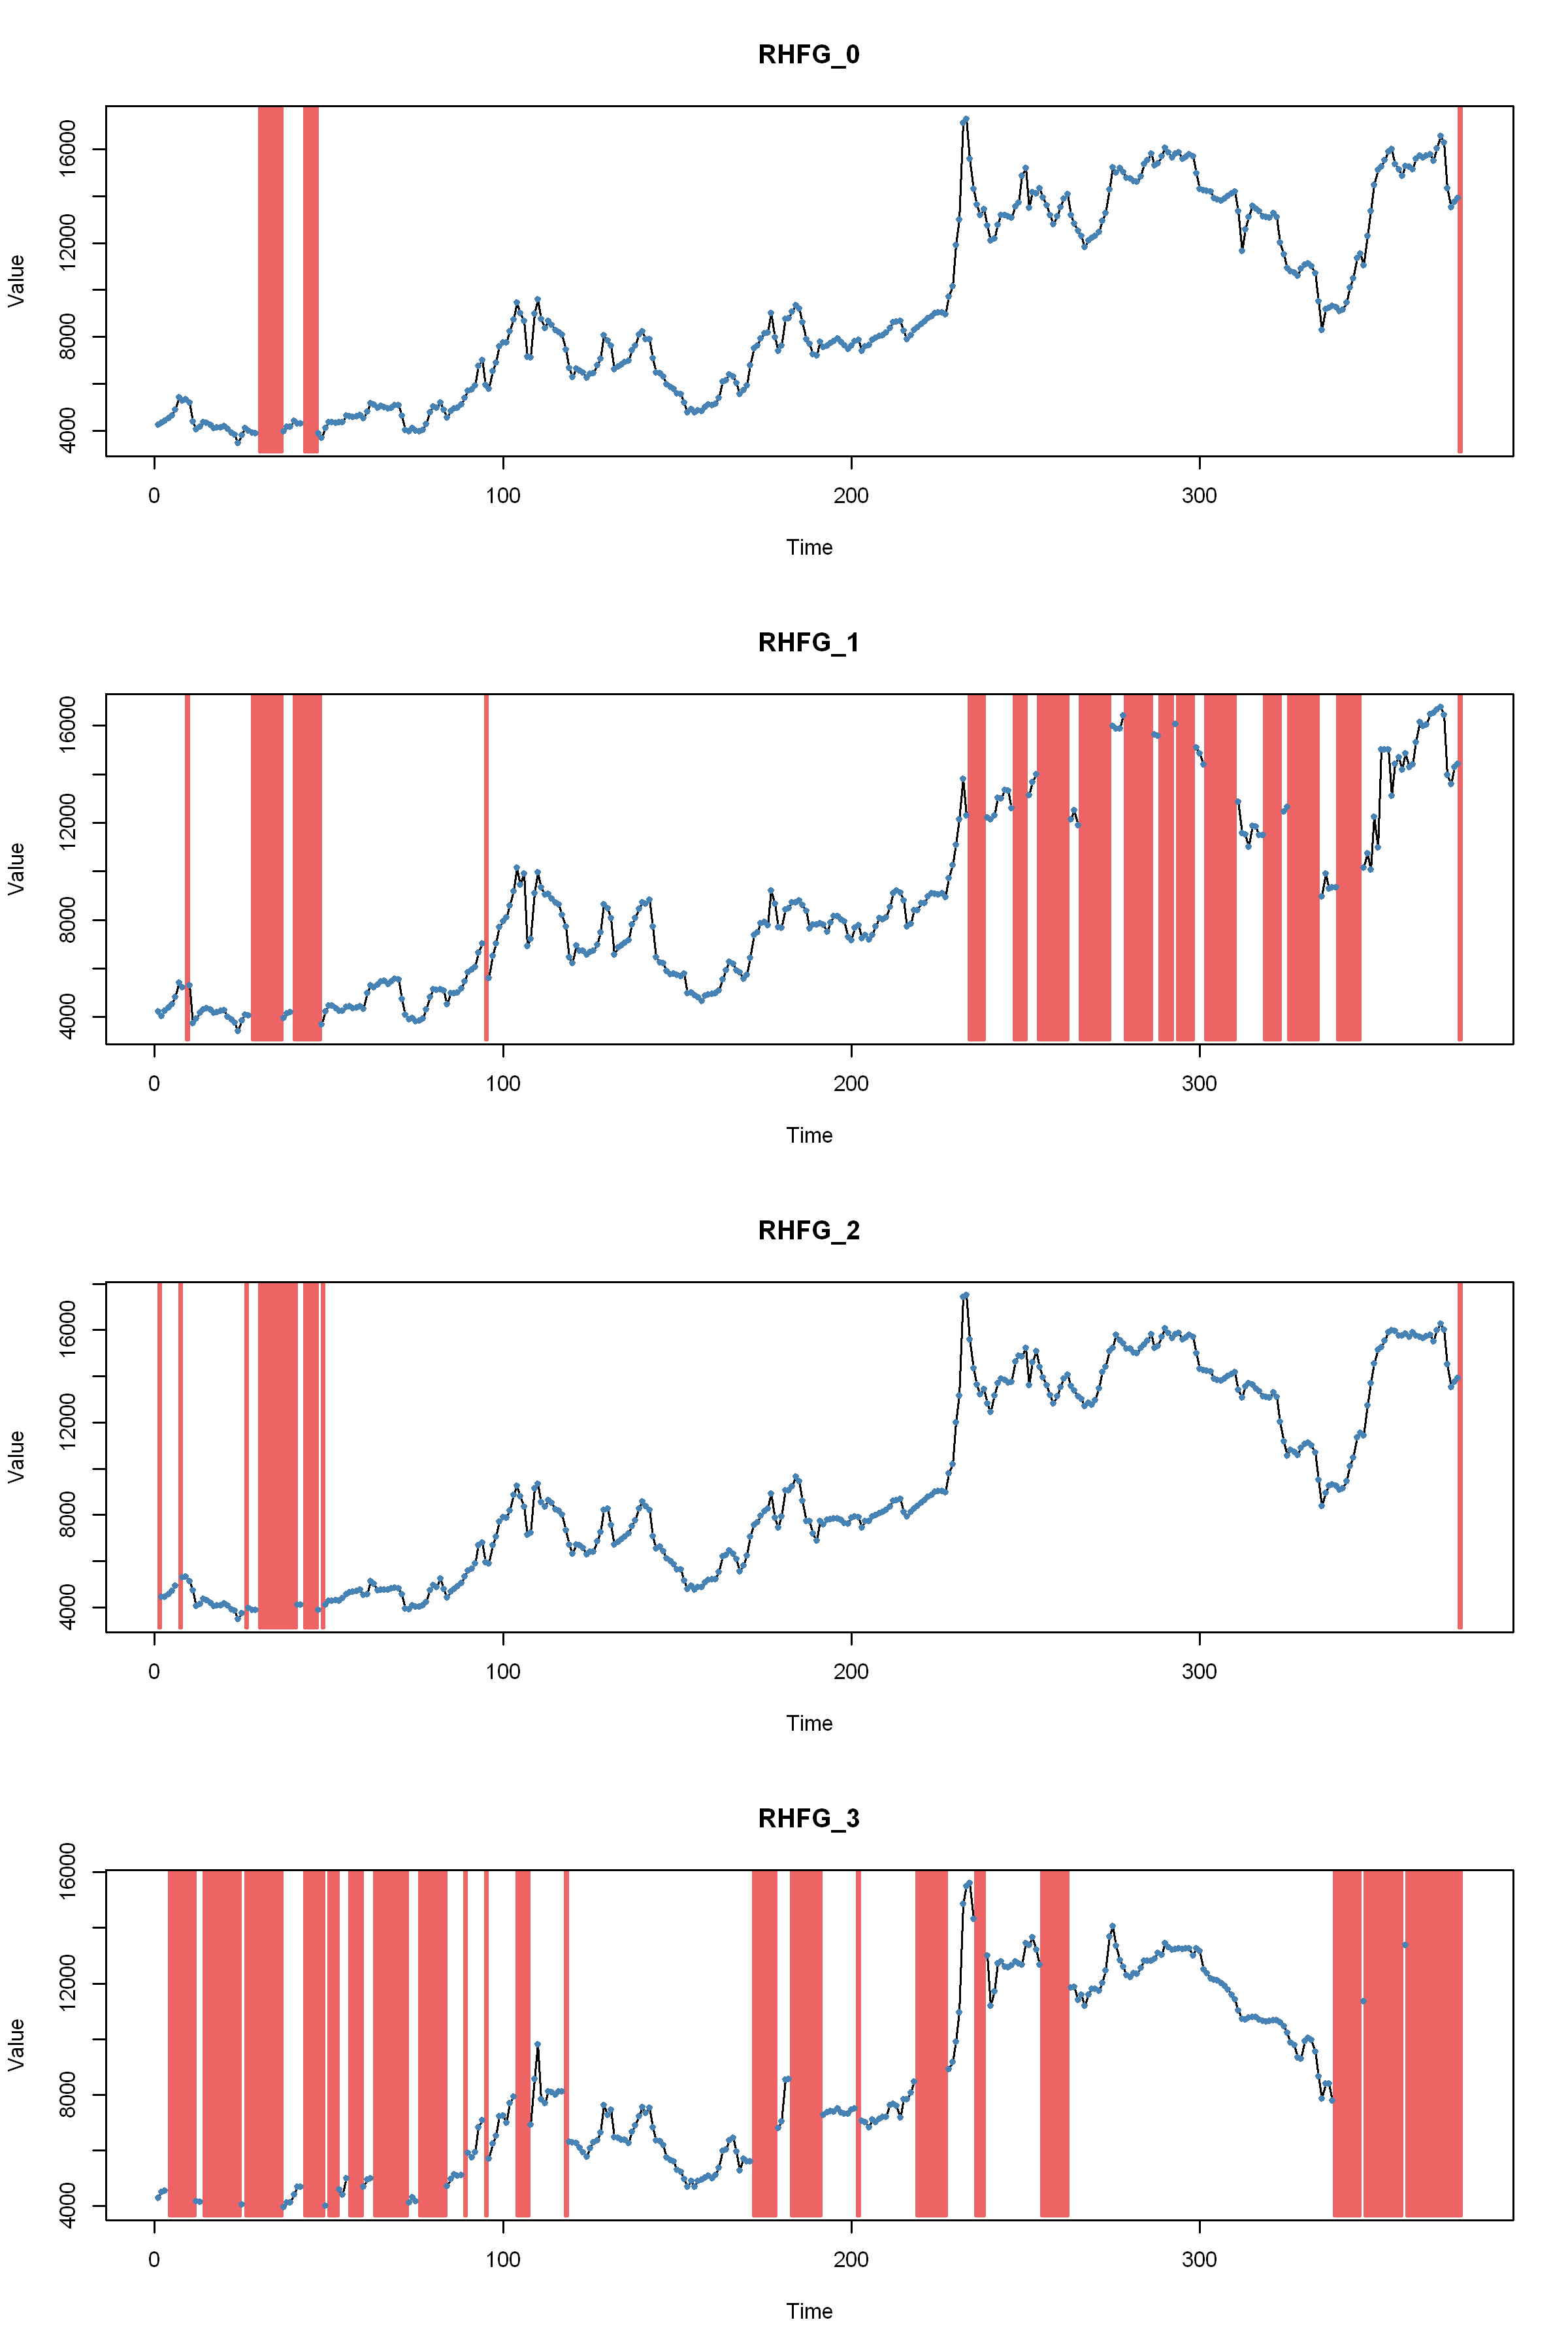

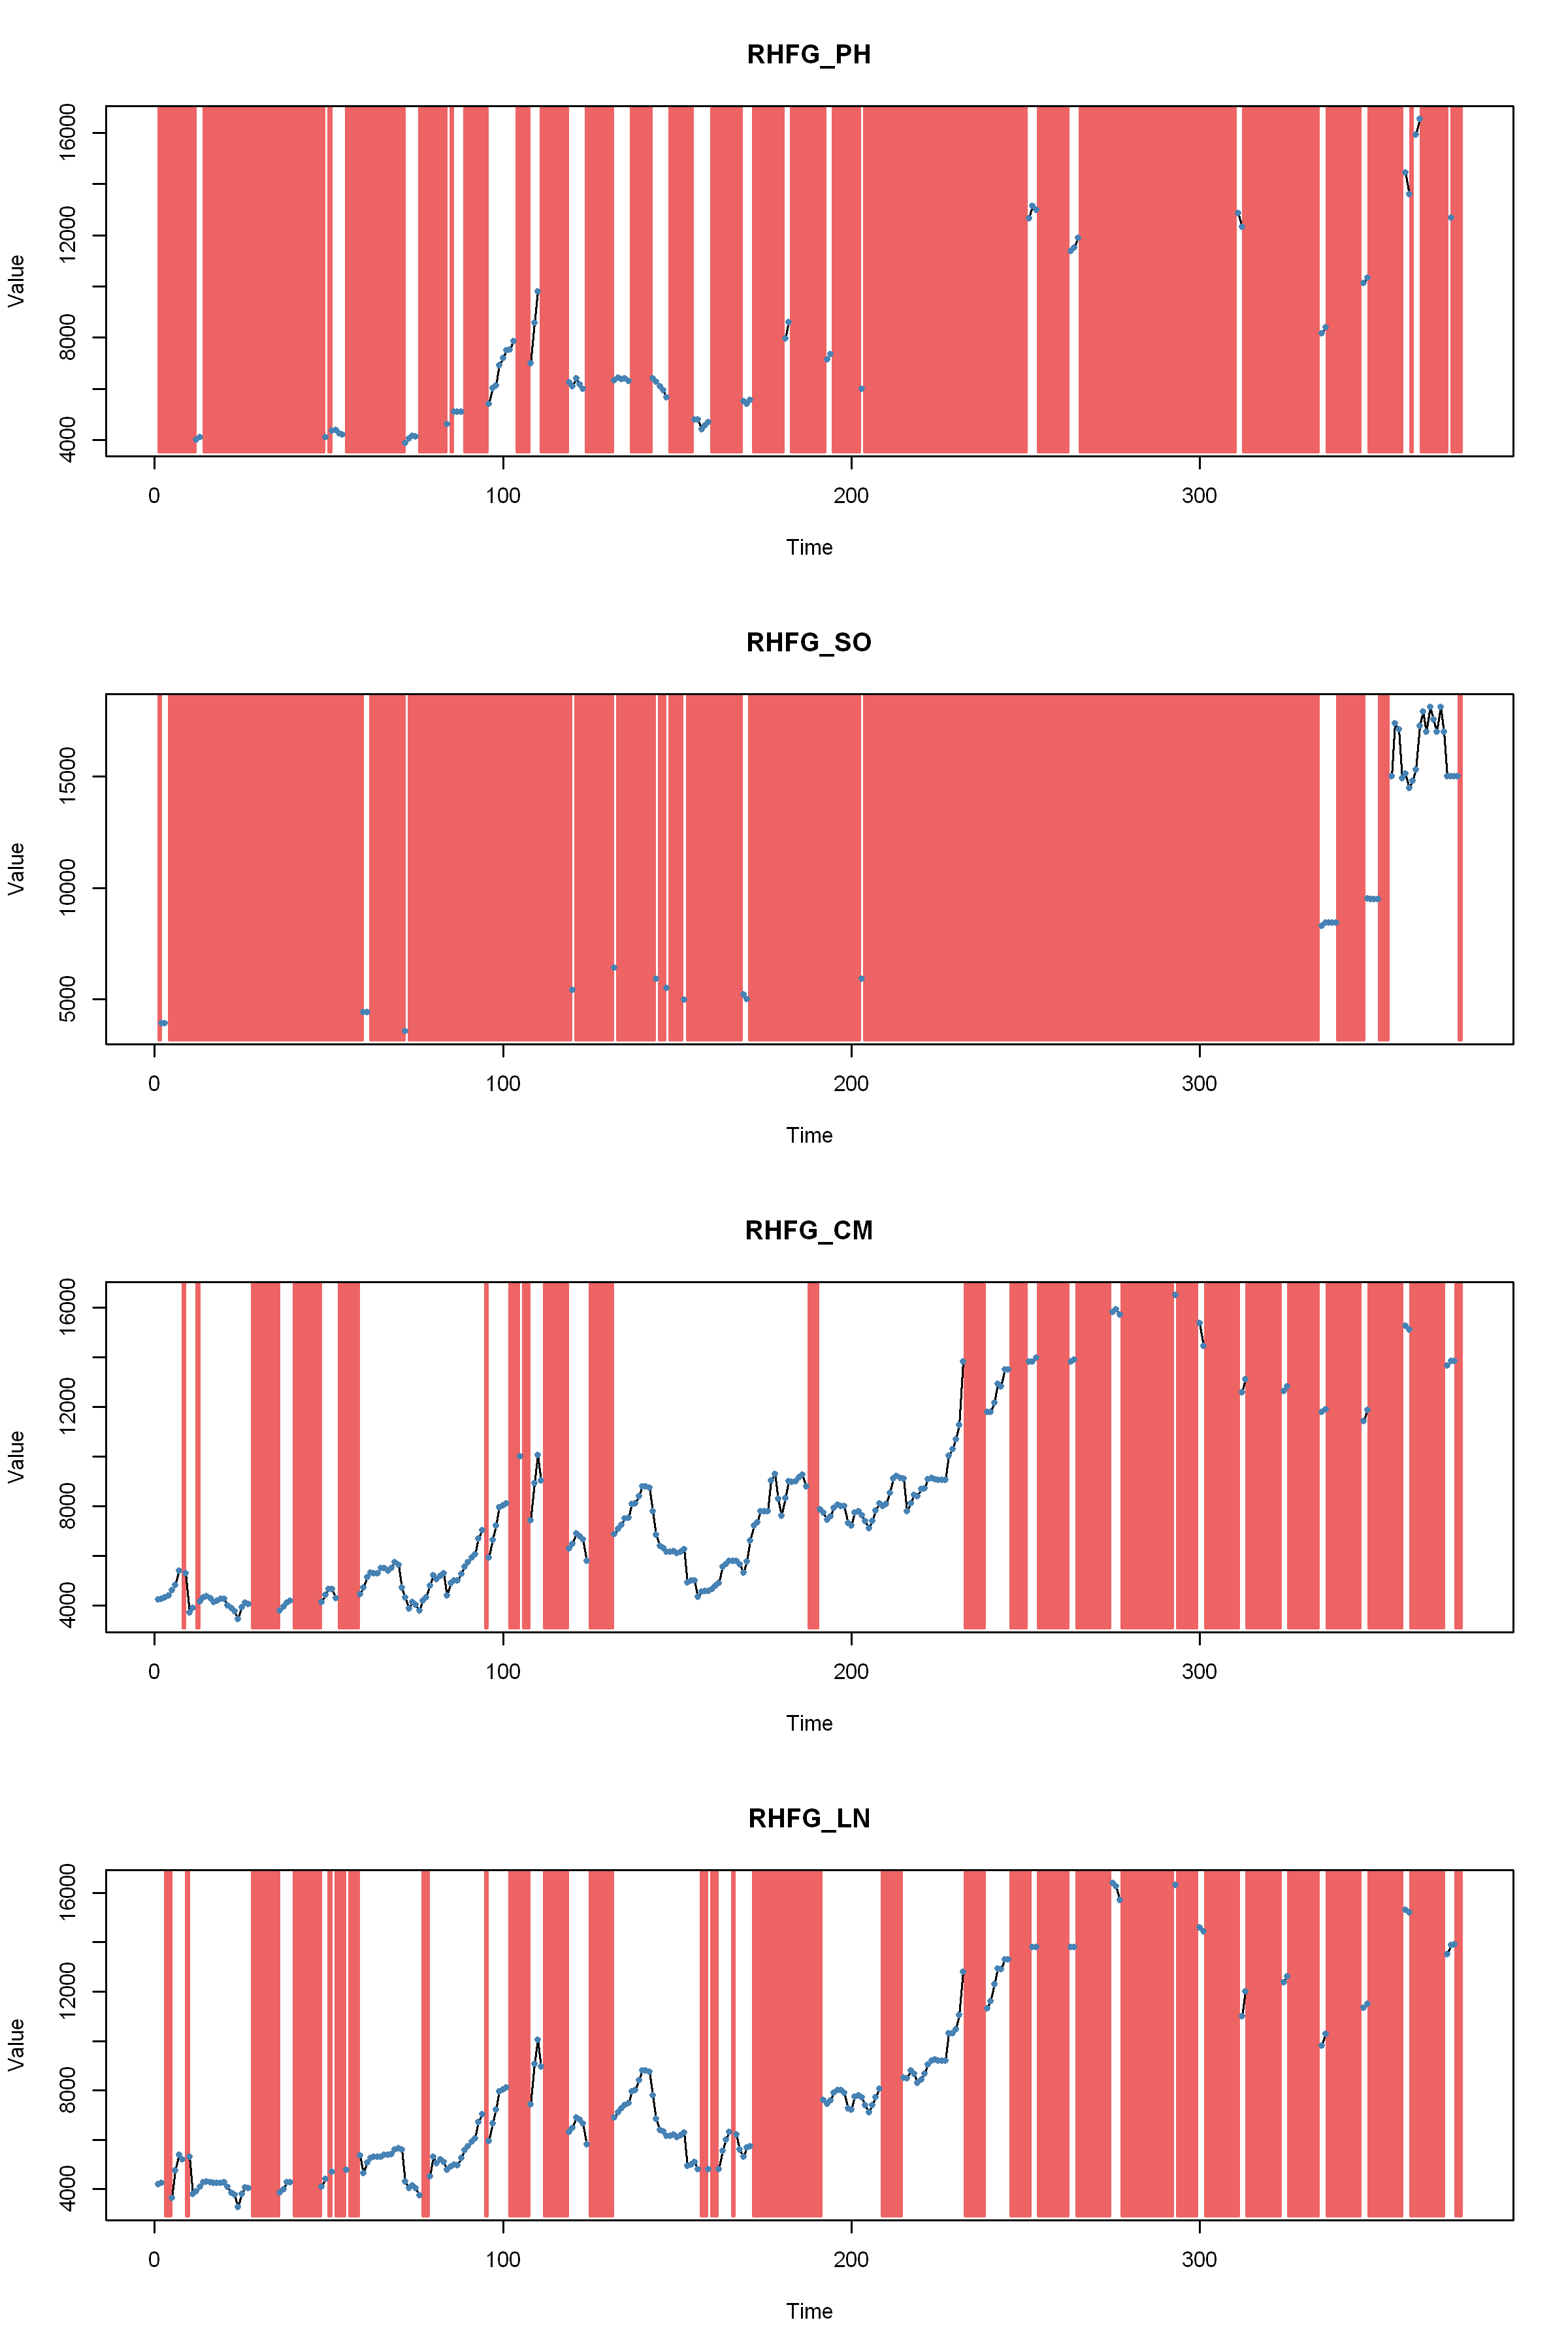

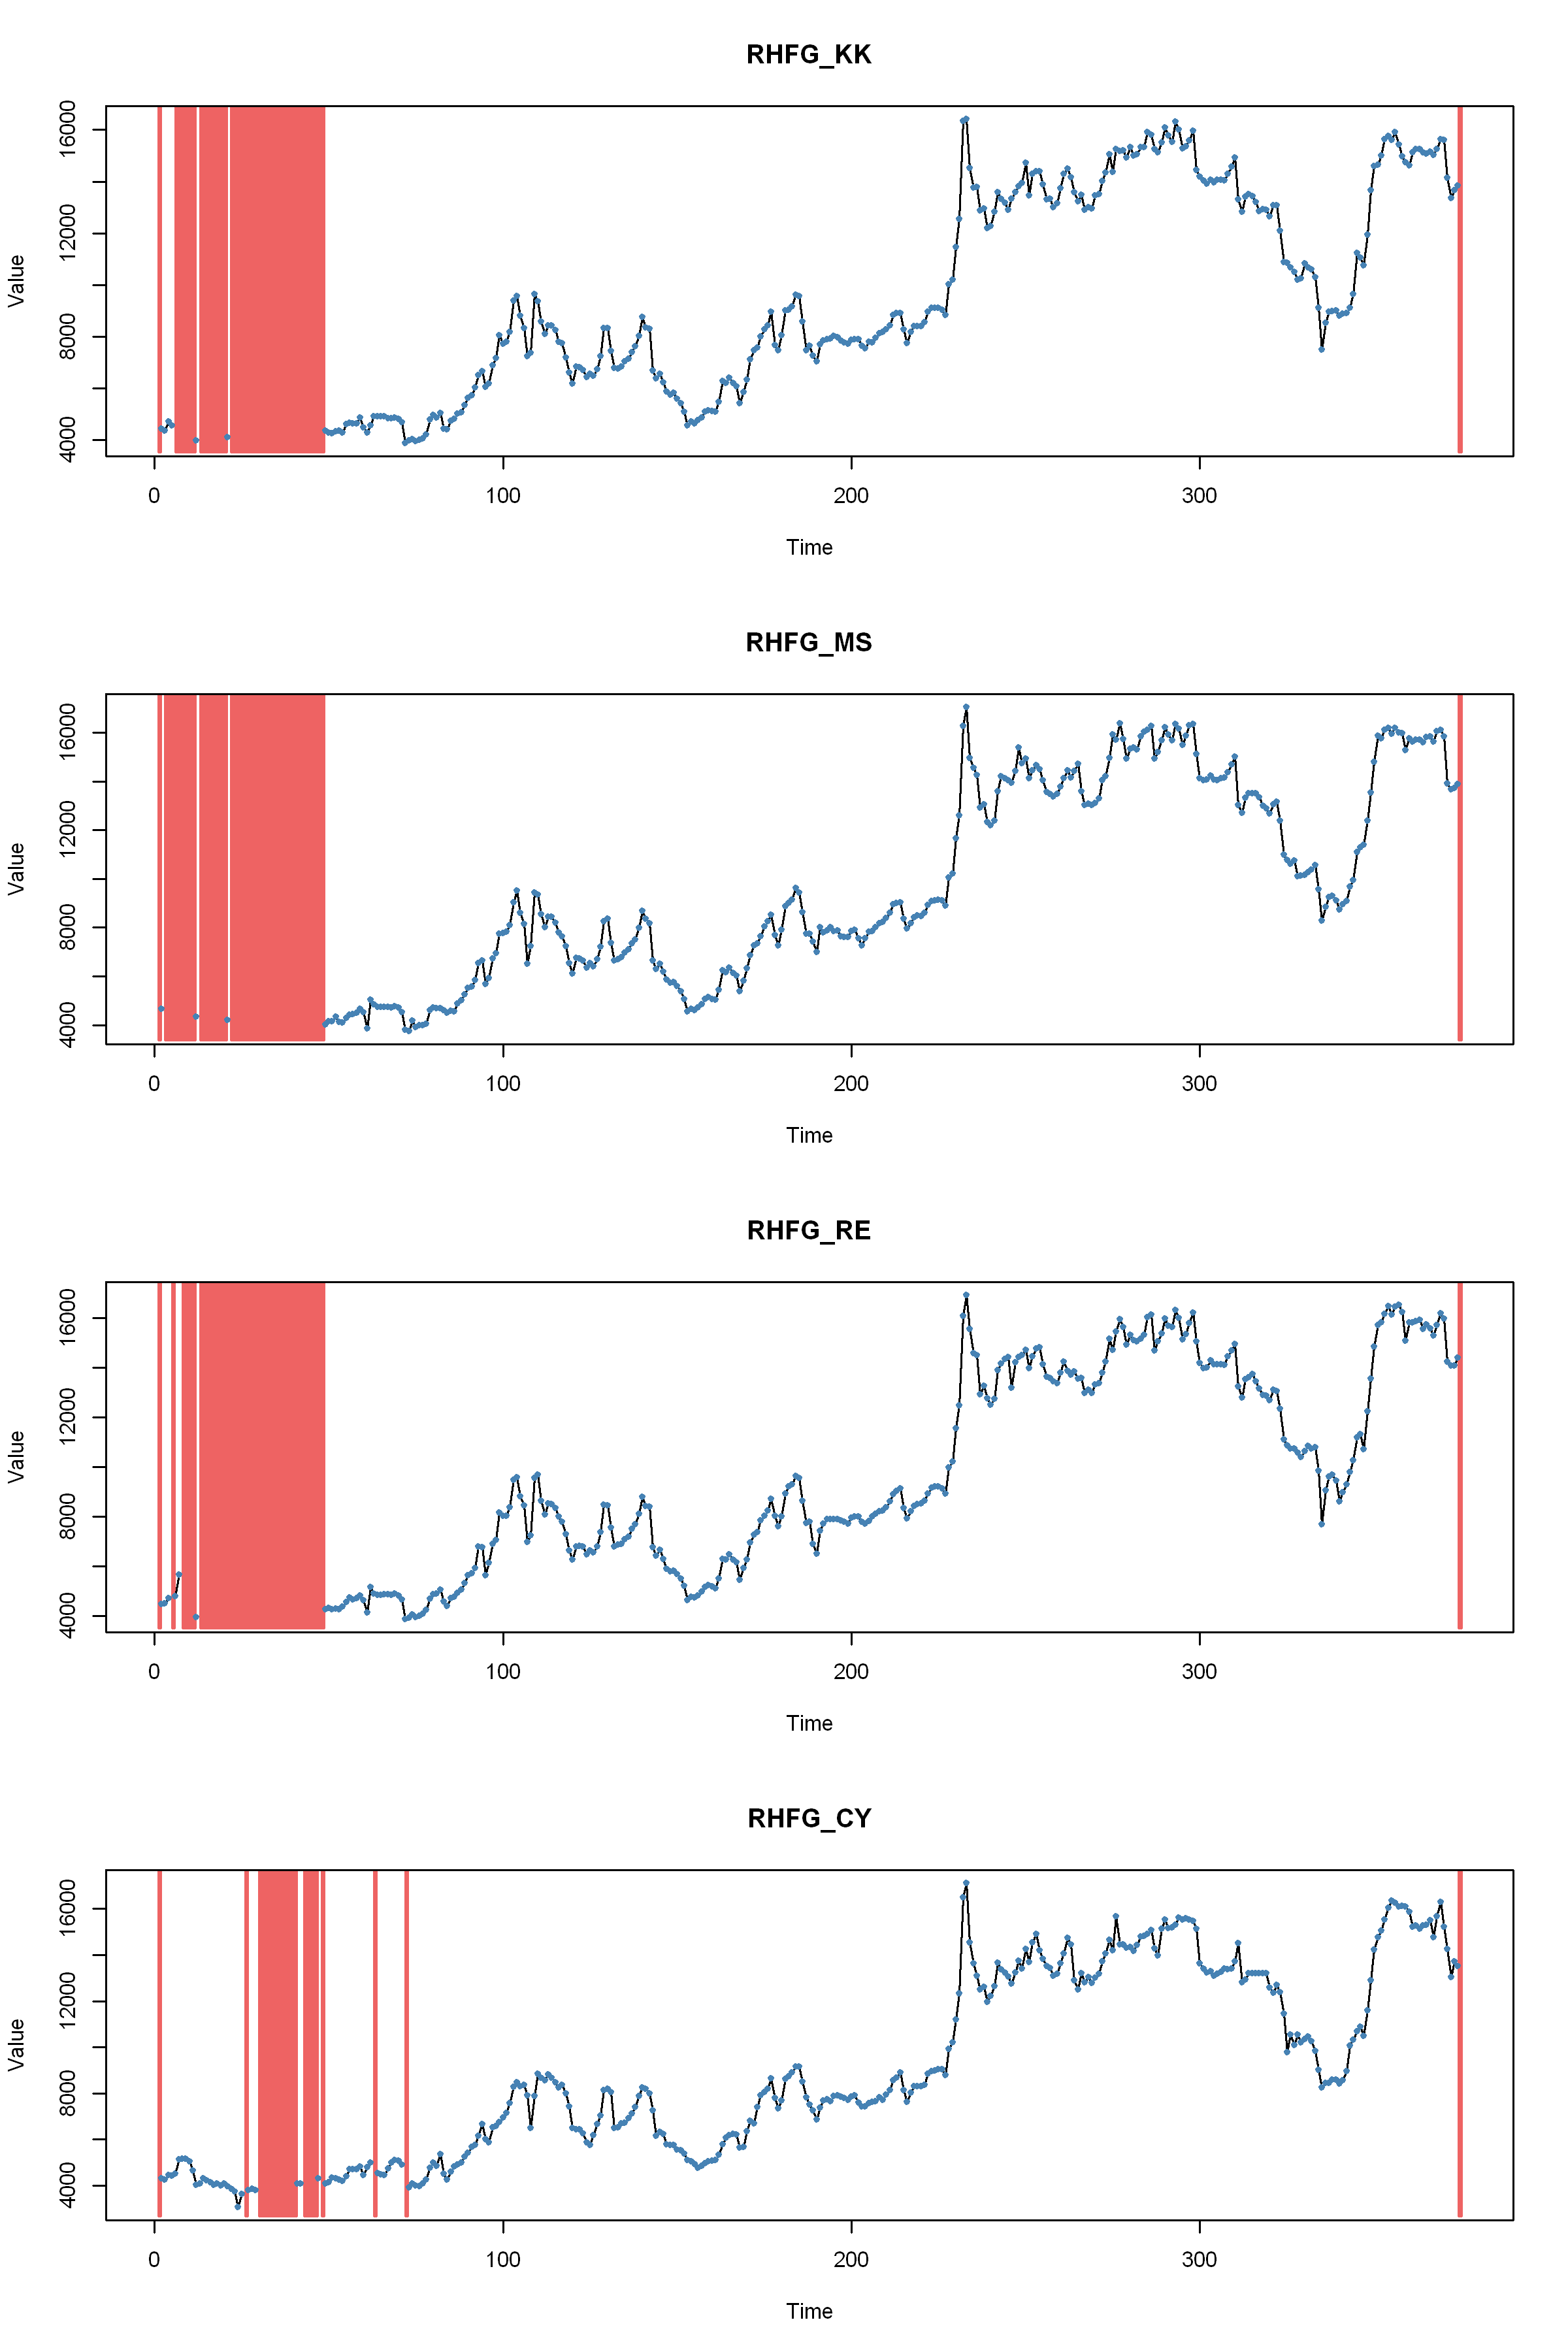

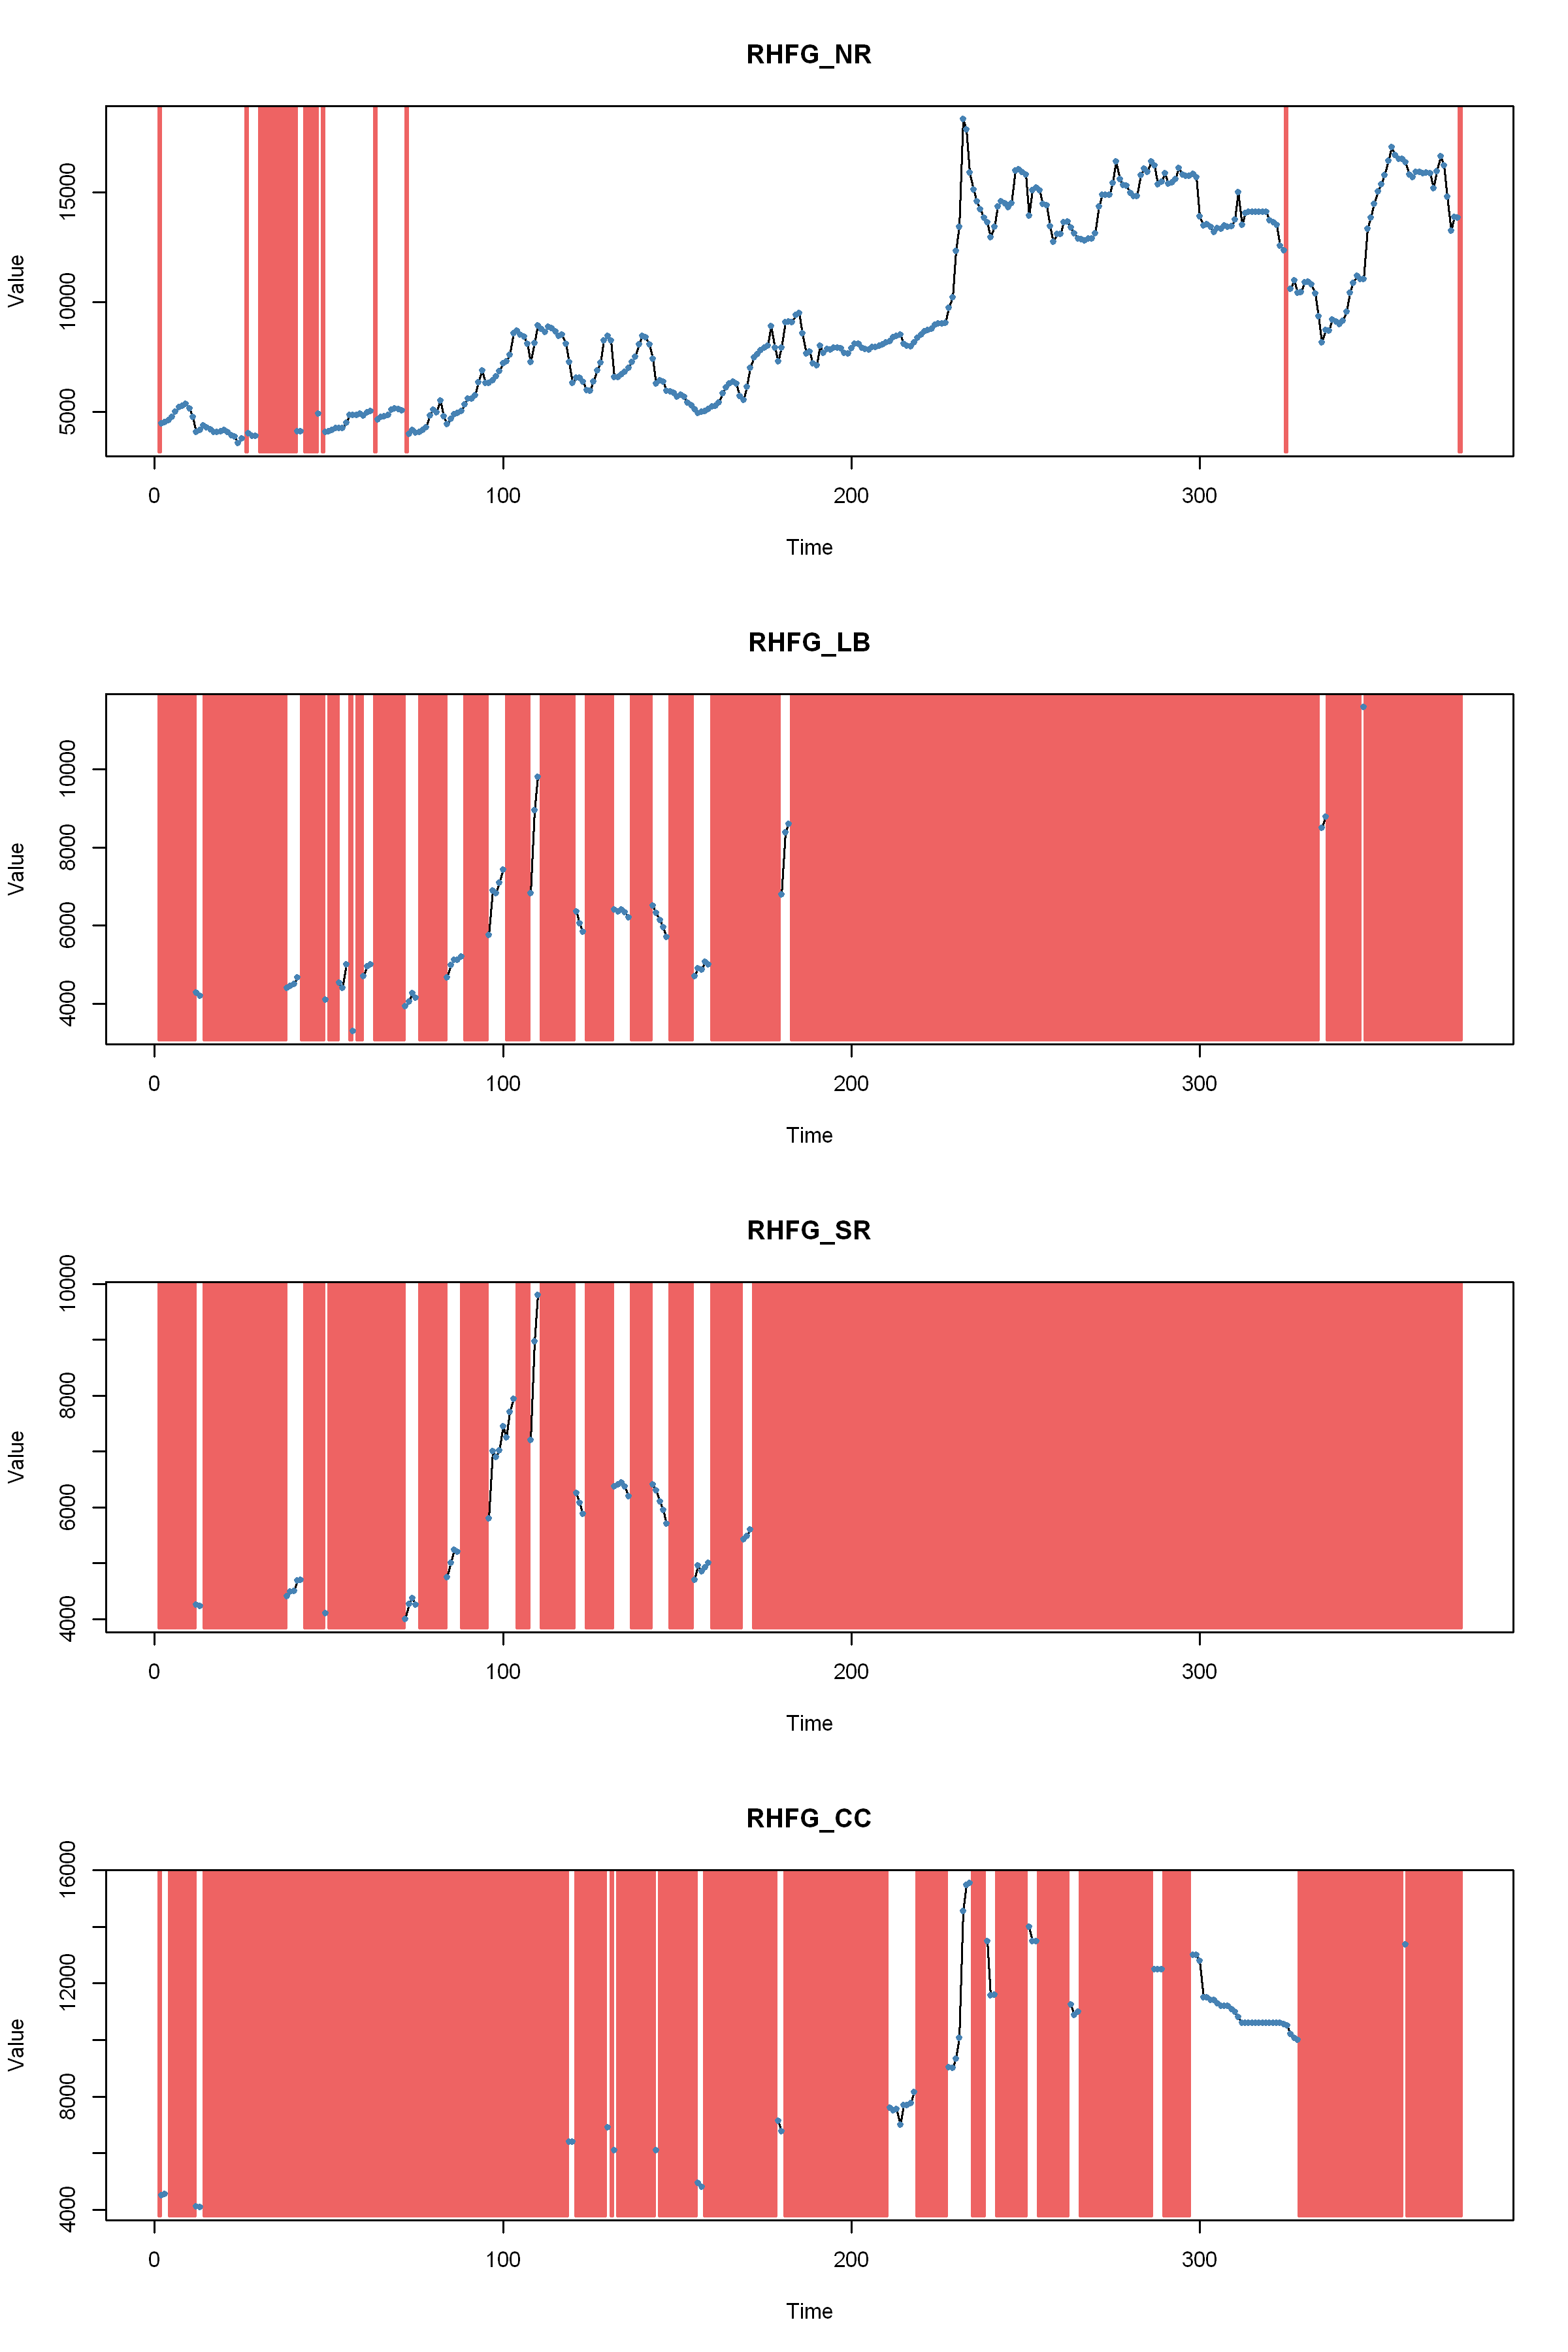

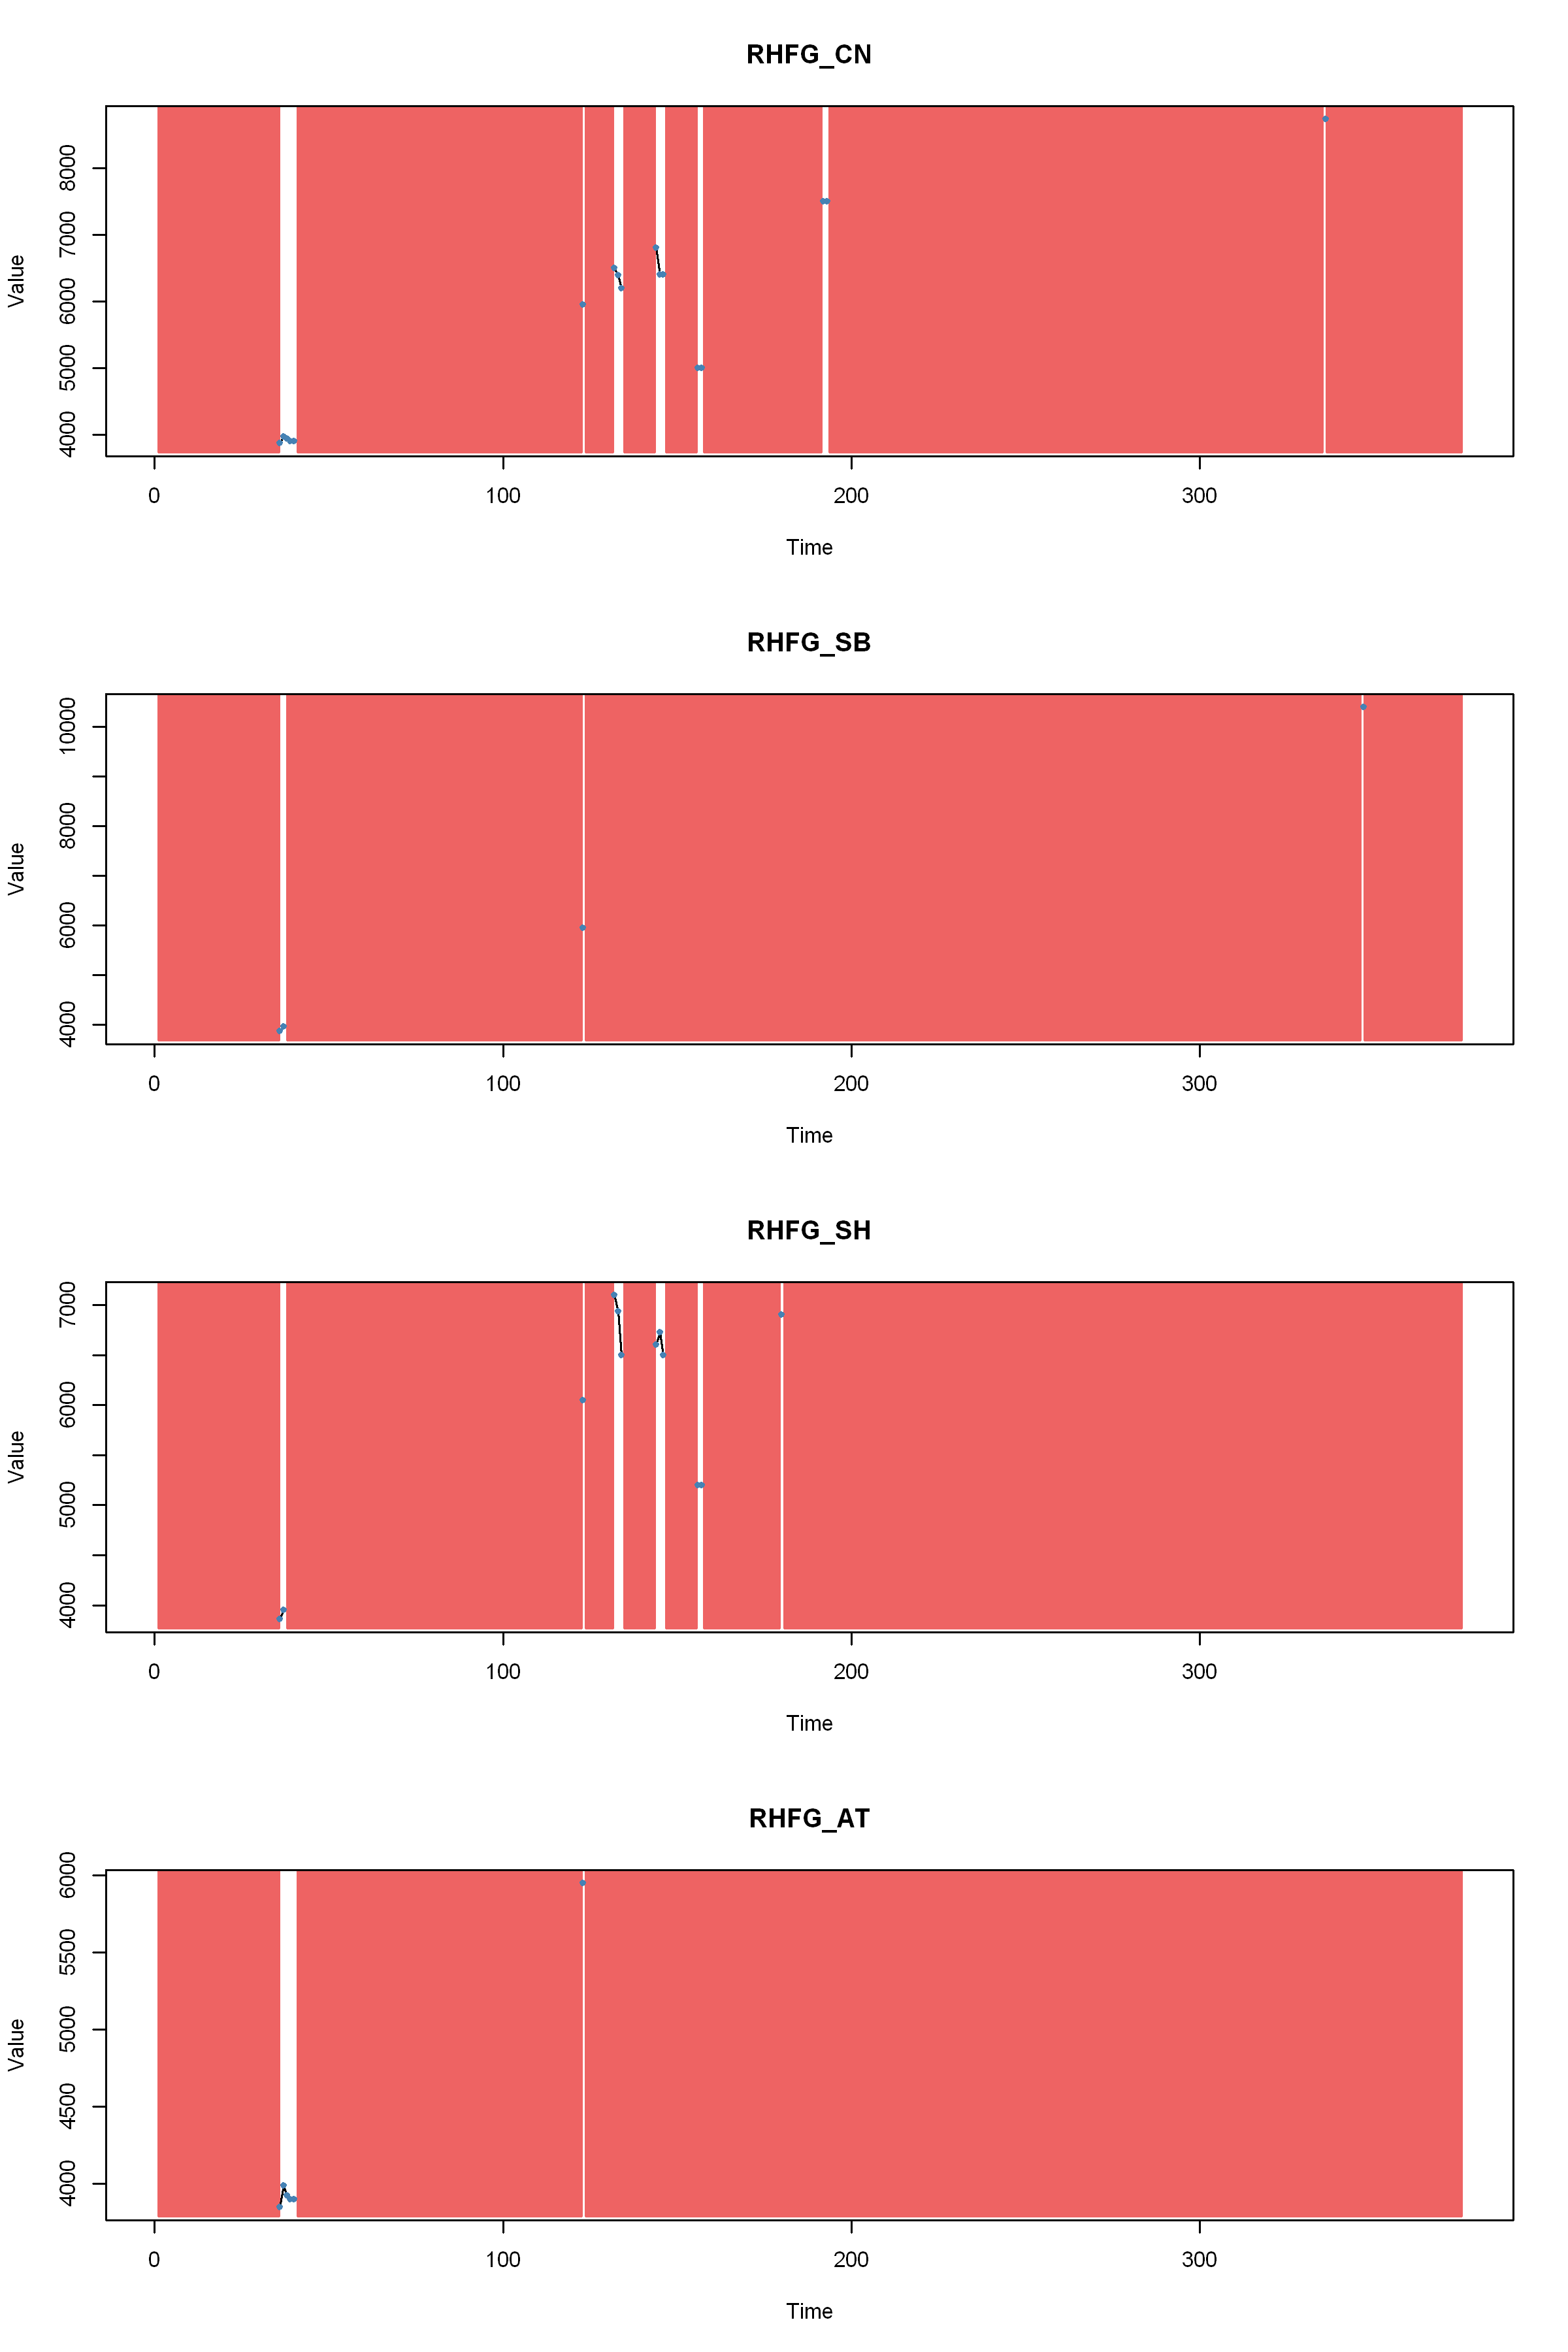

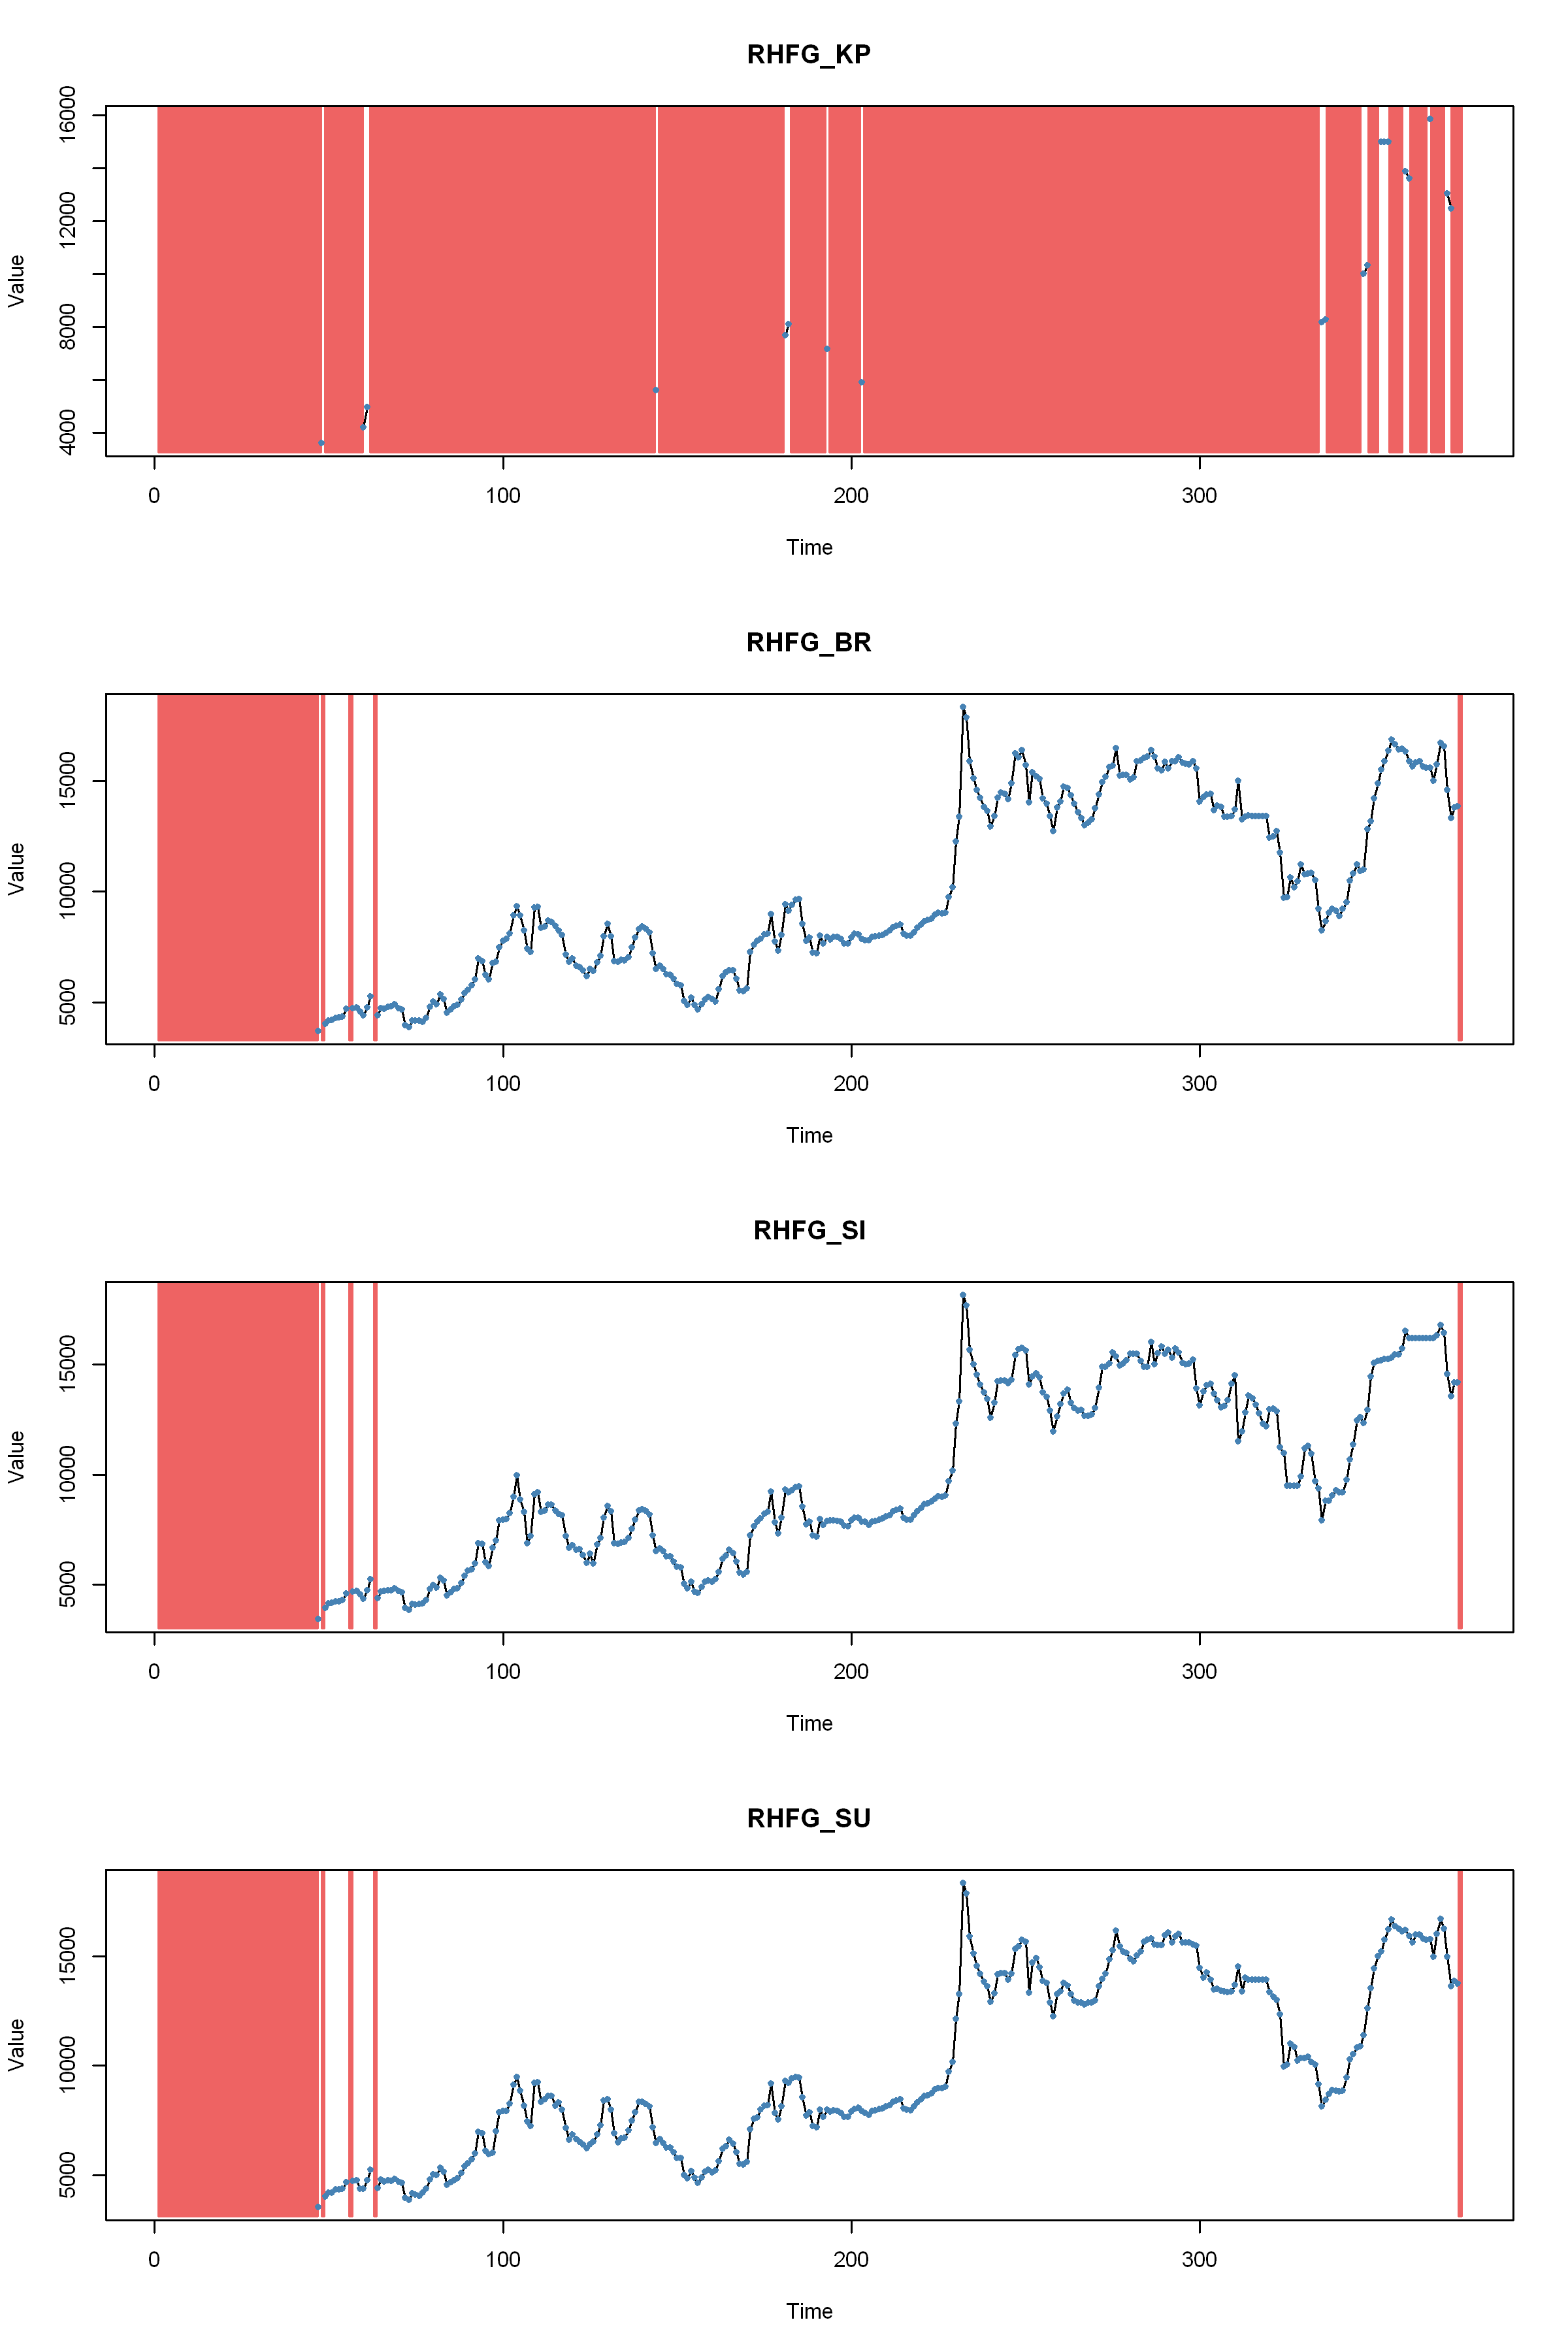

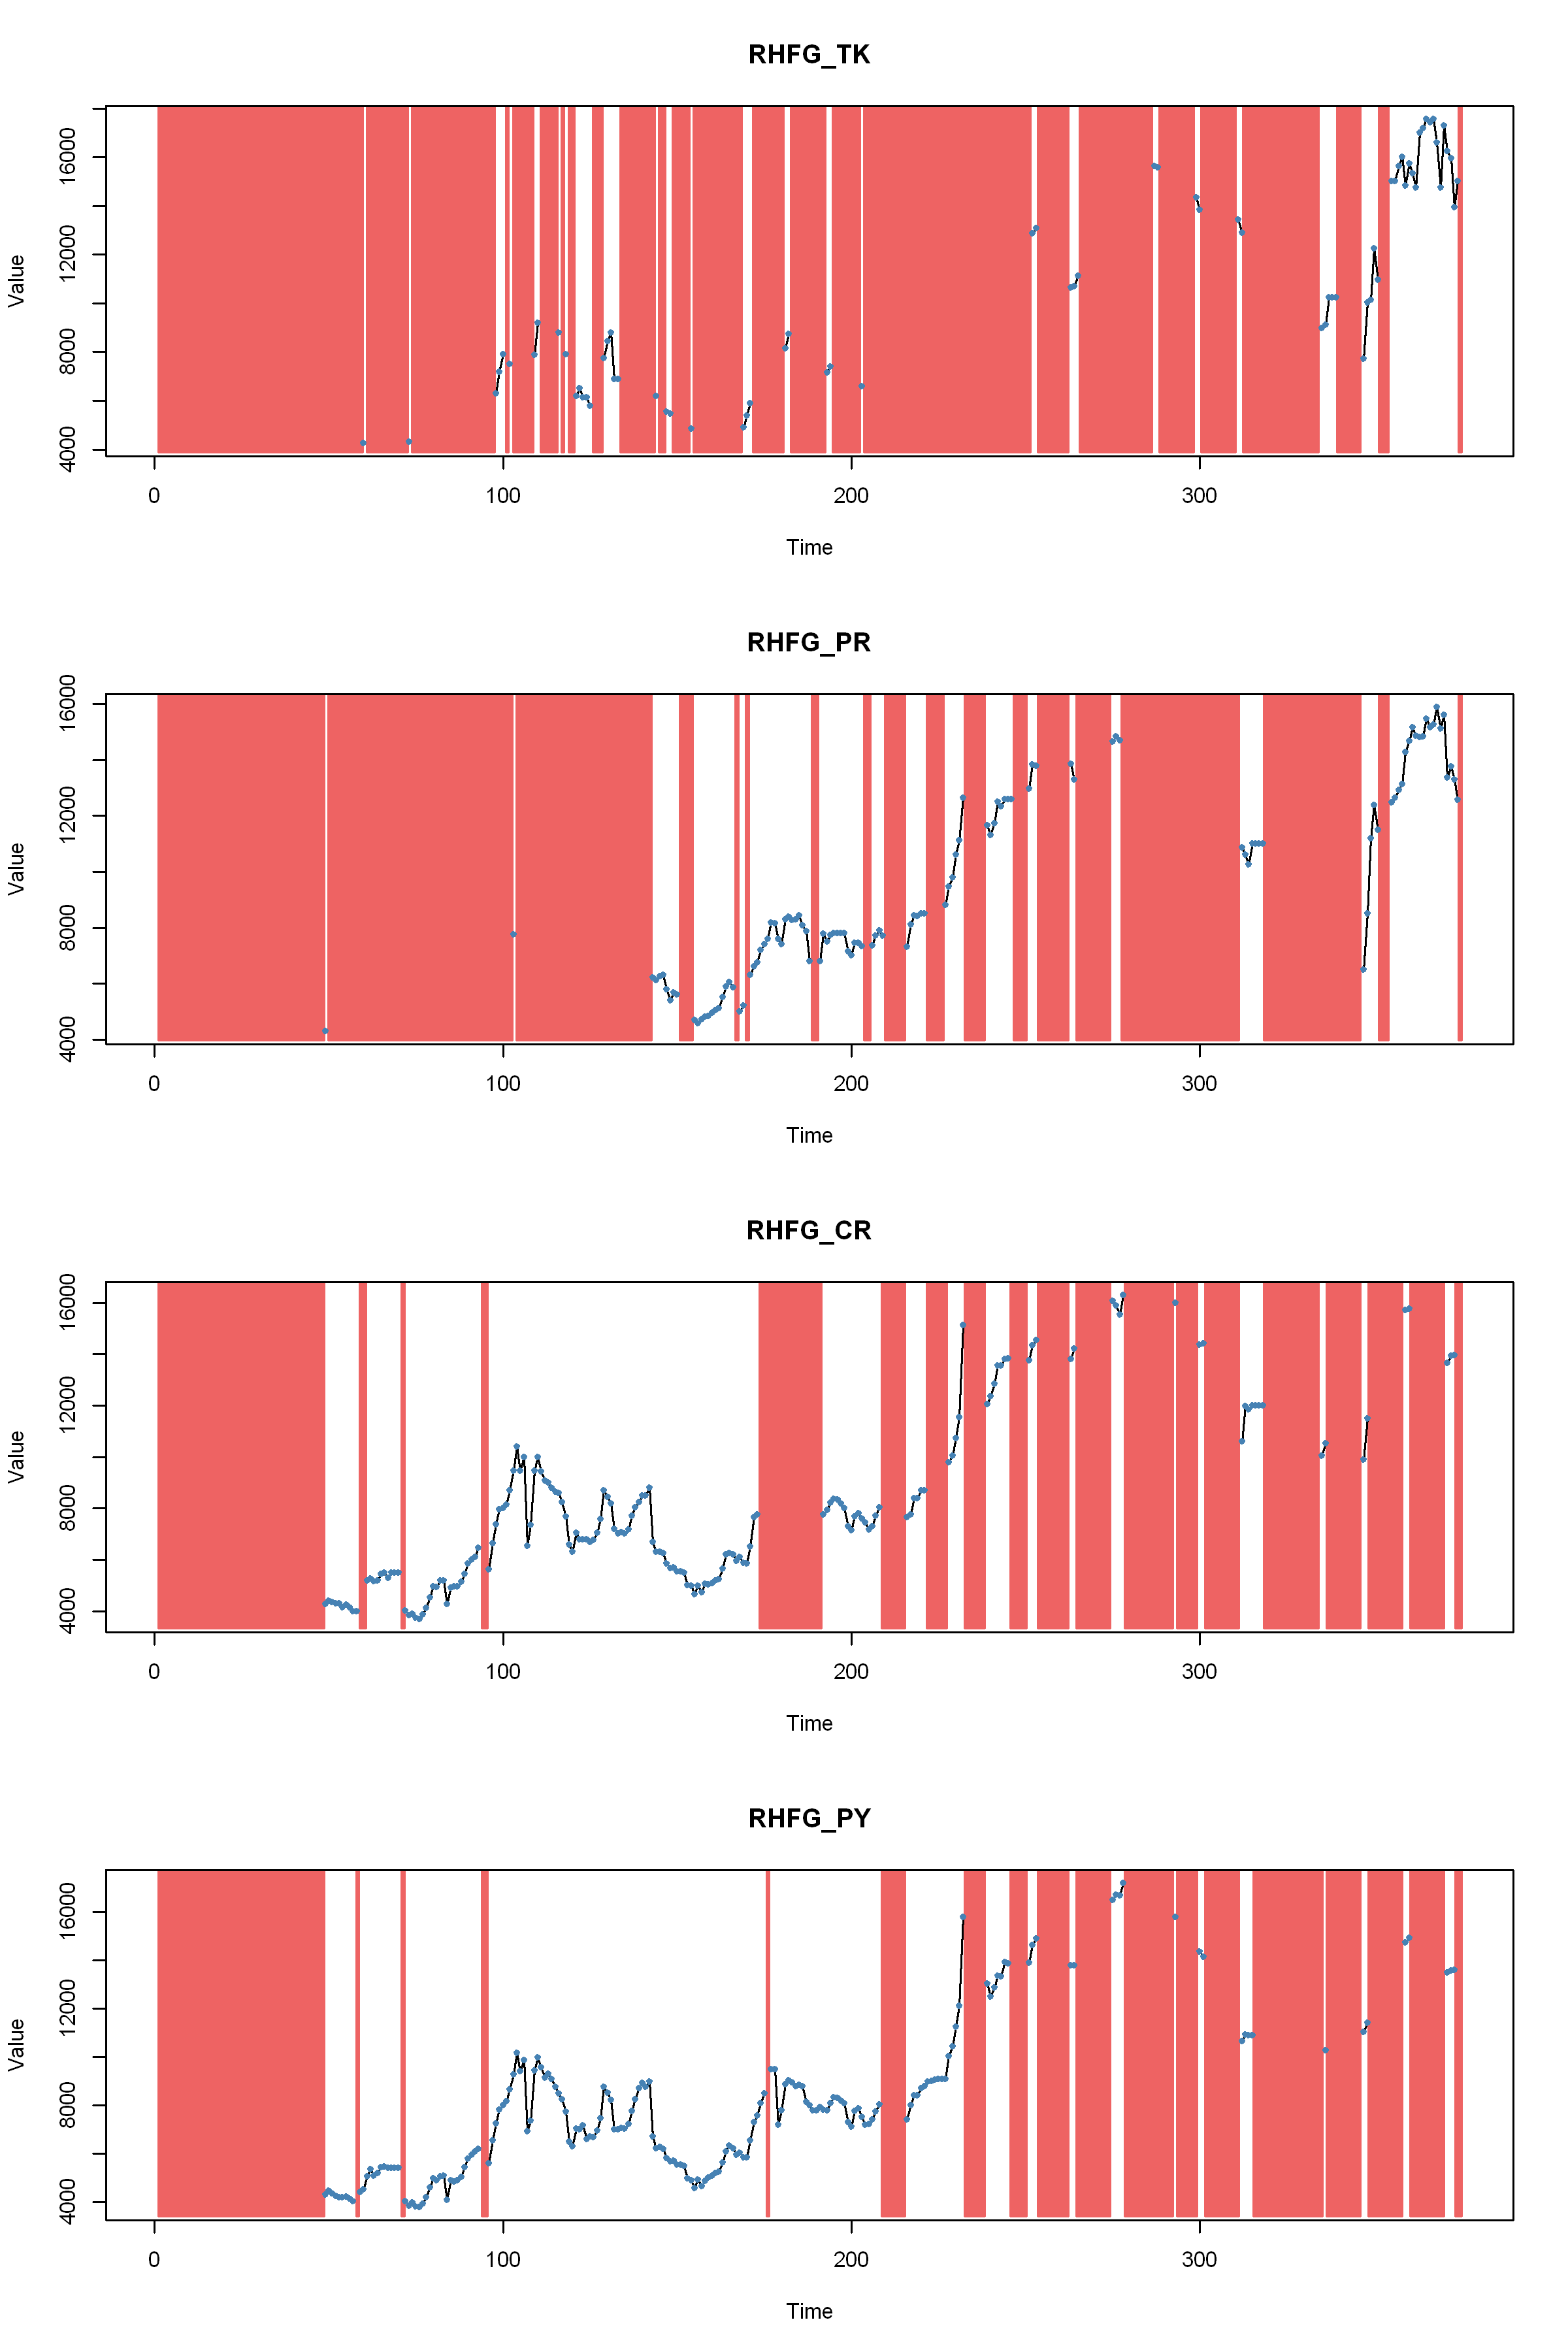

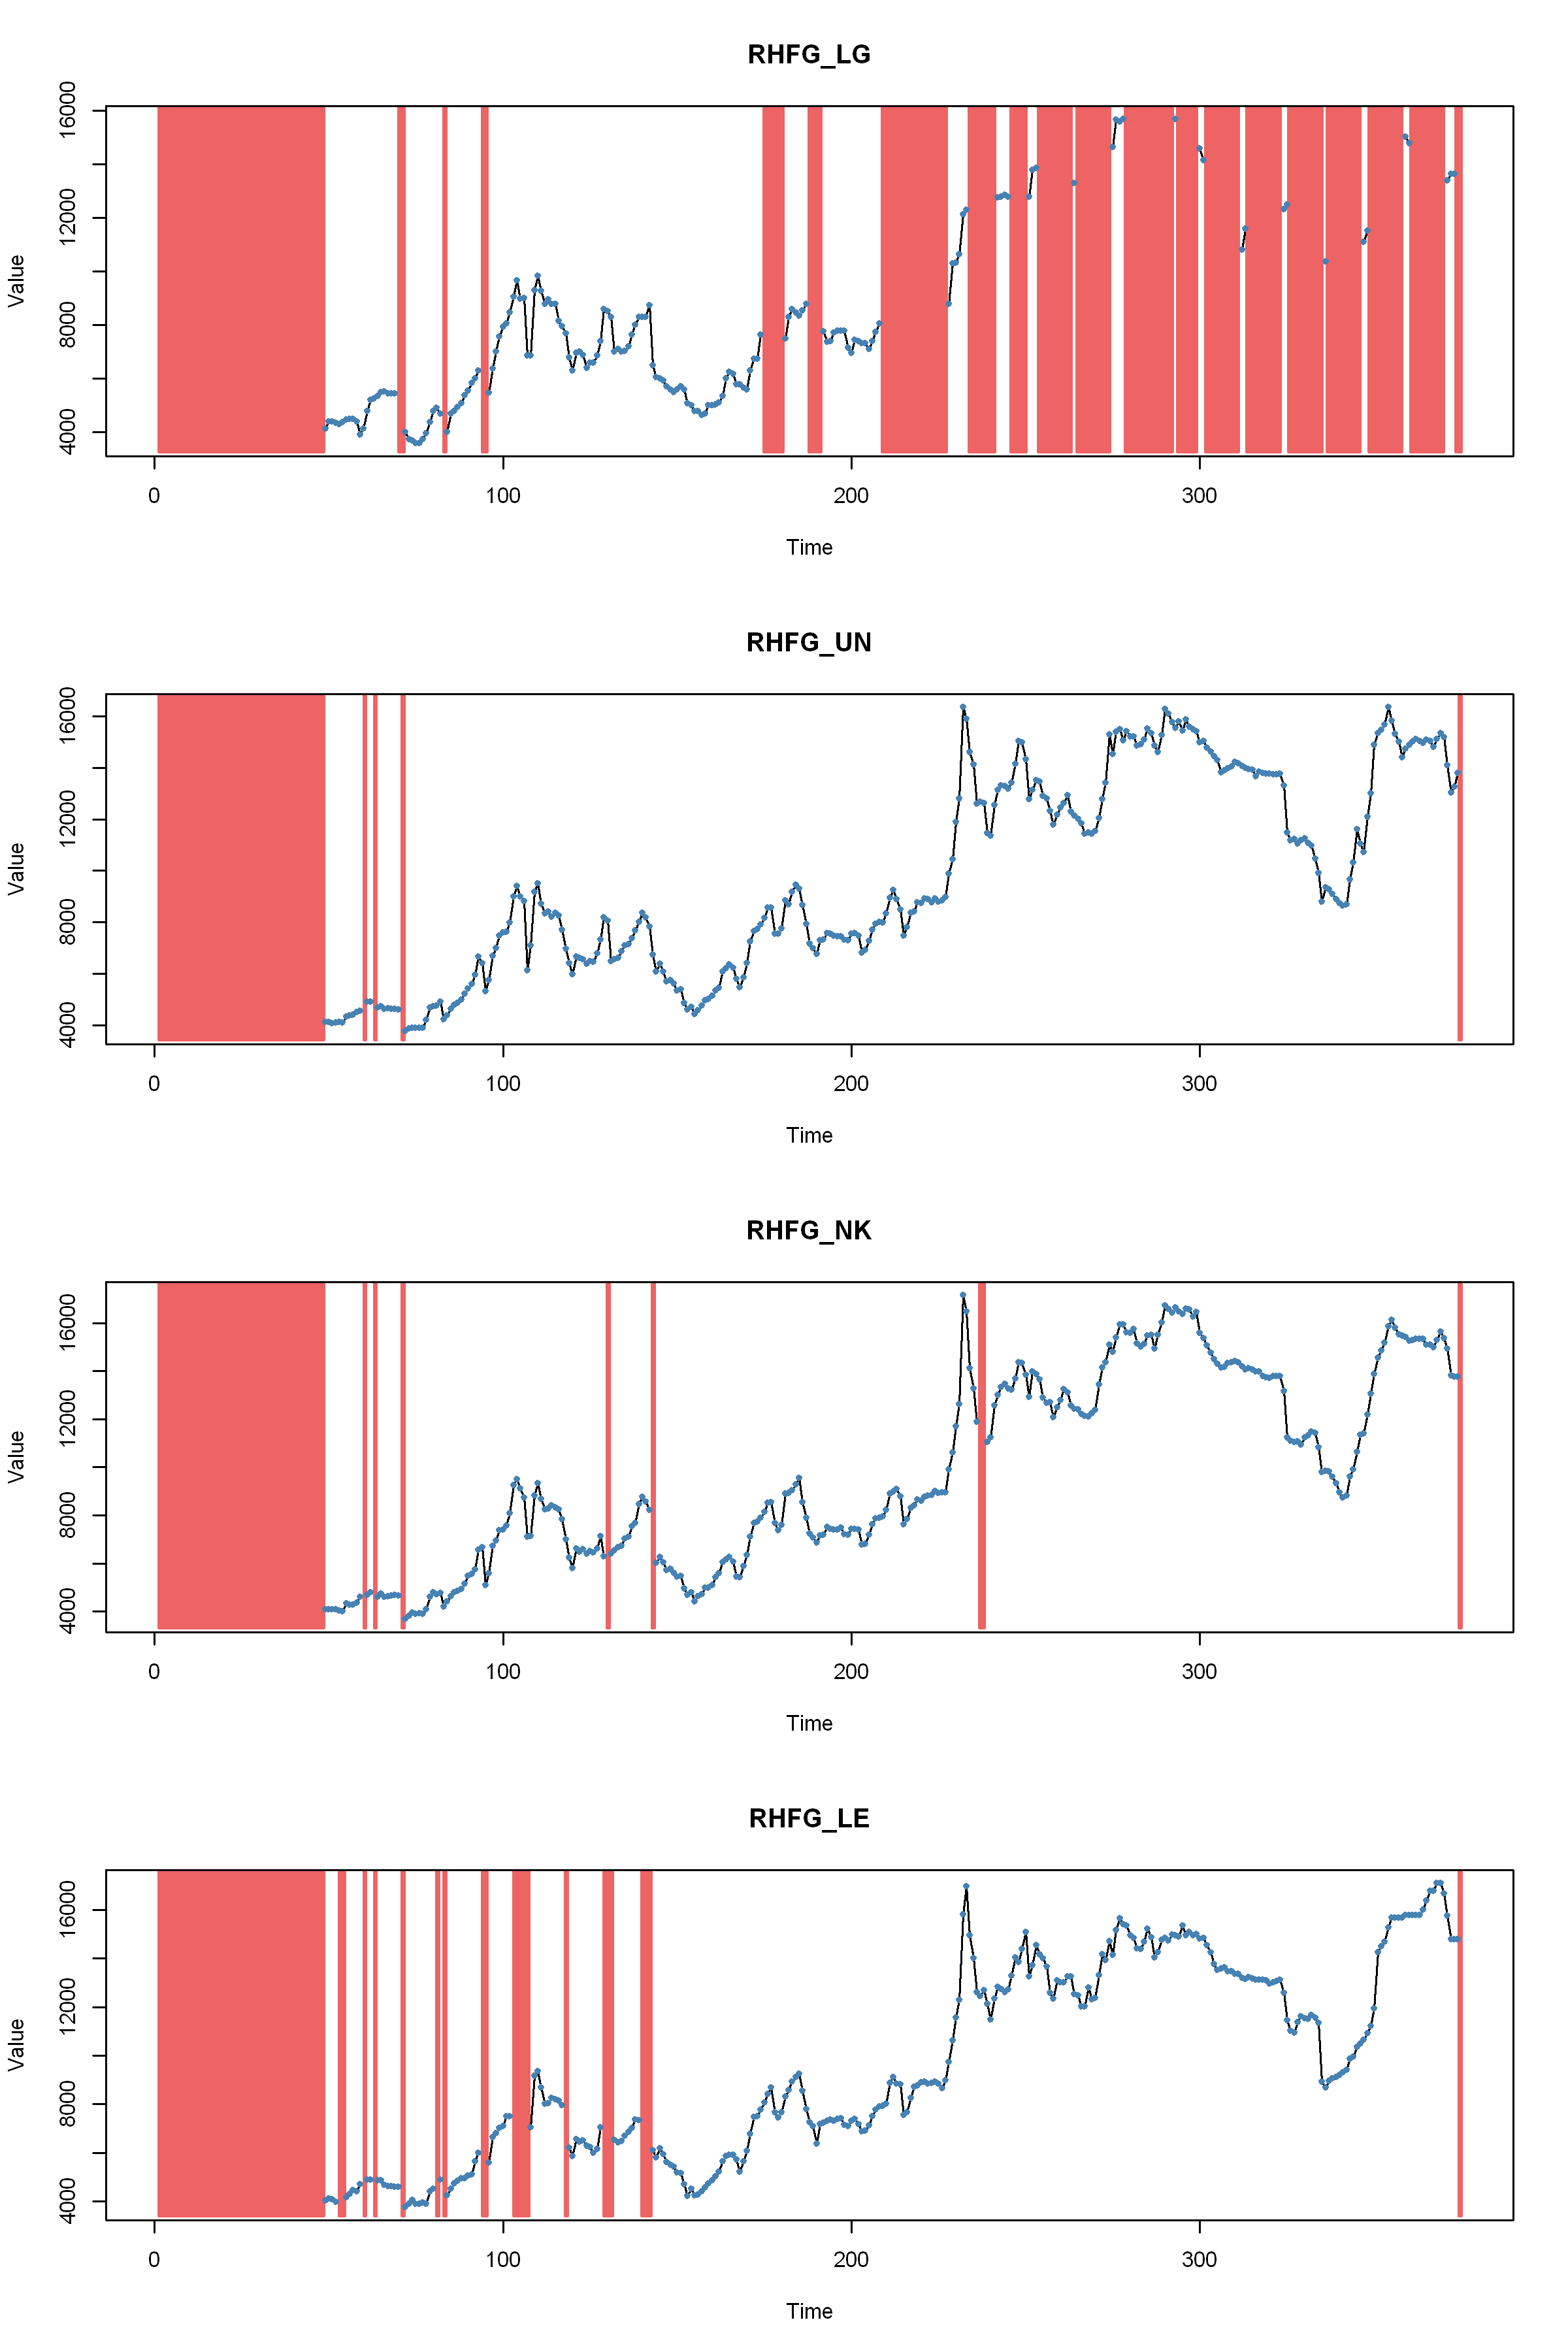

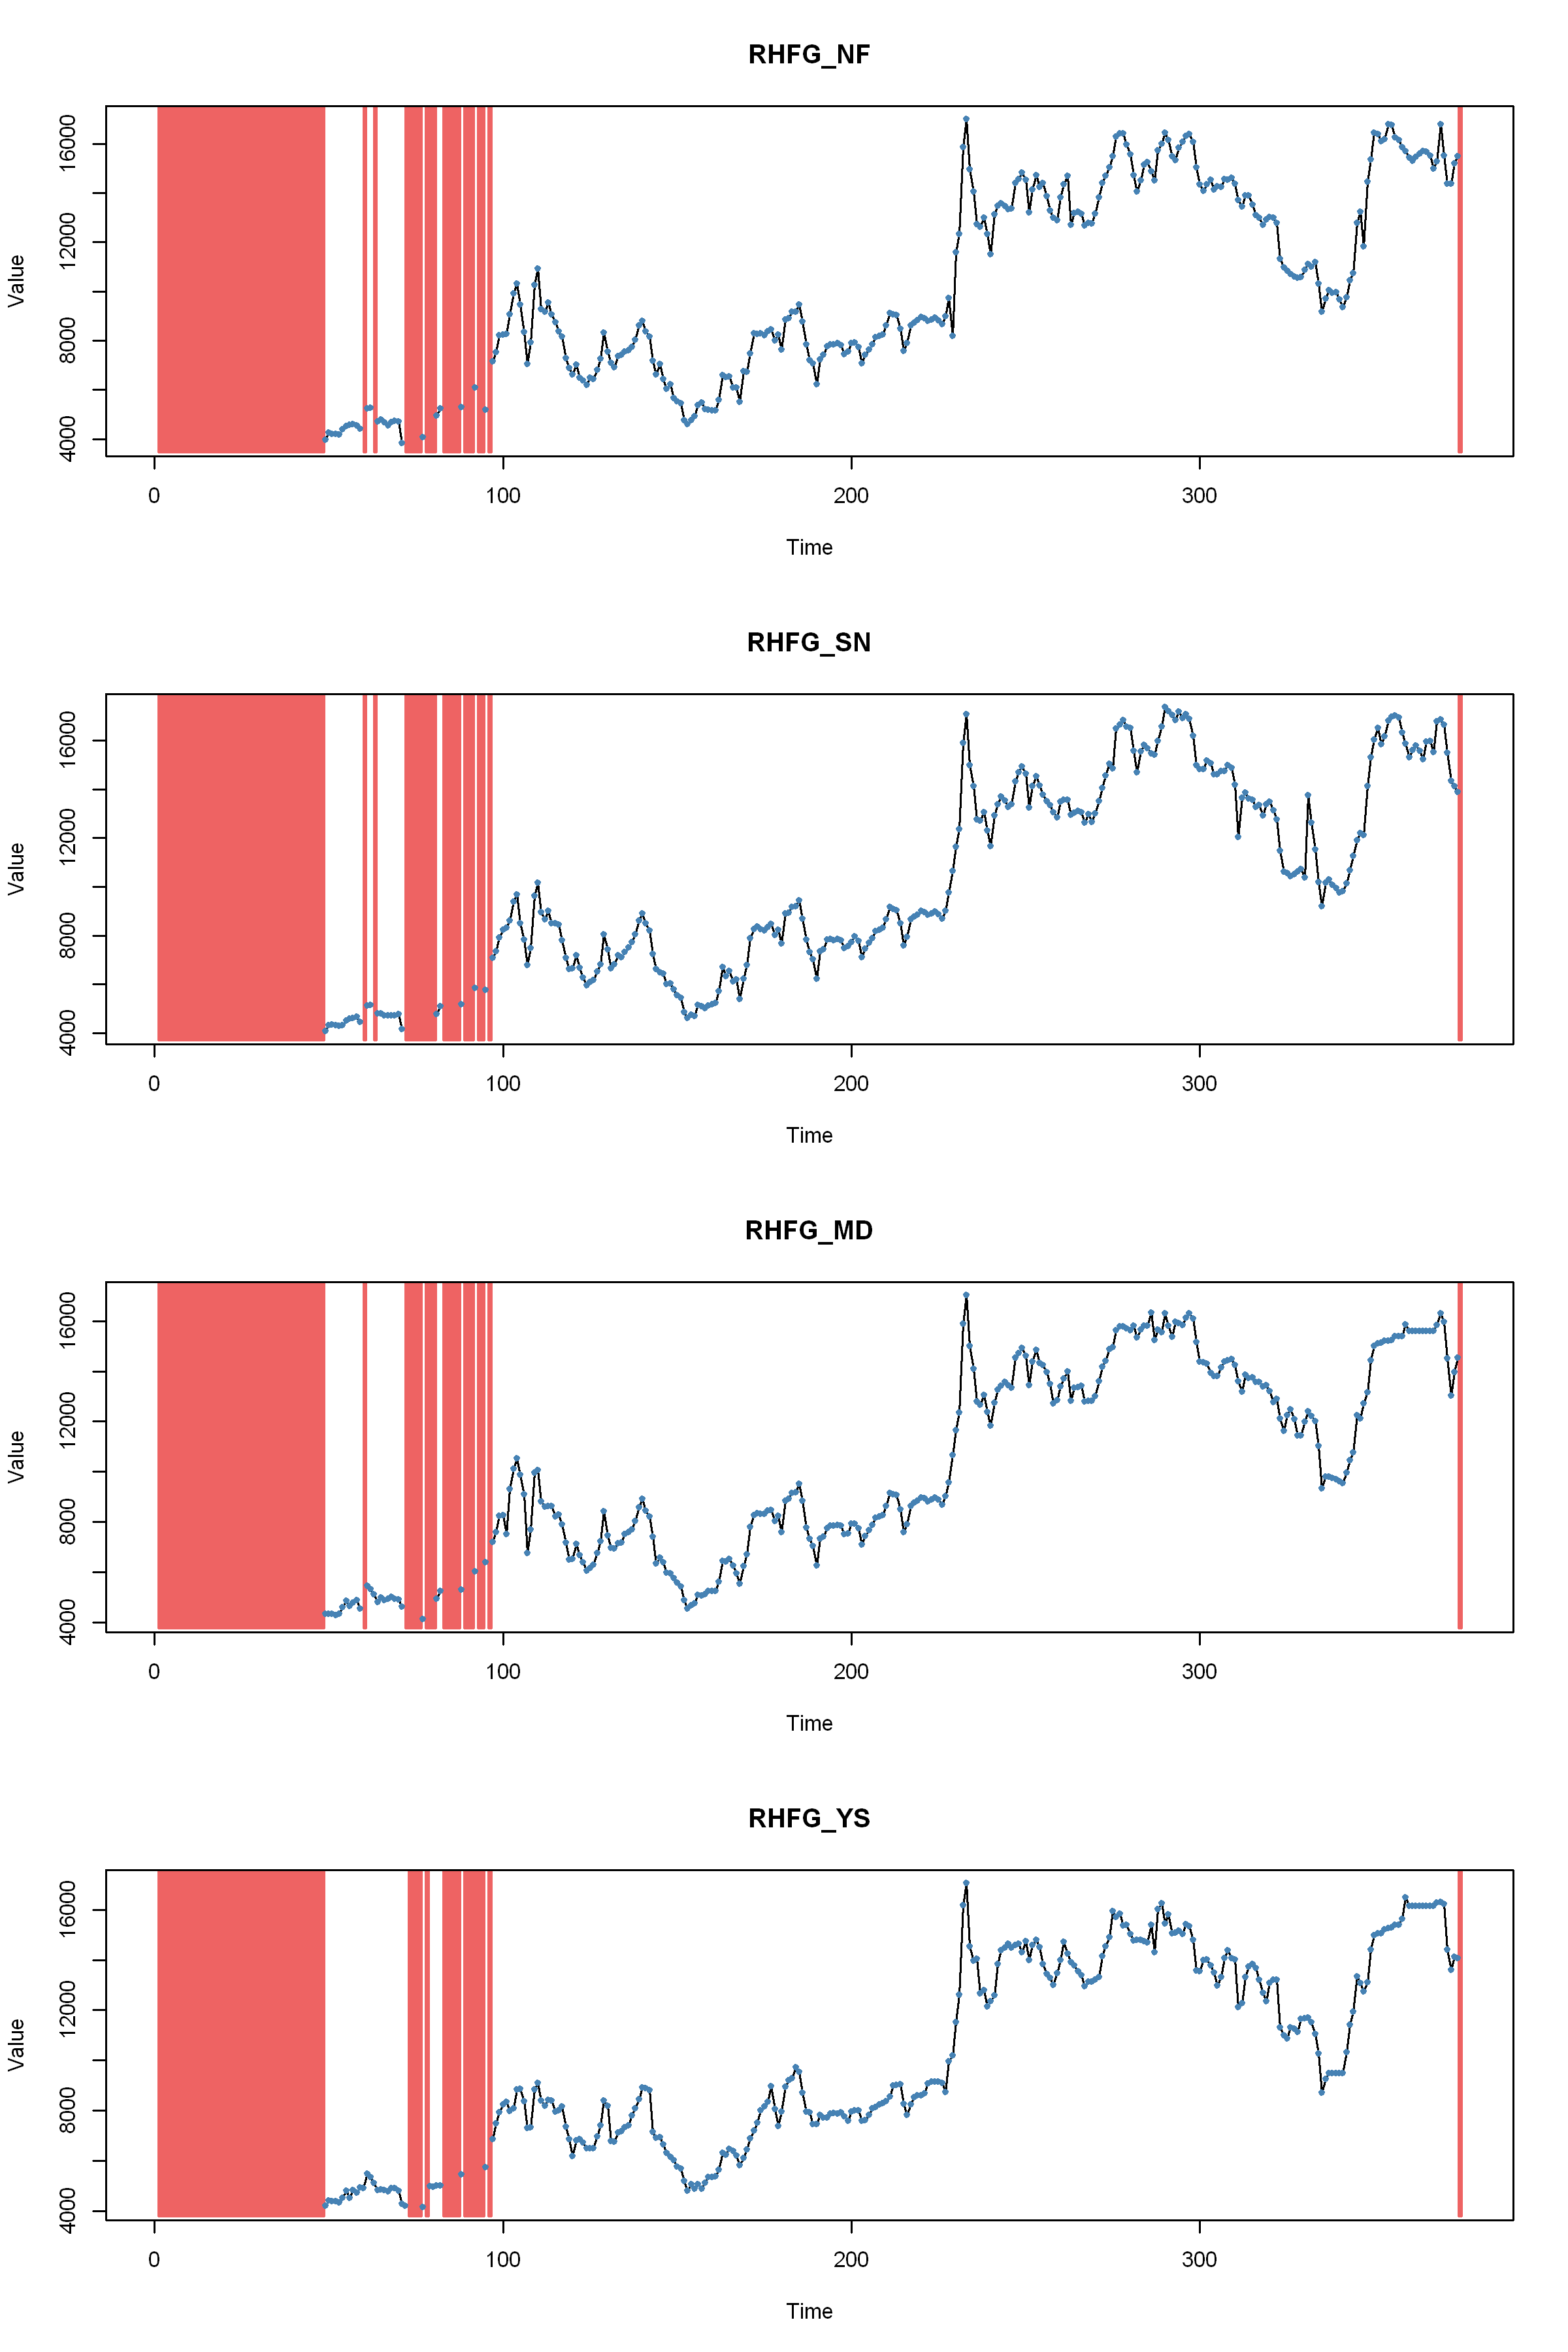

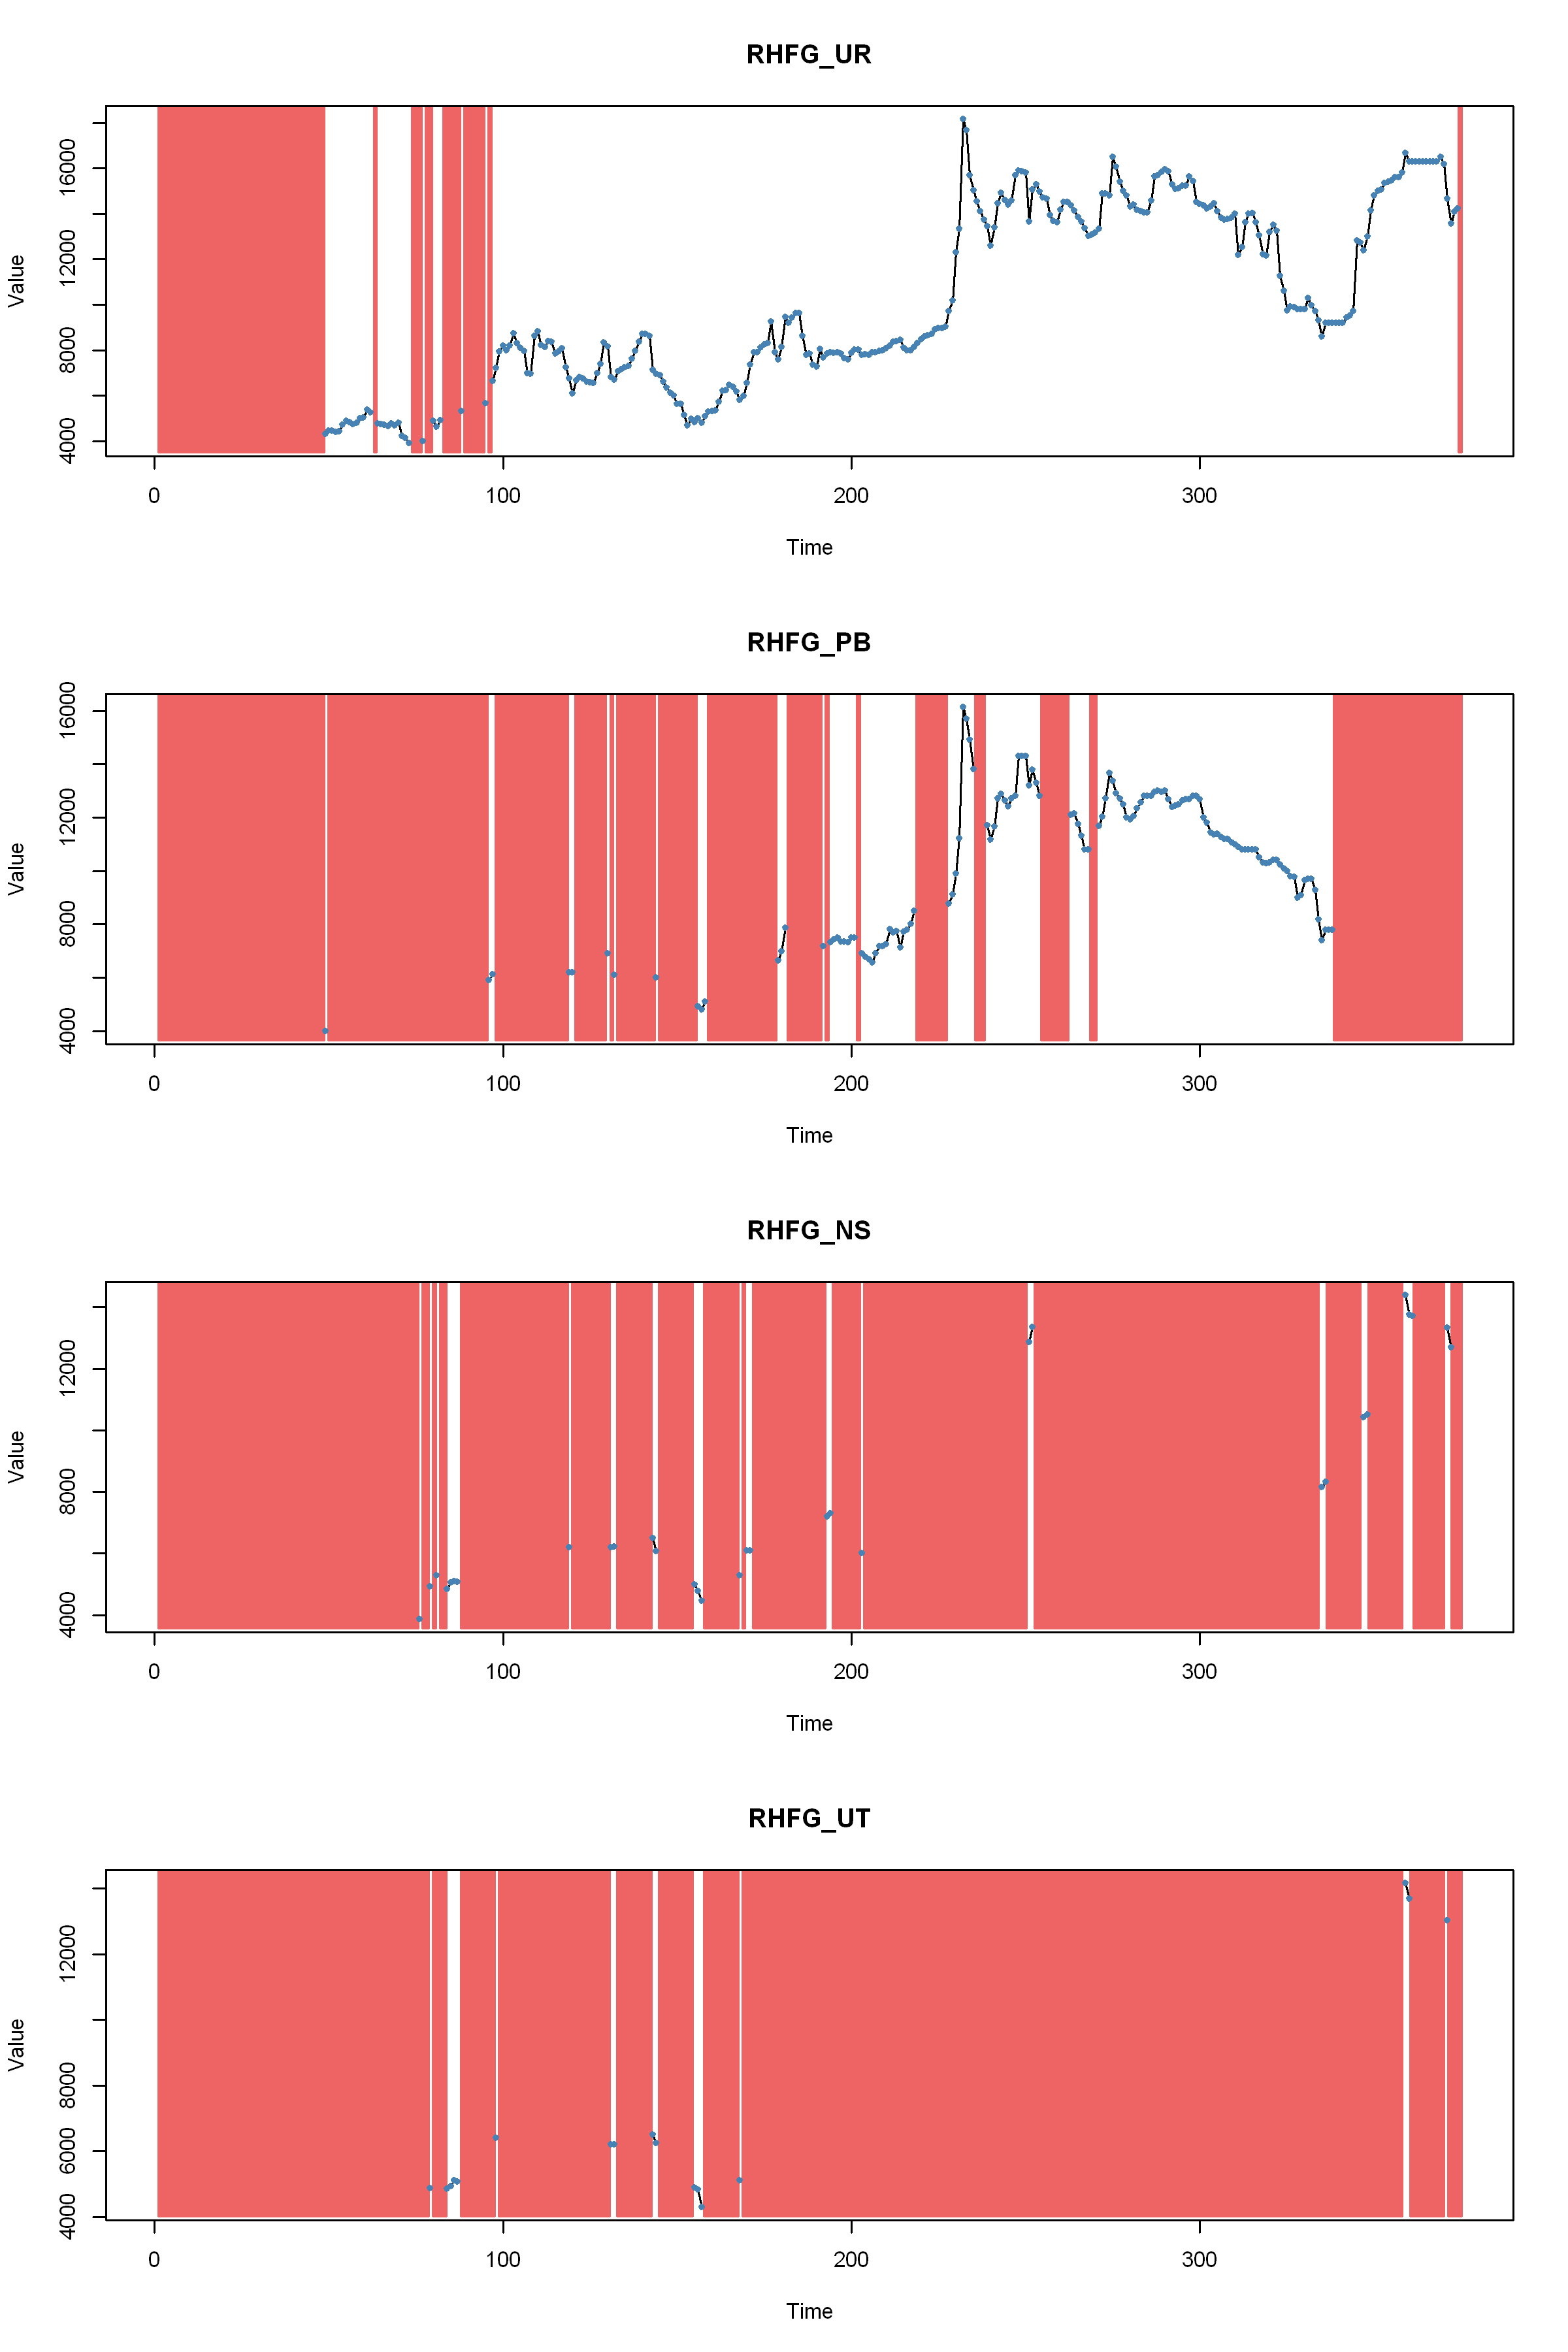

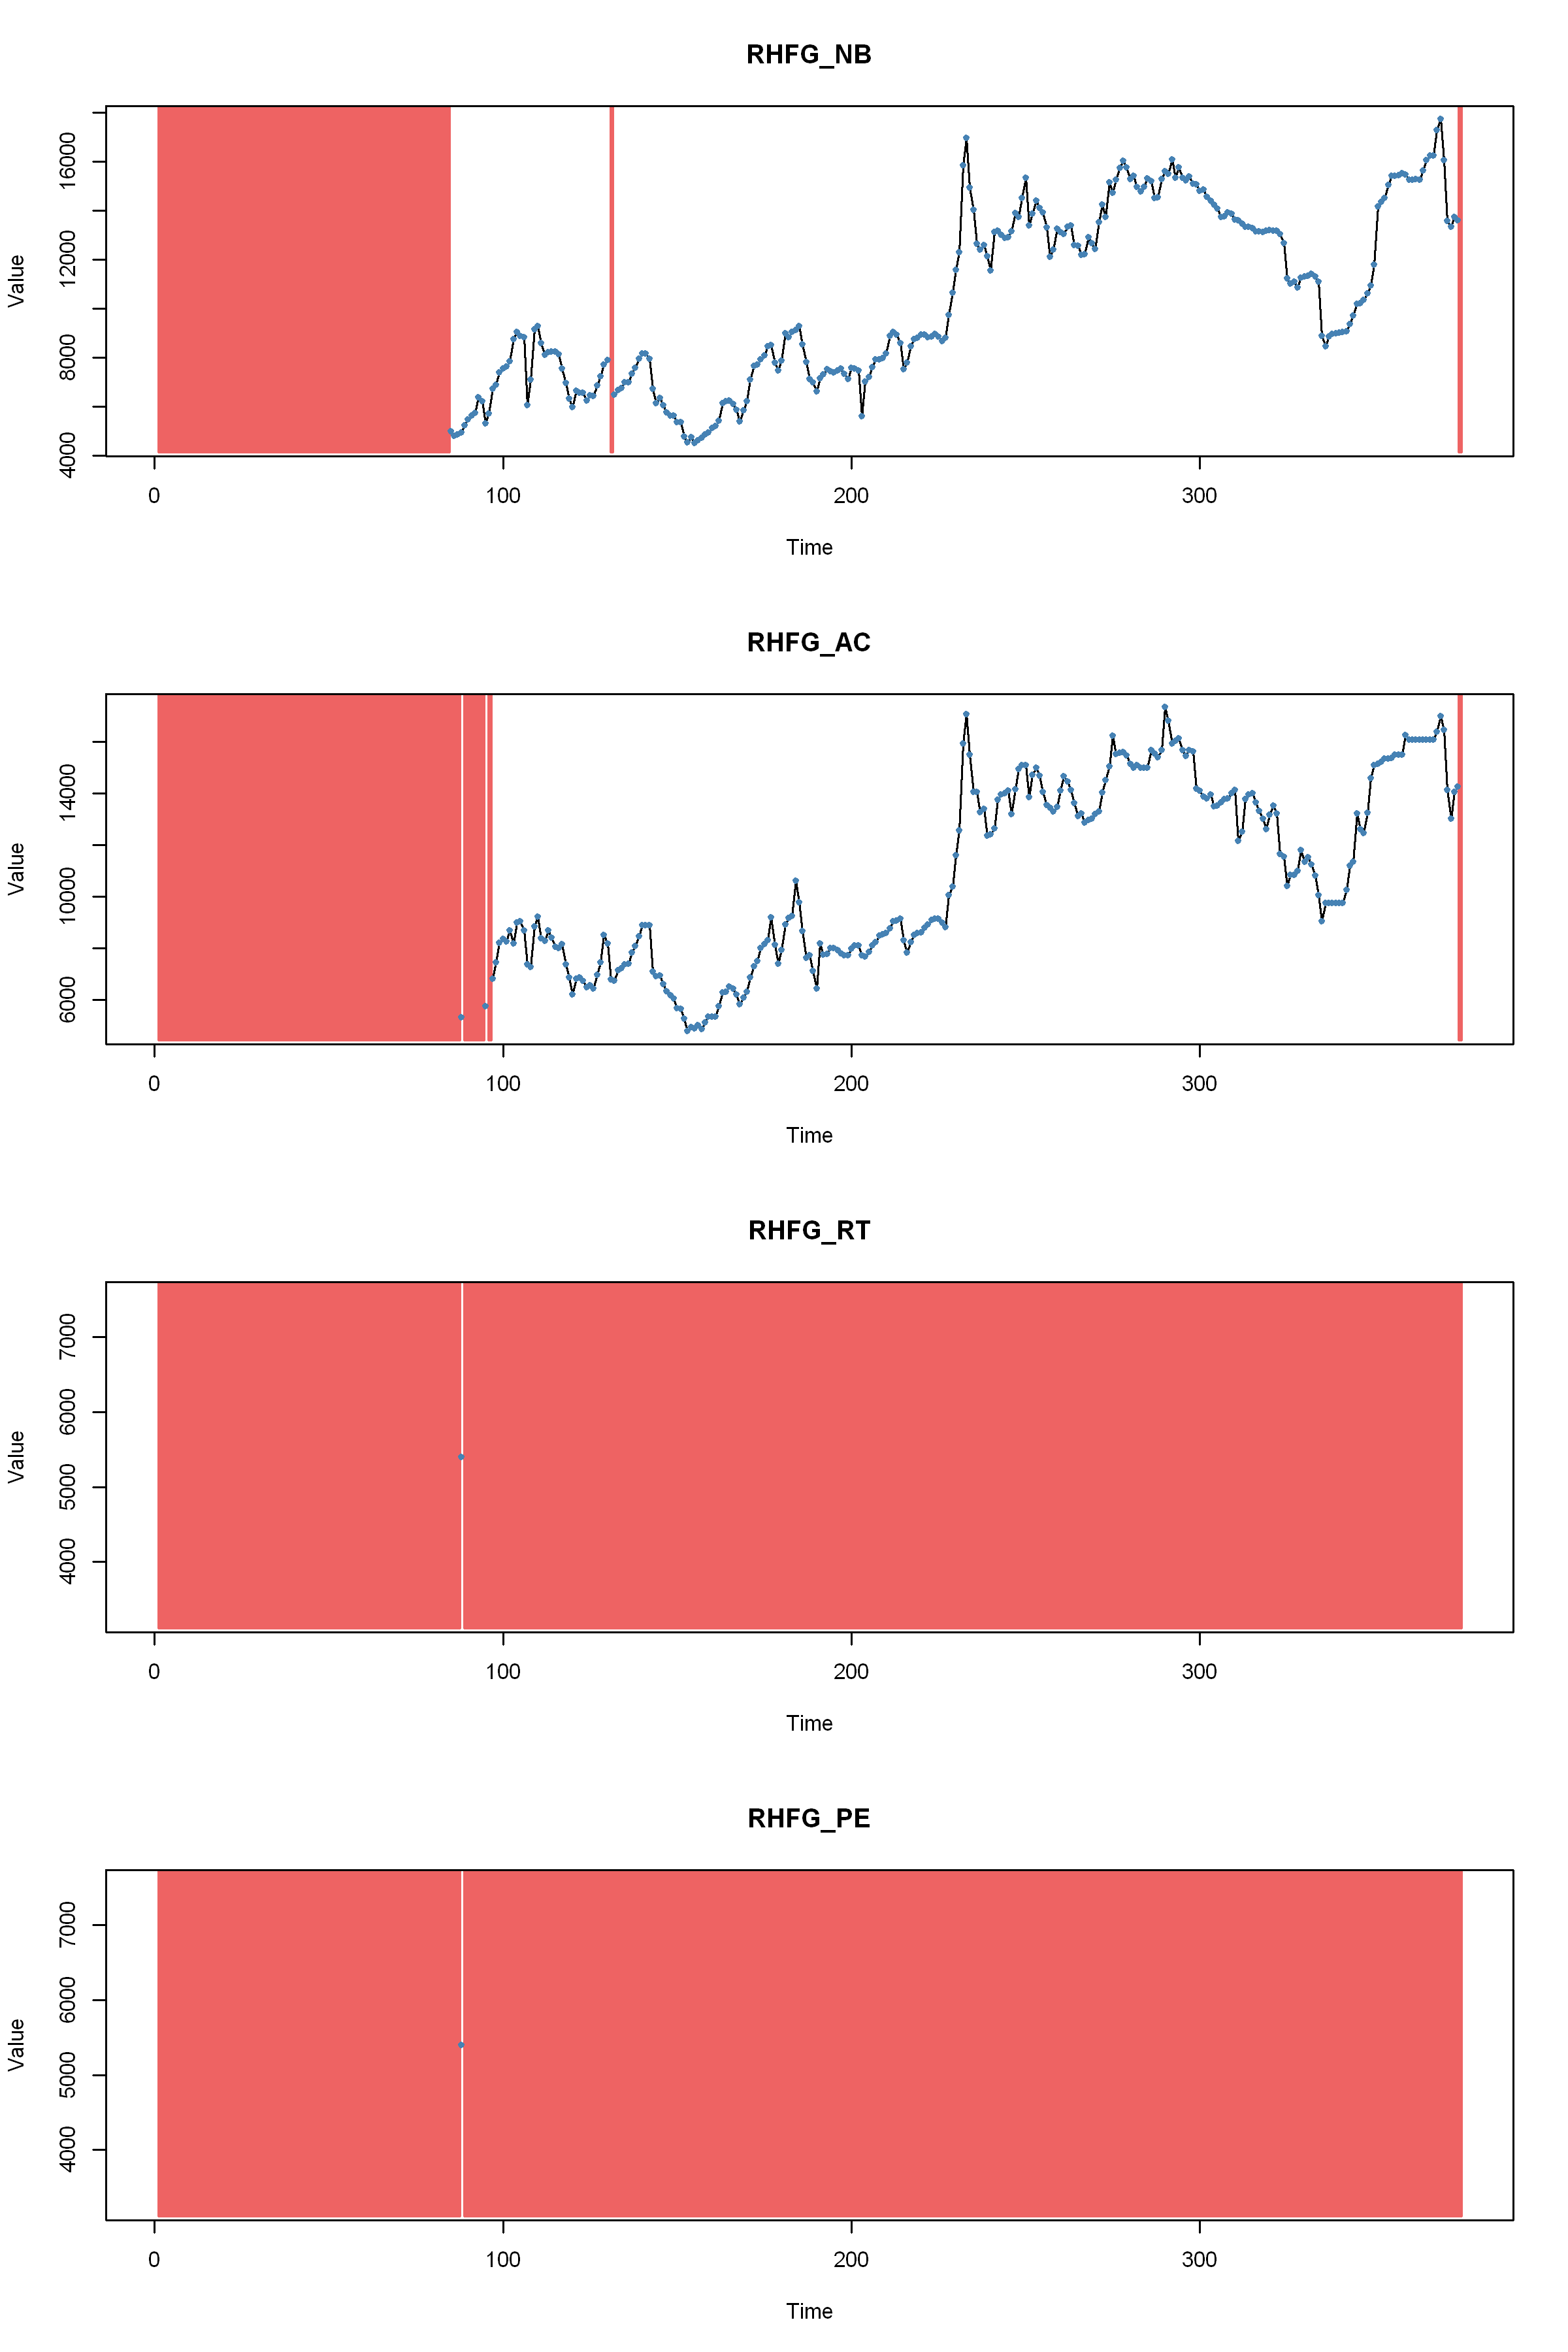

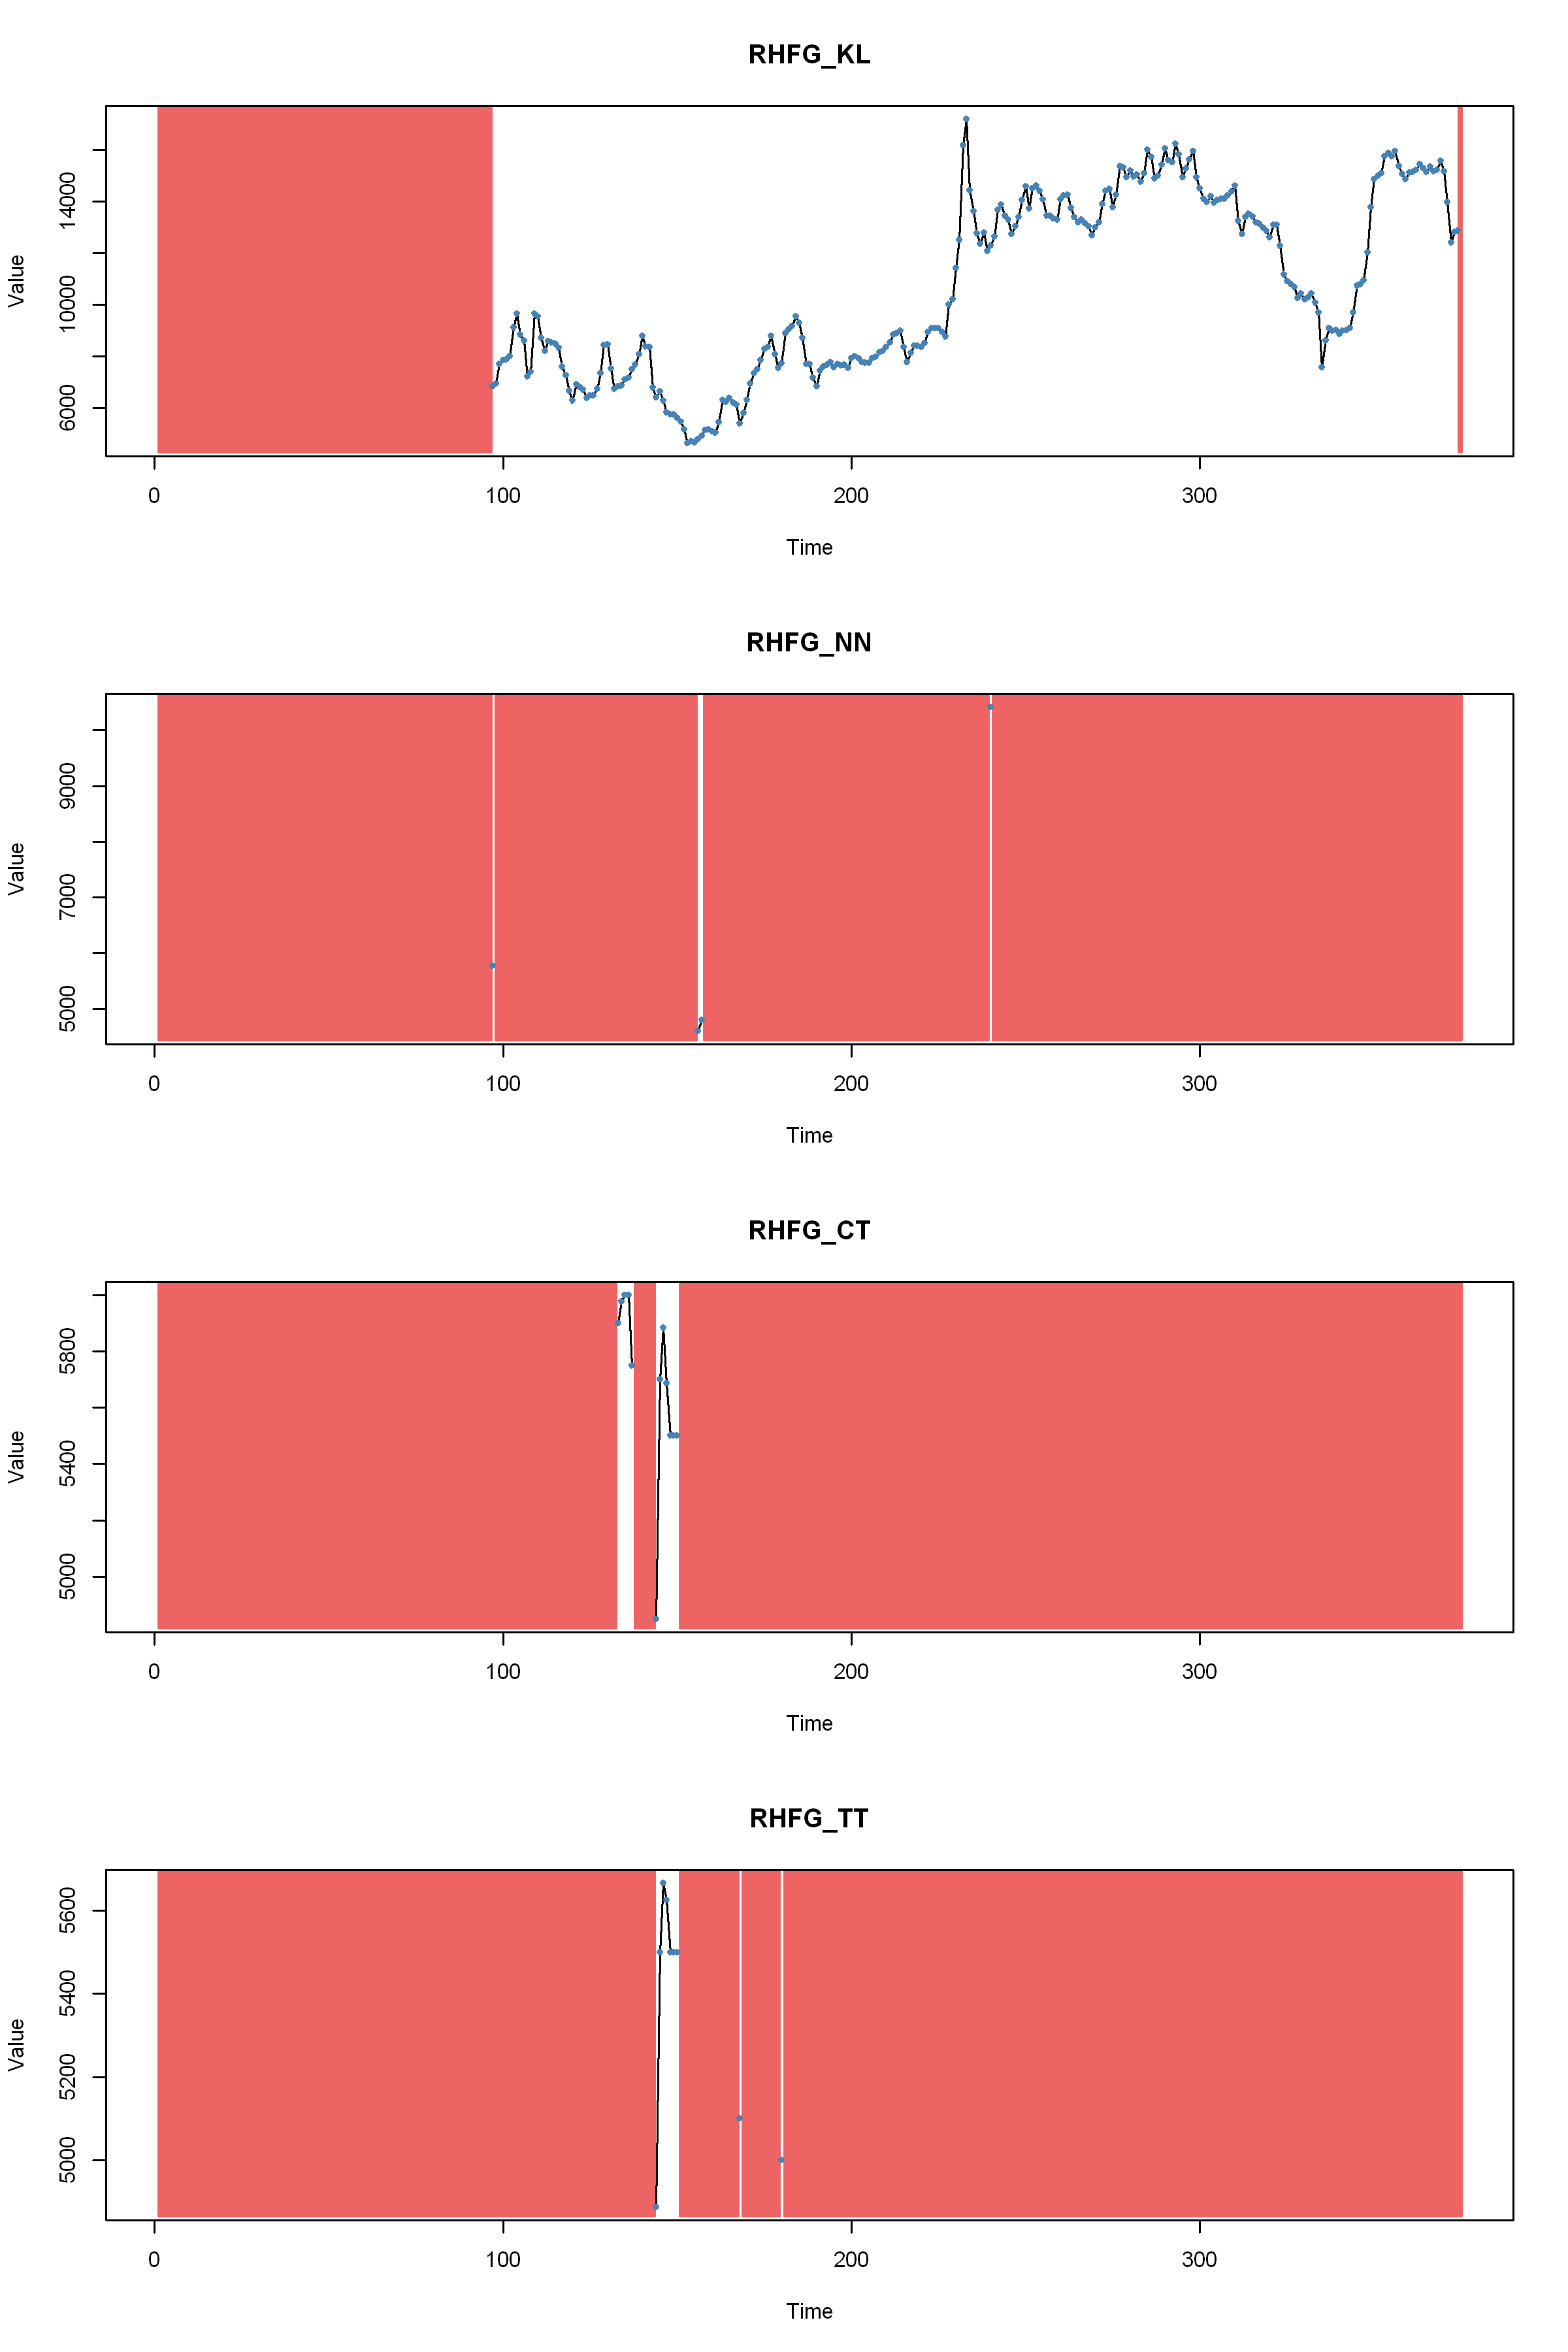

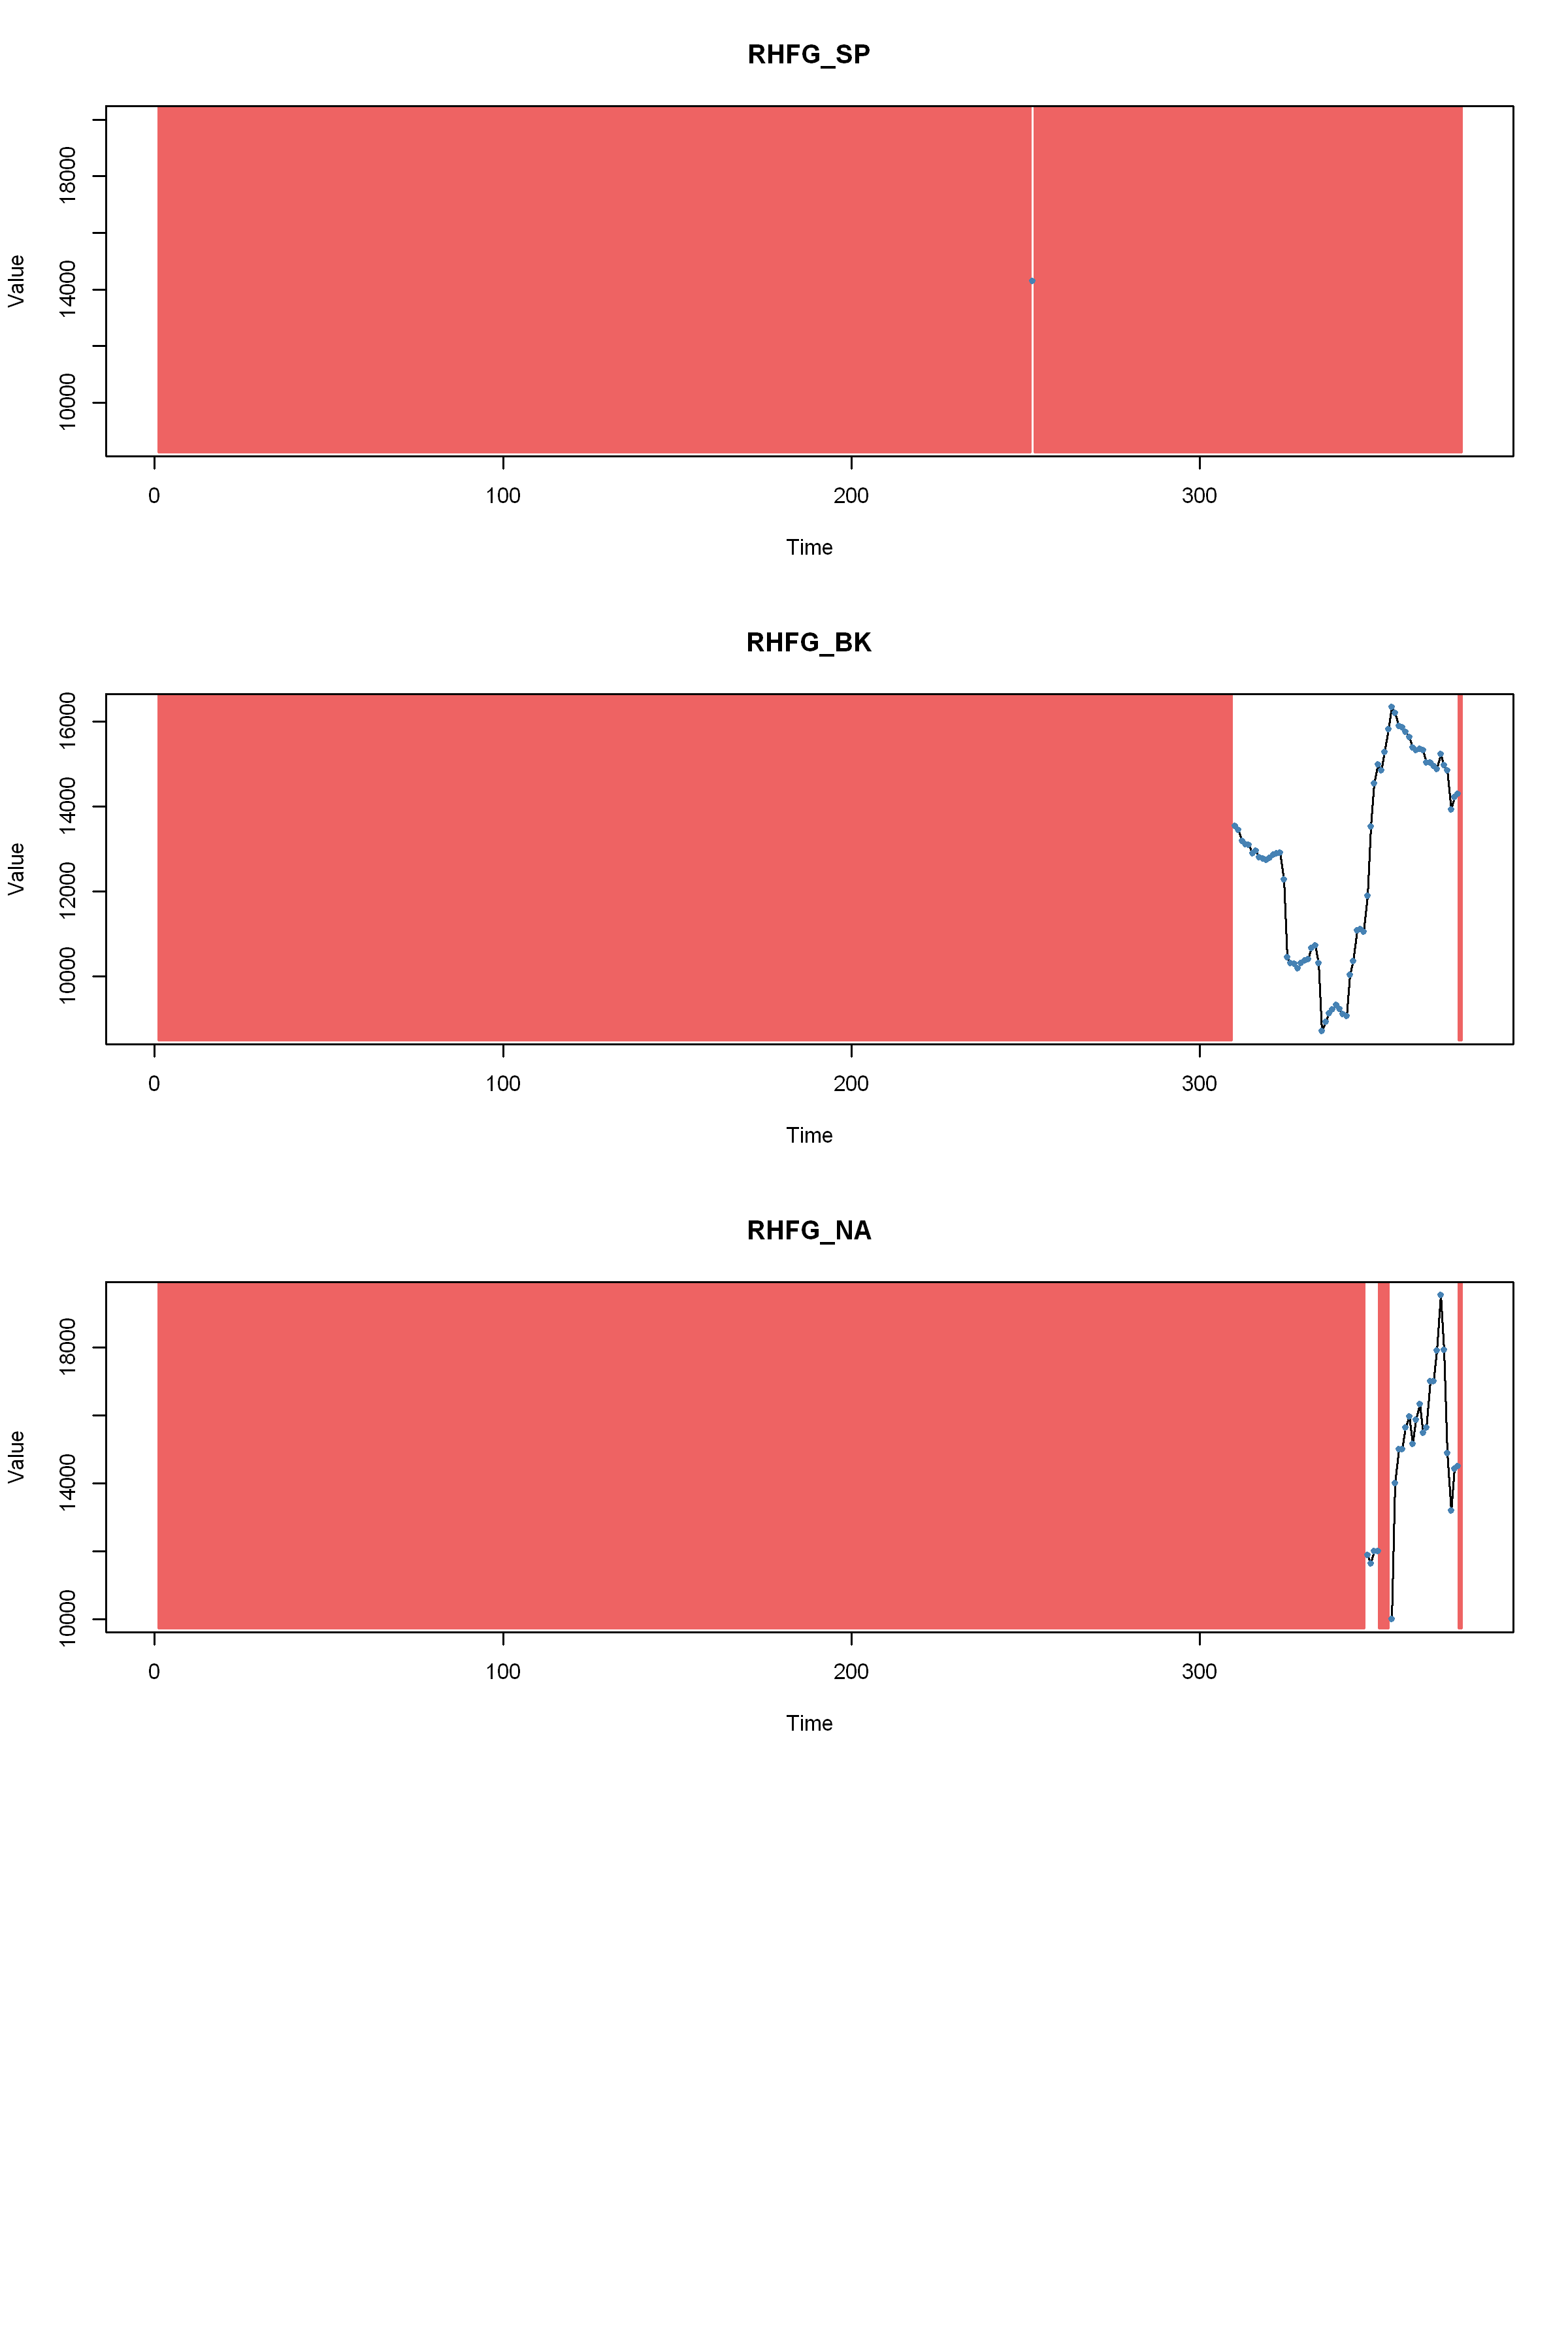

In [35]:
cols = names(price_fg)[startsWith(names(price_fg), 'RH')]
fgp = price_fg[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(fgp)) {
  plotNA.distribution(fgp[,i], main=names(fgp)[i])
}

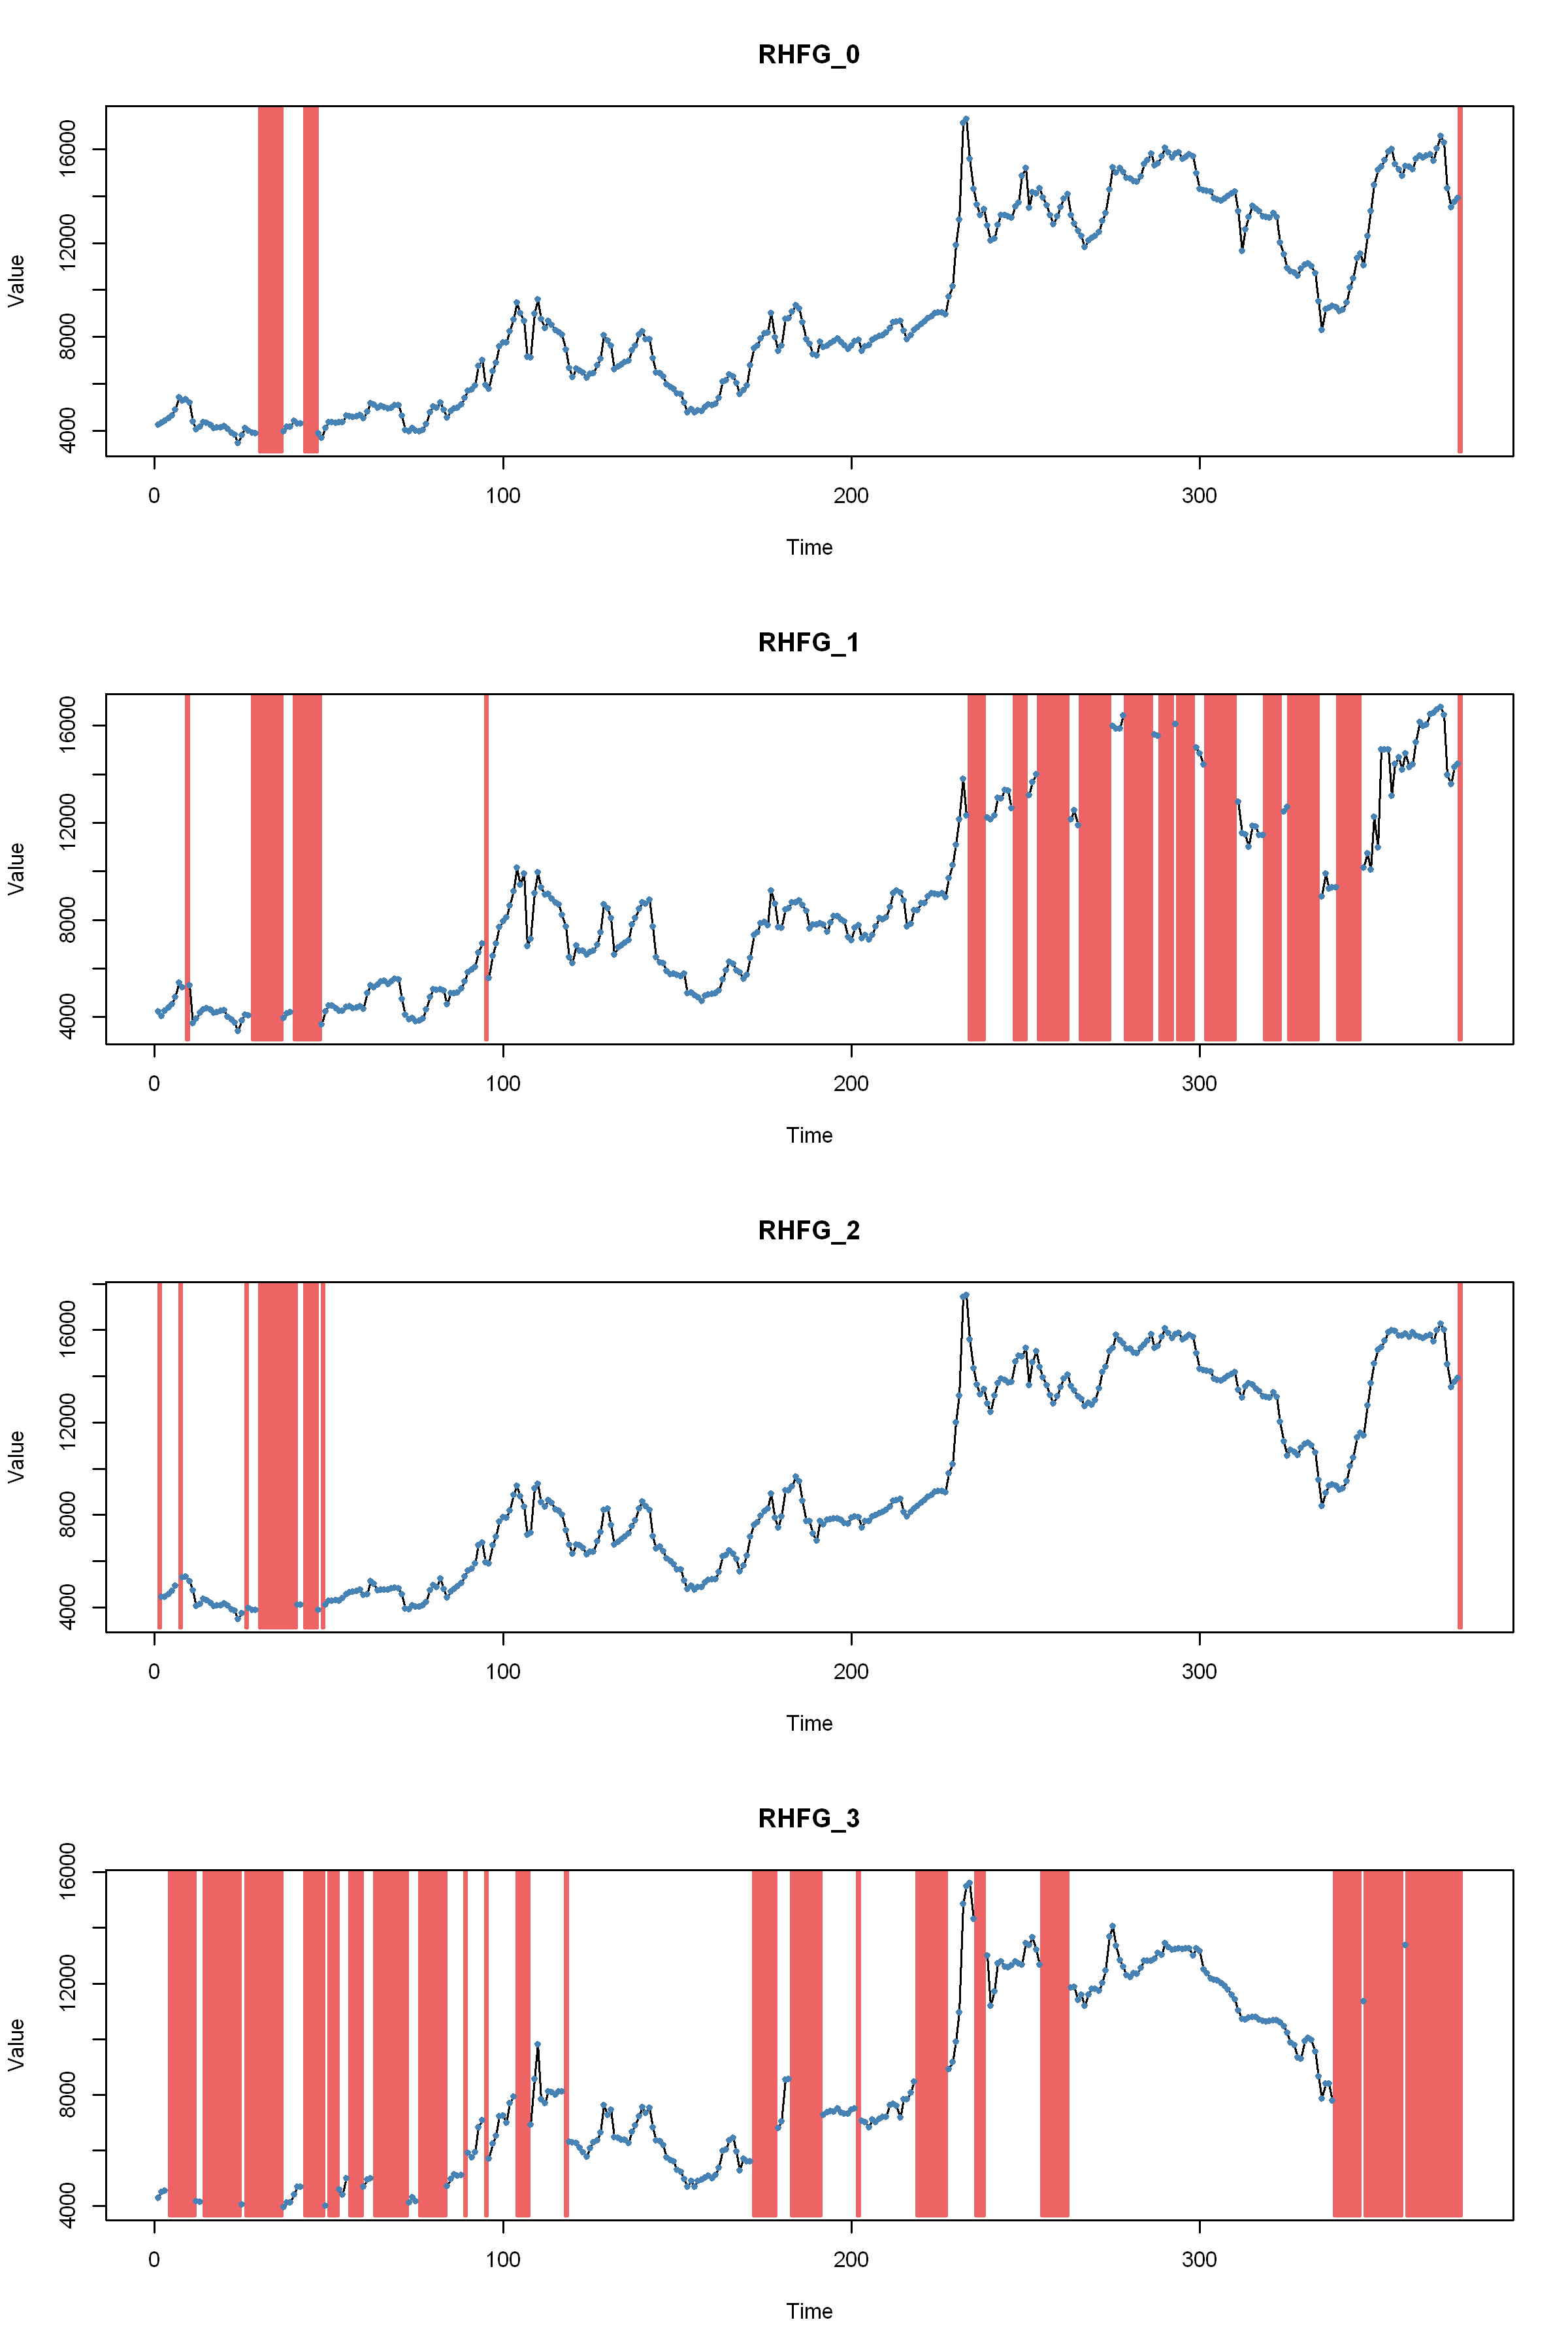

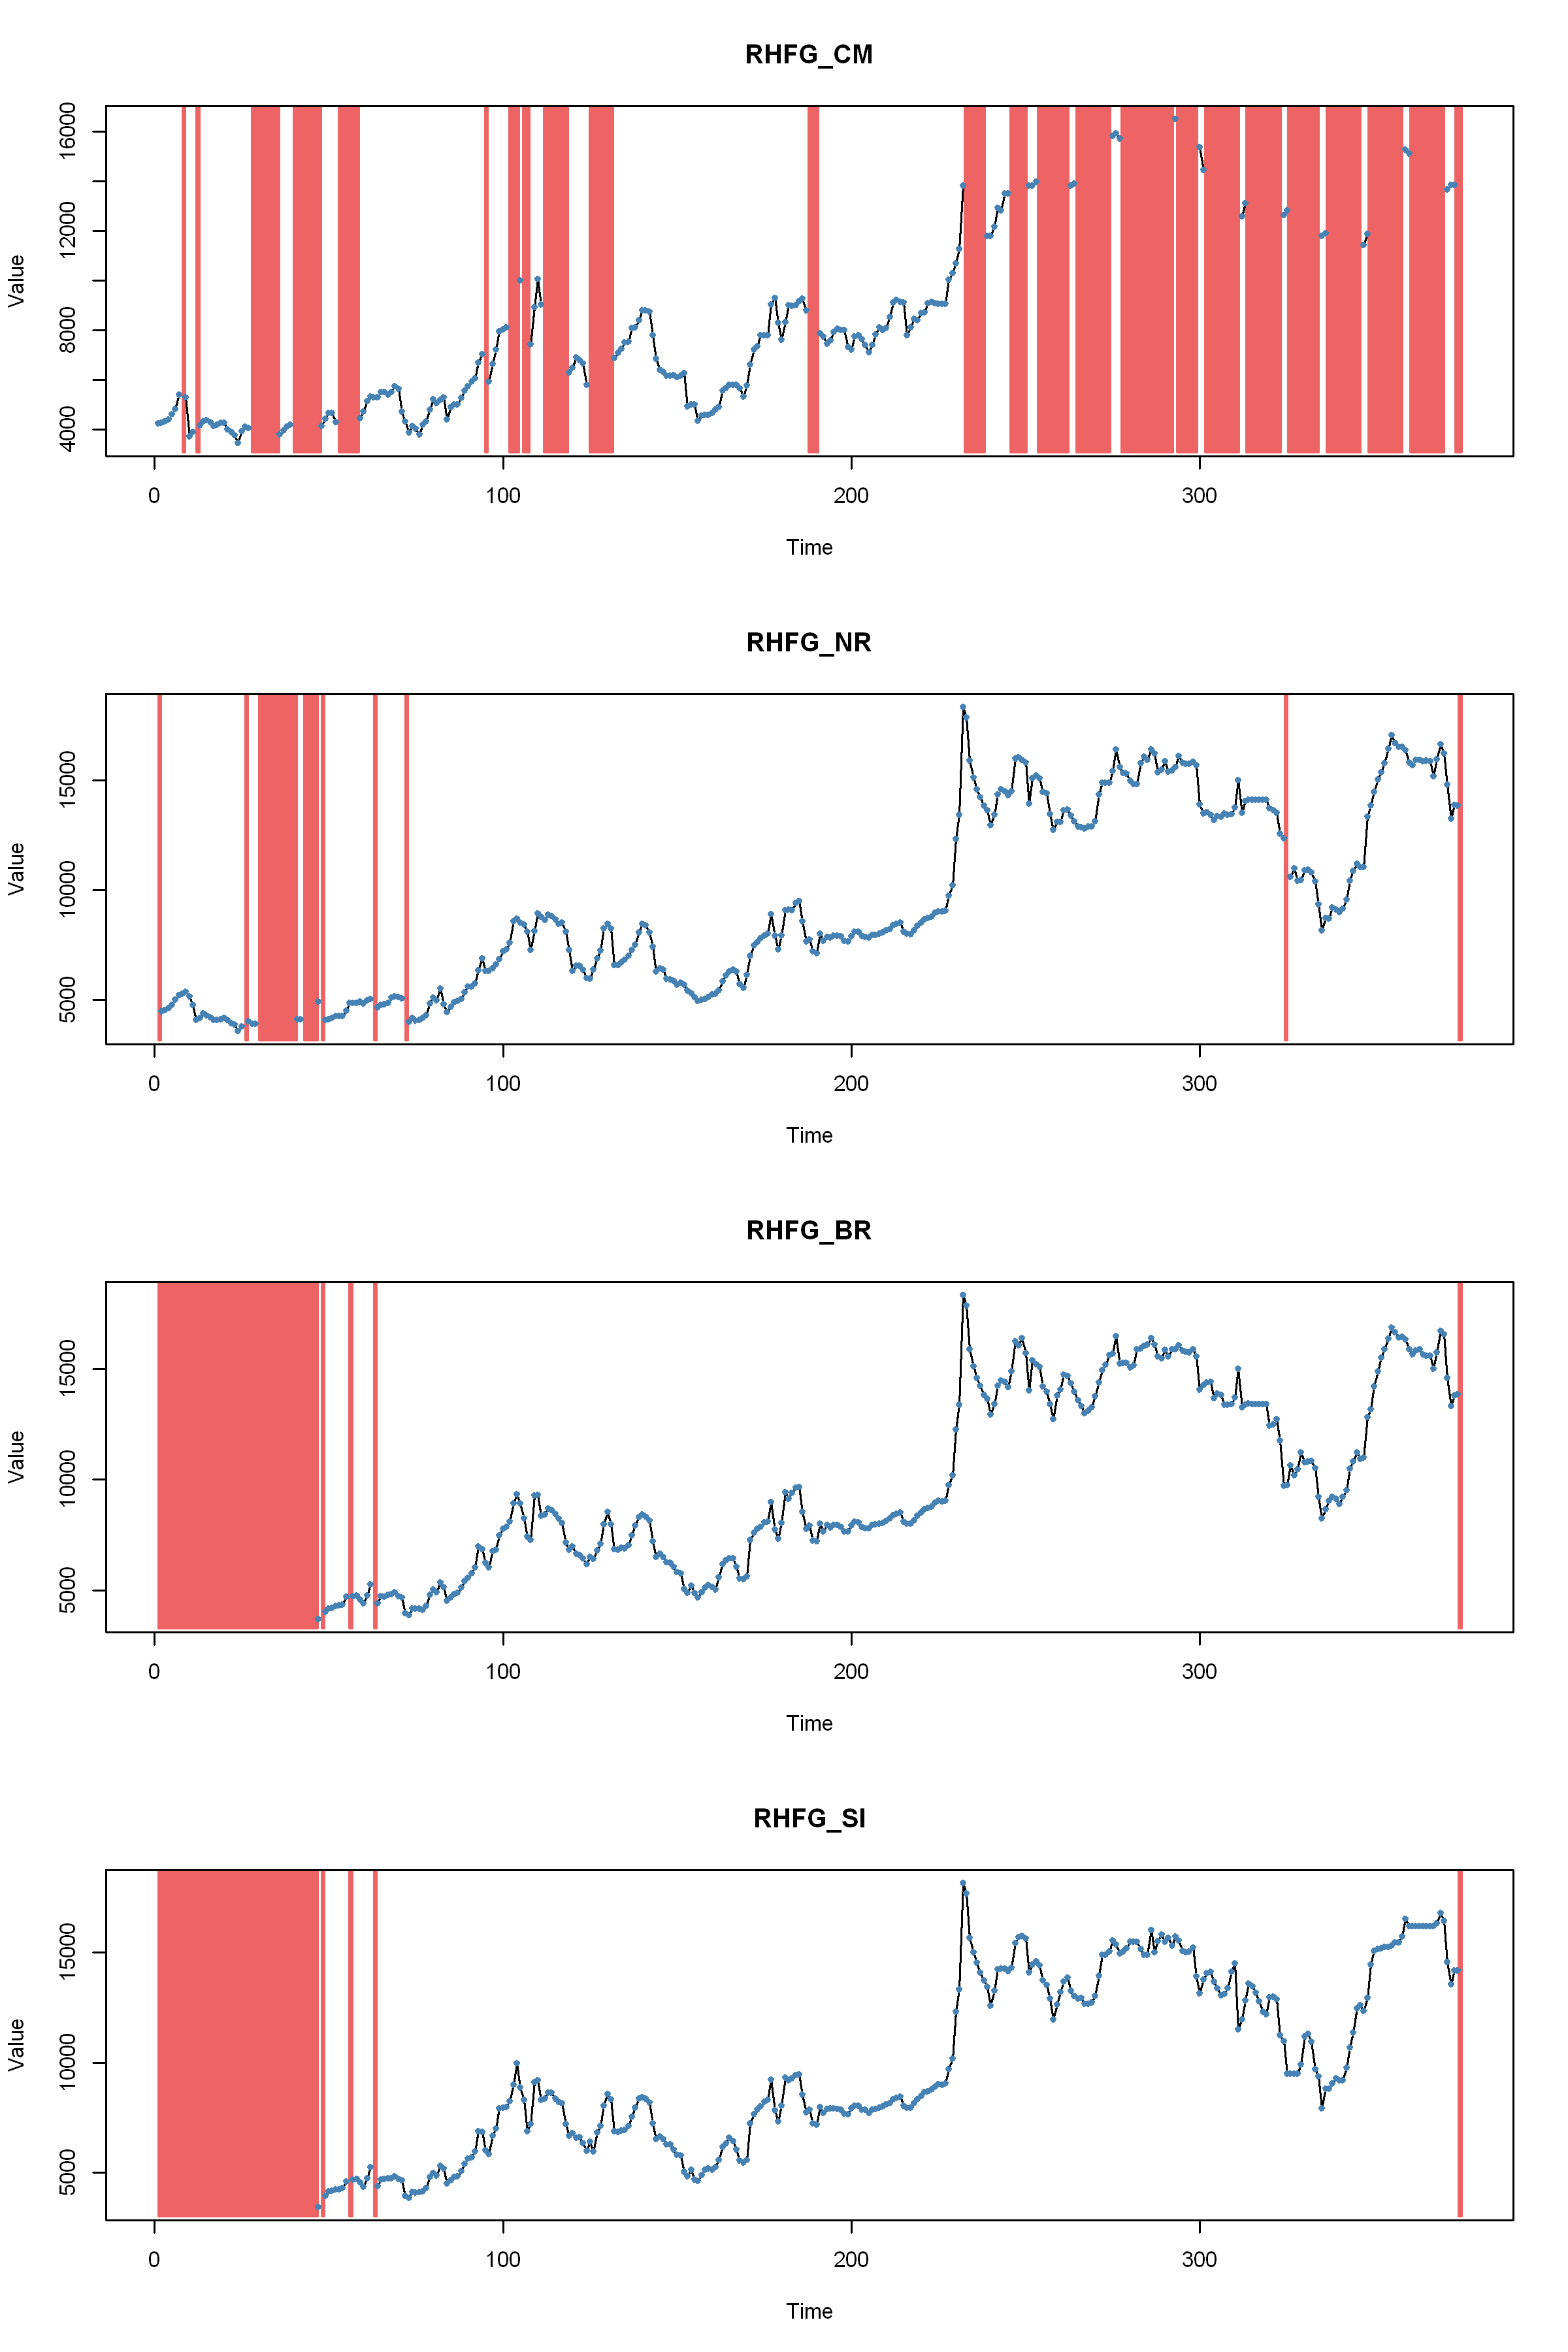

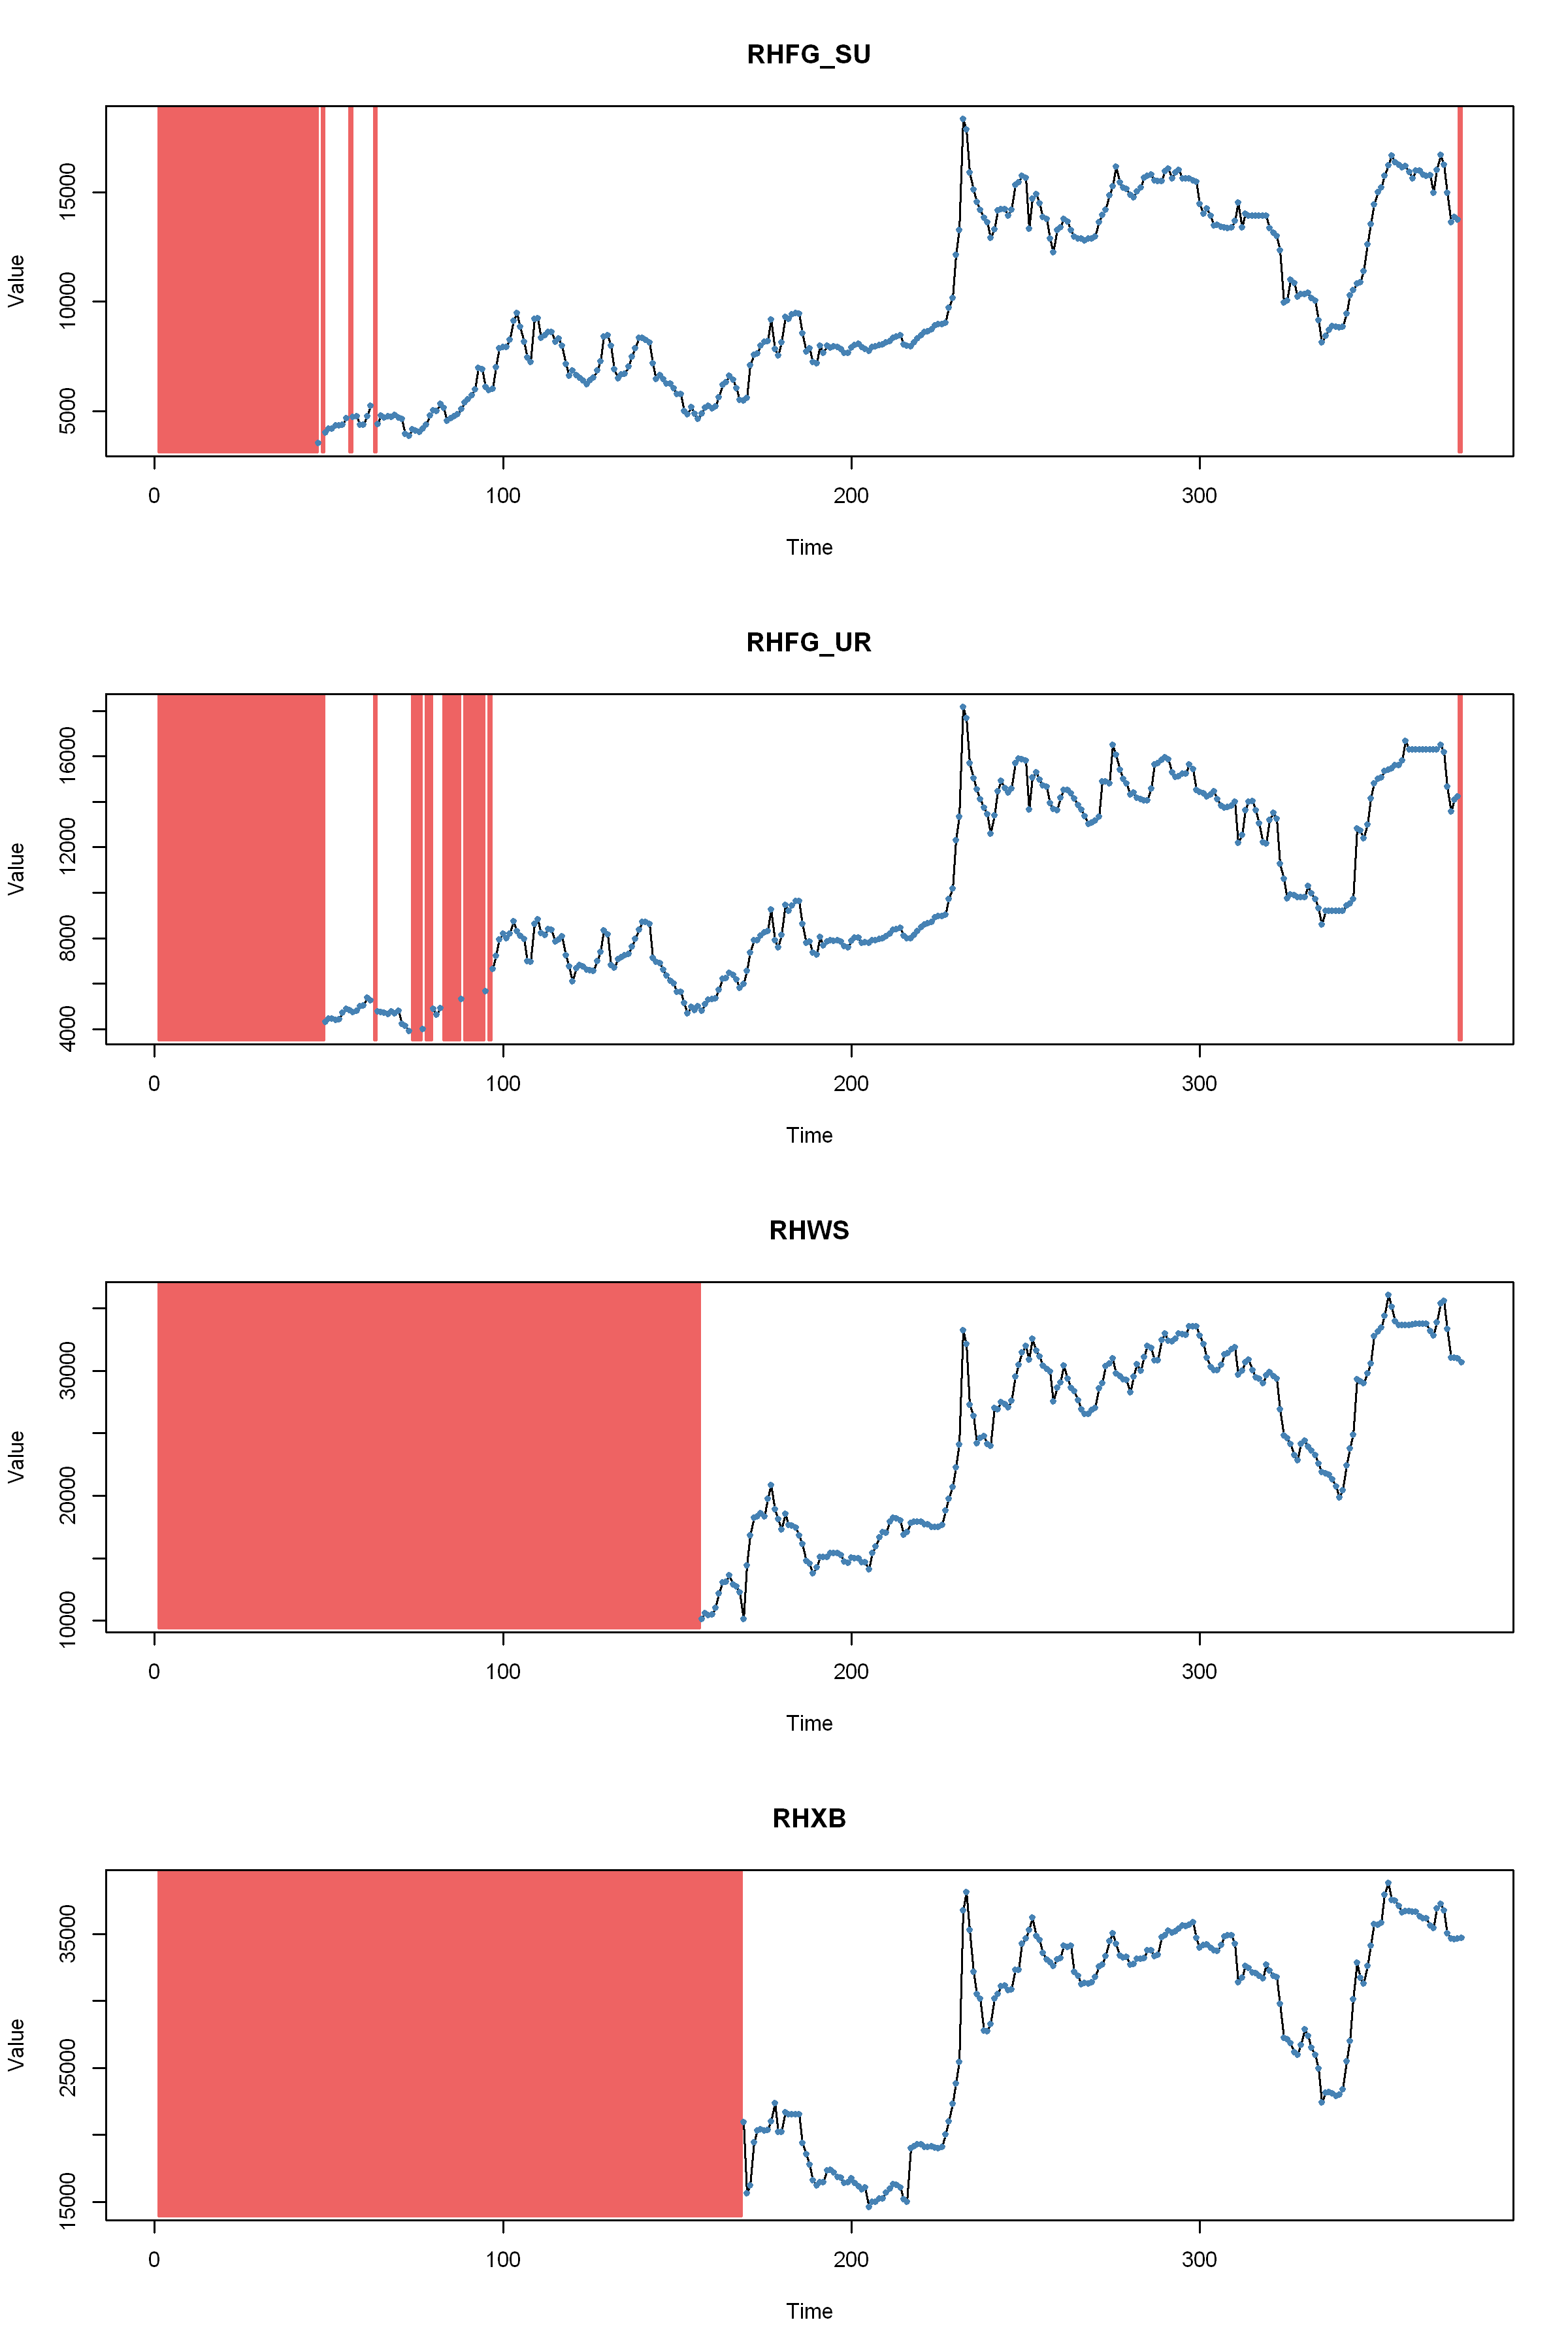

In [12]:
cols = names(price_xts)[startsWith(names(price_xts), 'RH')]
fgp = price_xts[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(fgp)) {
  plotNA.distribution(fgp[,i], main=names(fgp)[i])
}

## ข้าวเจ้าอื่น

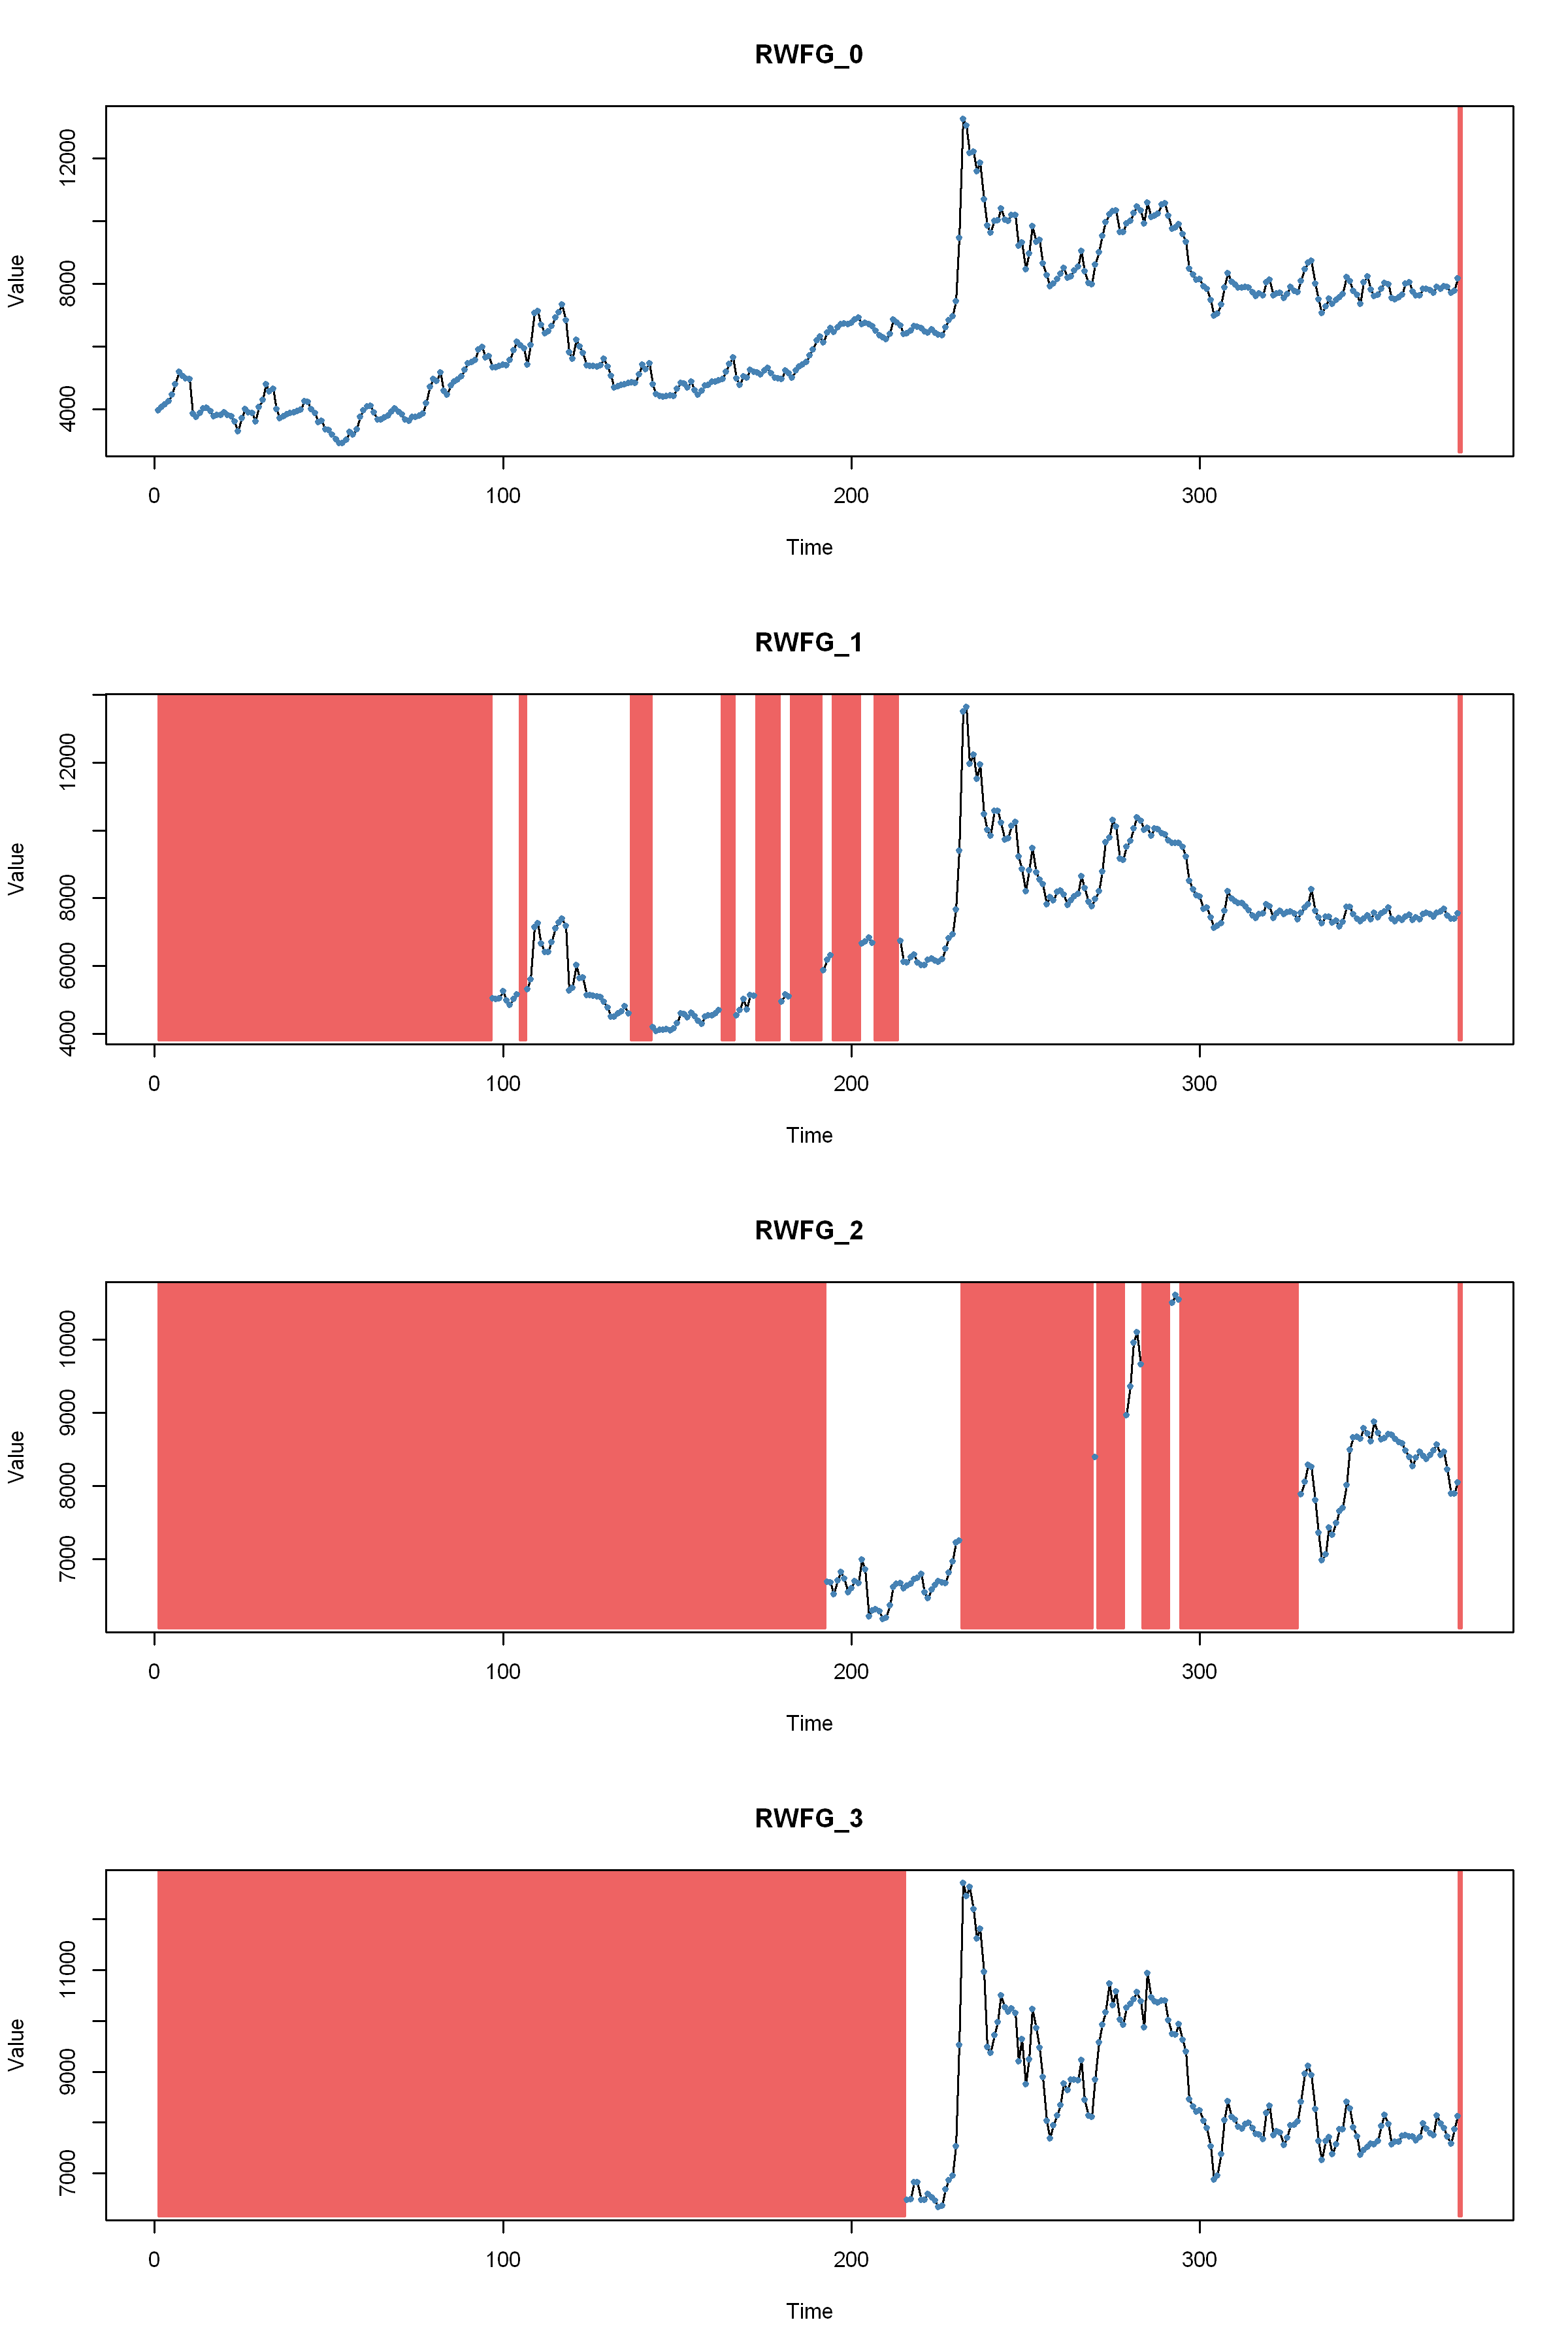

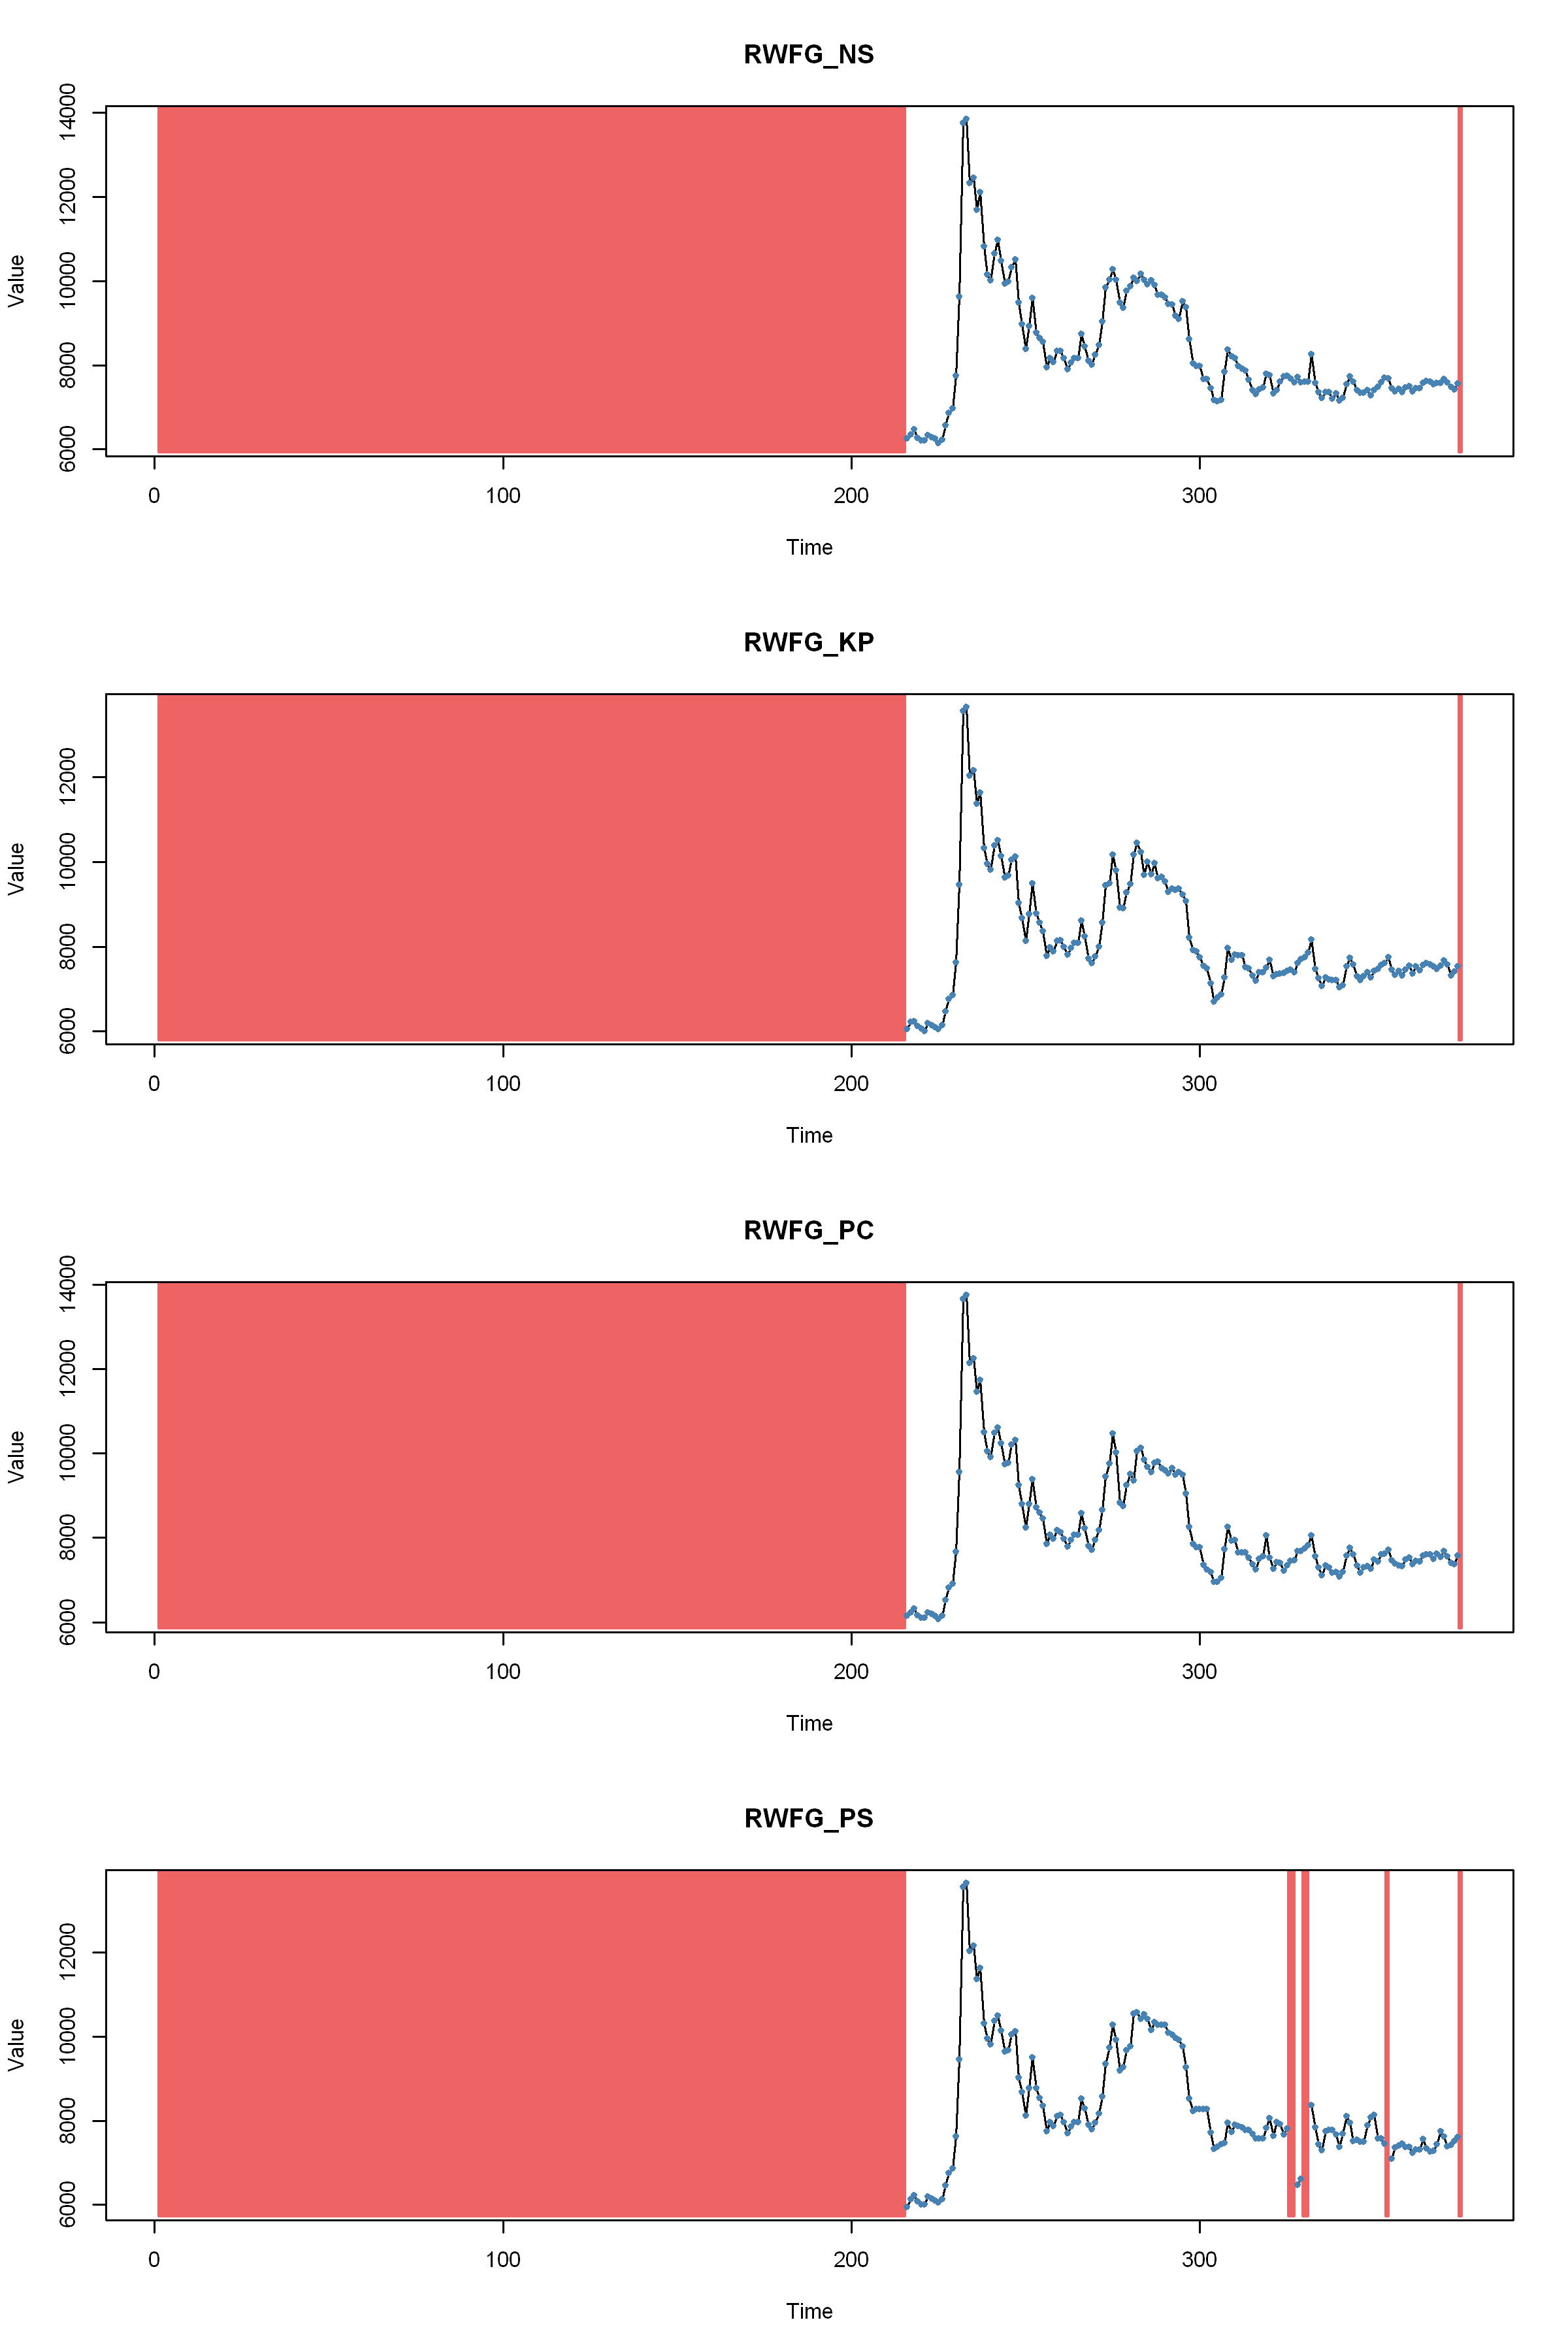

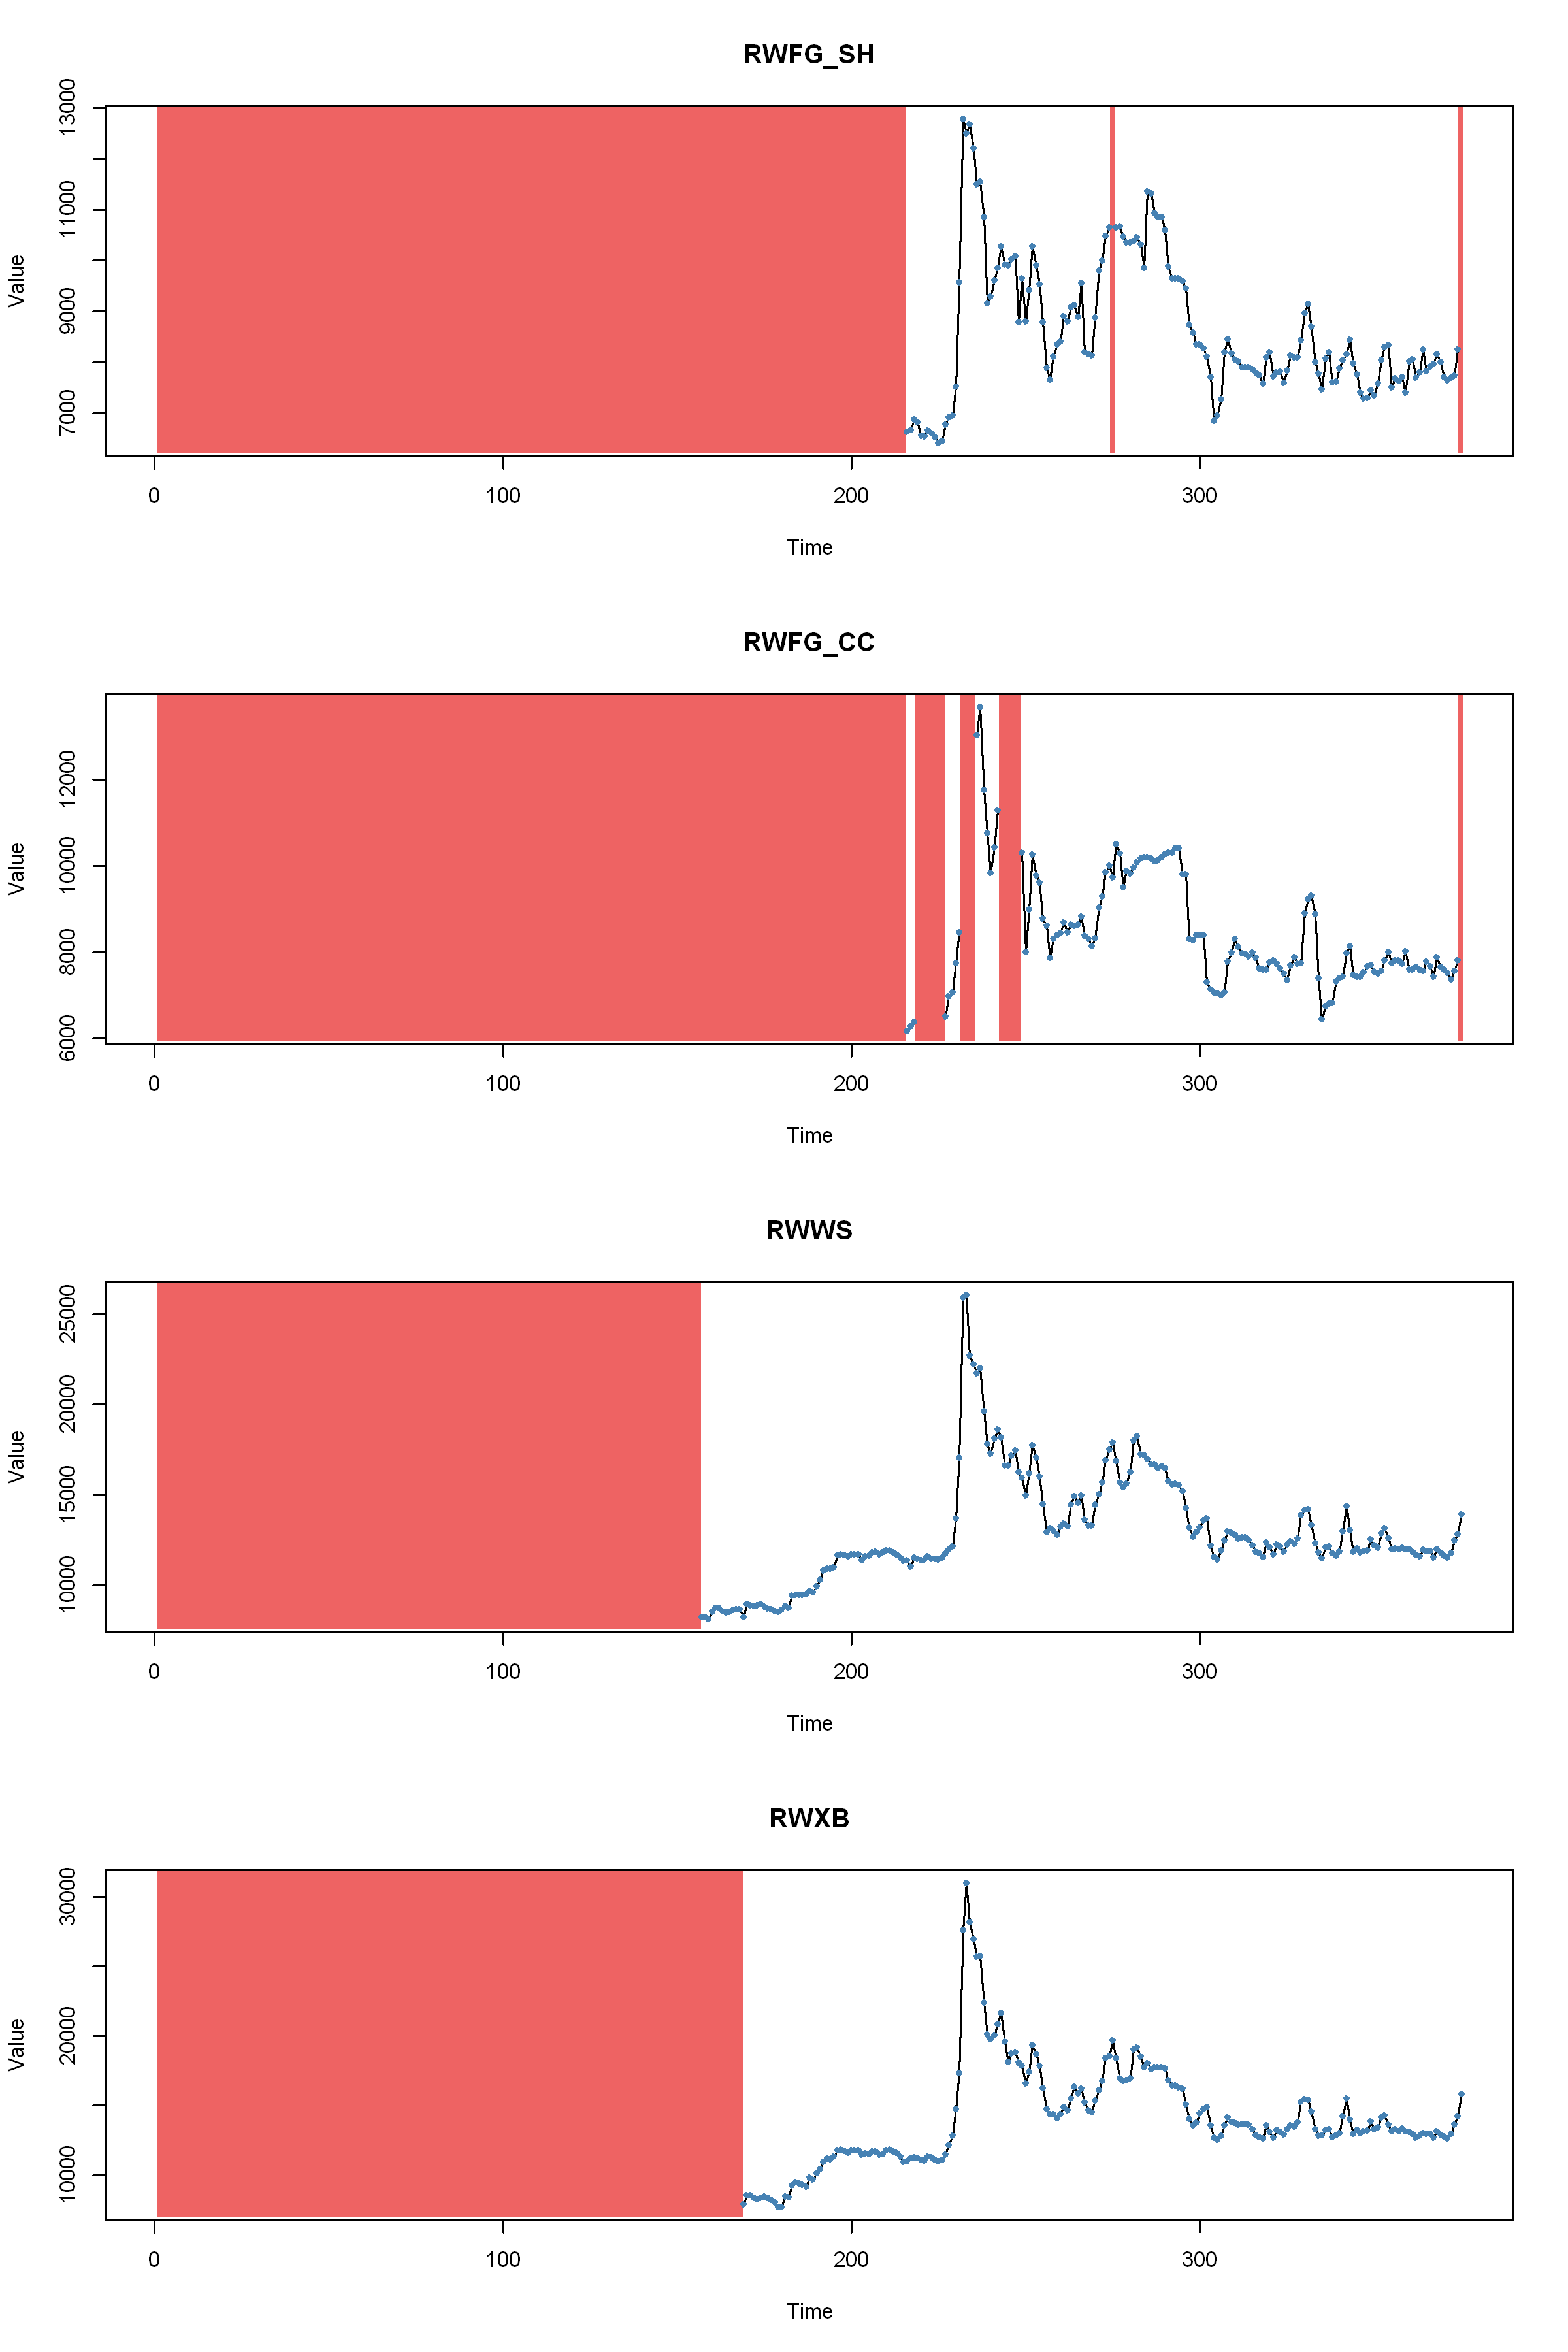

In [13]:
cols = names(price_xts)[startsWith(names(price_xts), 'RW')]
fgp = price_xts[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(fgp)) {
  plotNA.distribution(fgp[,i], main=names(fgp)[i])
}

## ข้าวเหนียว

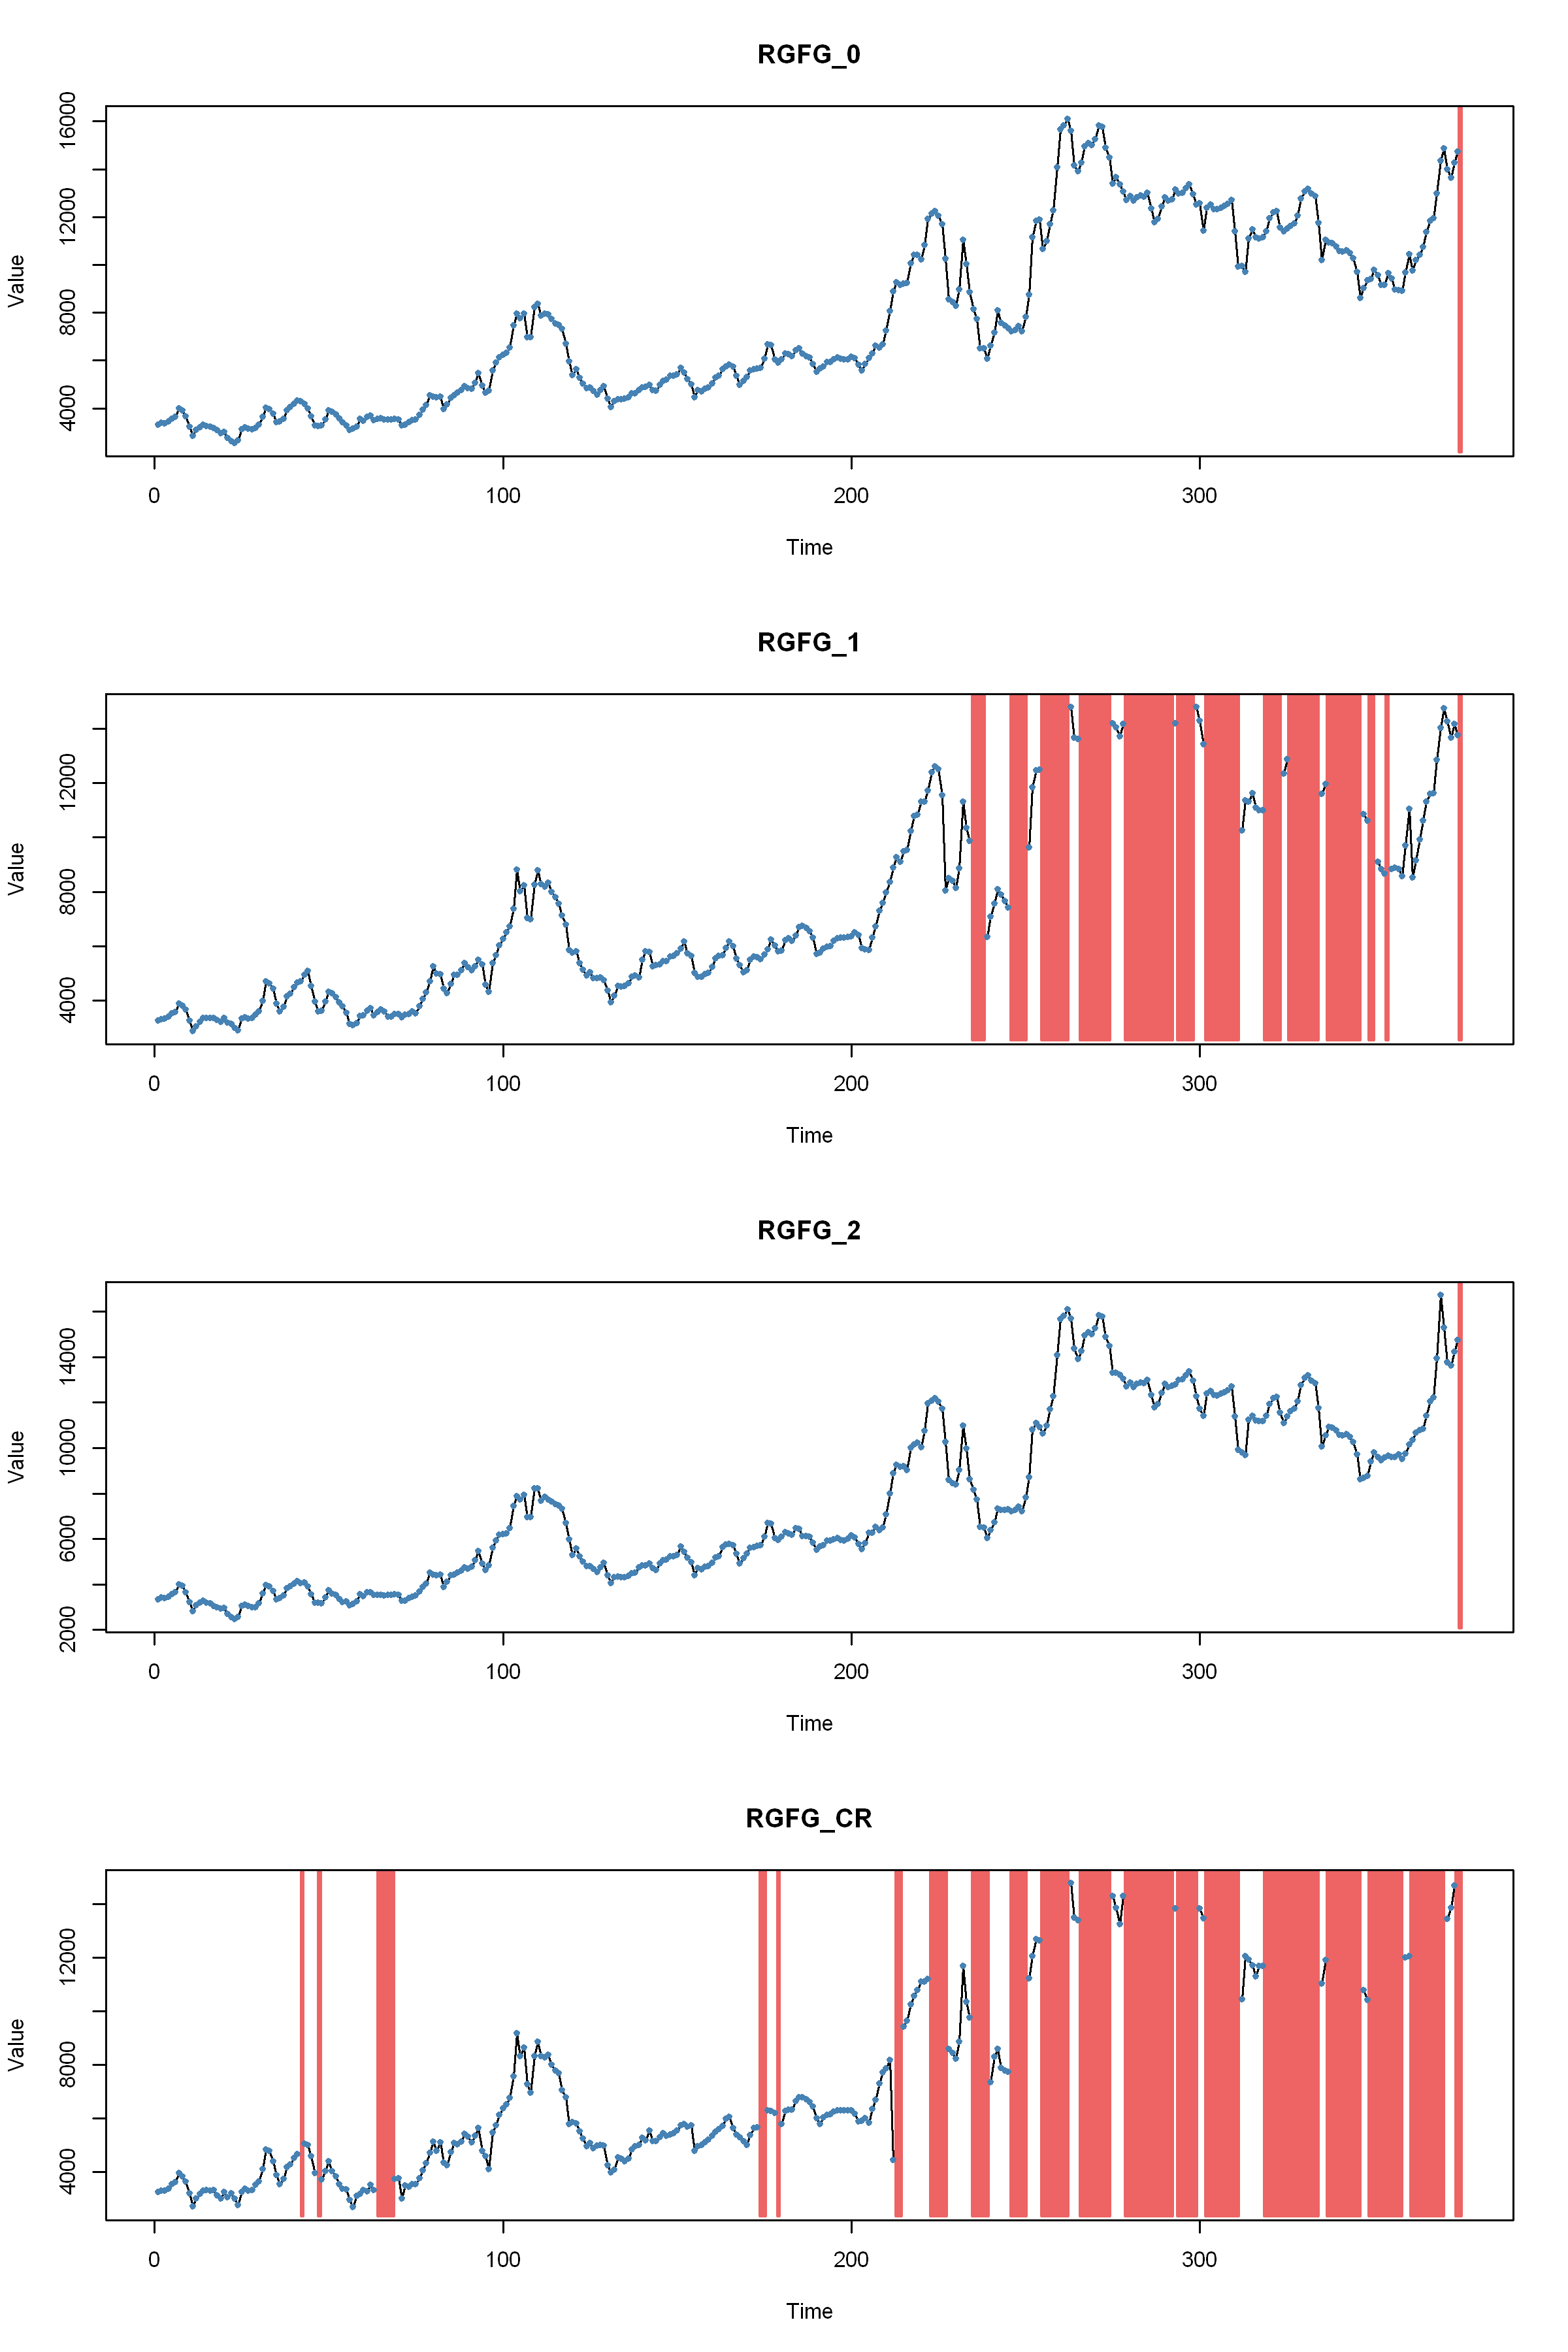

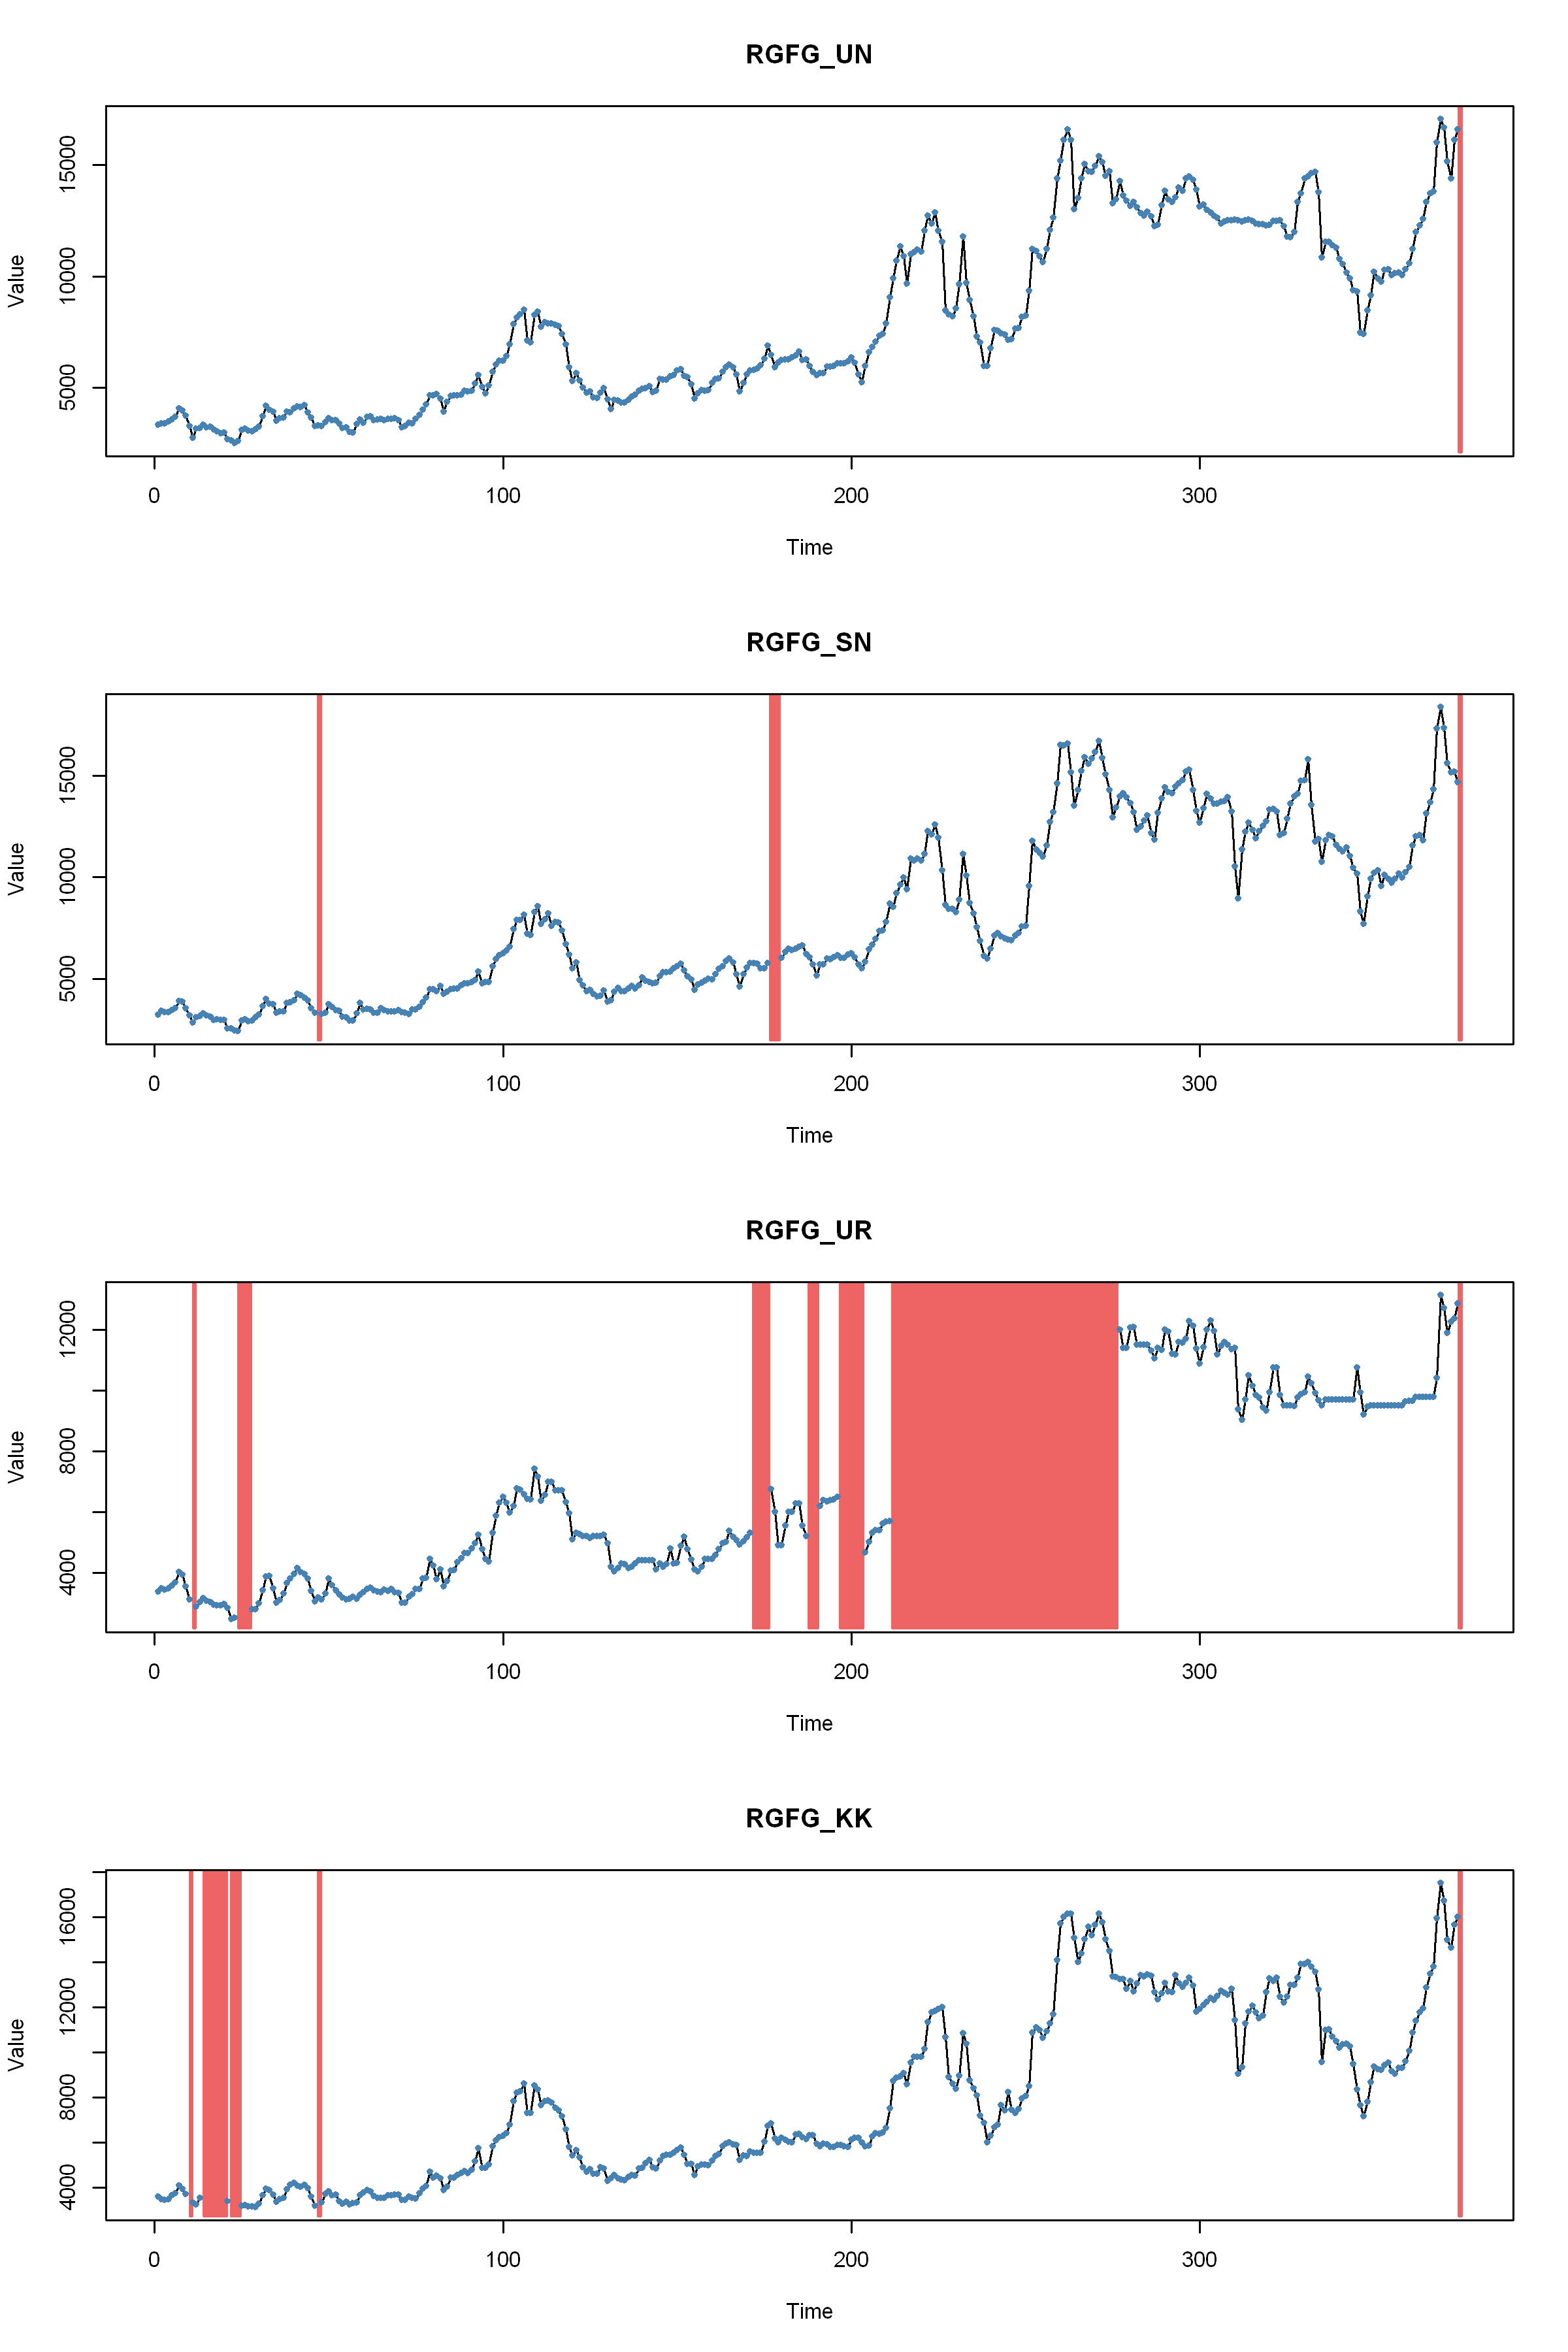

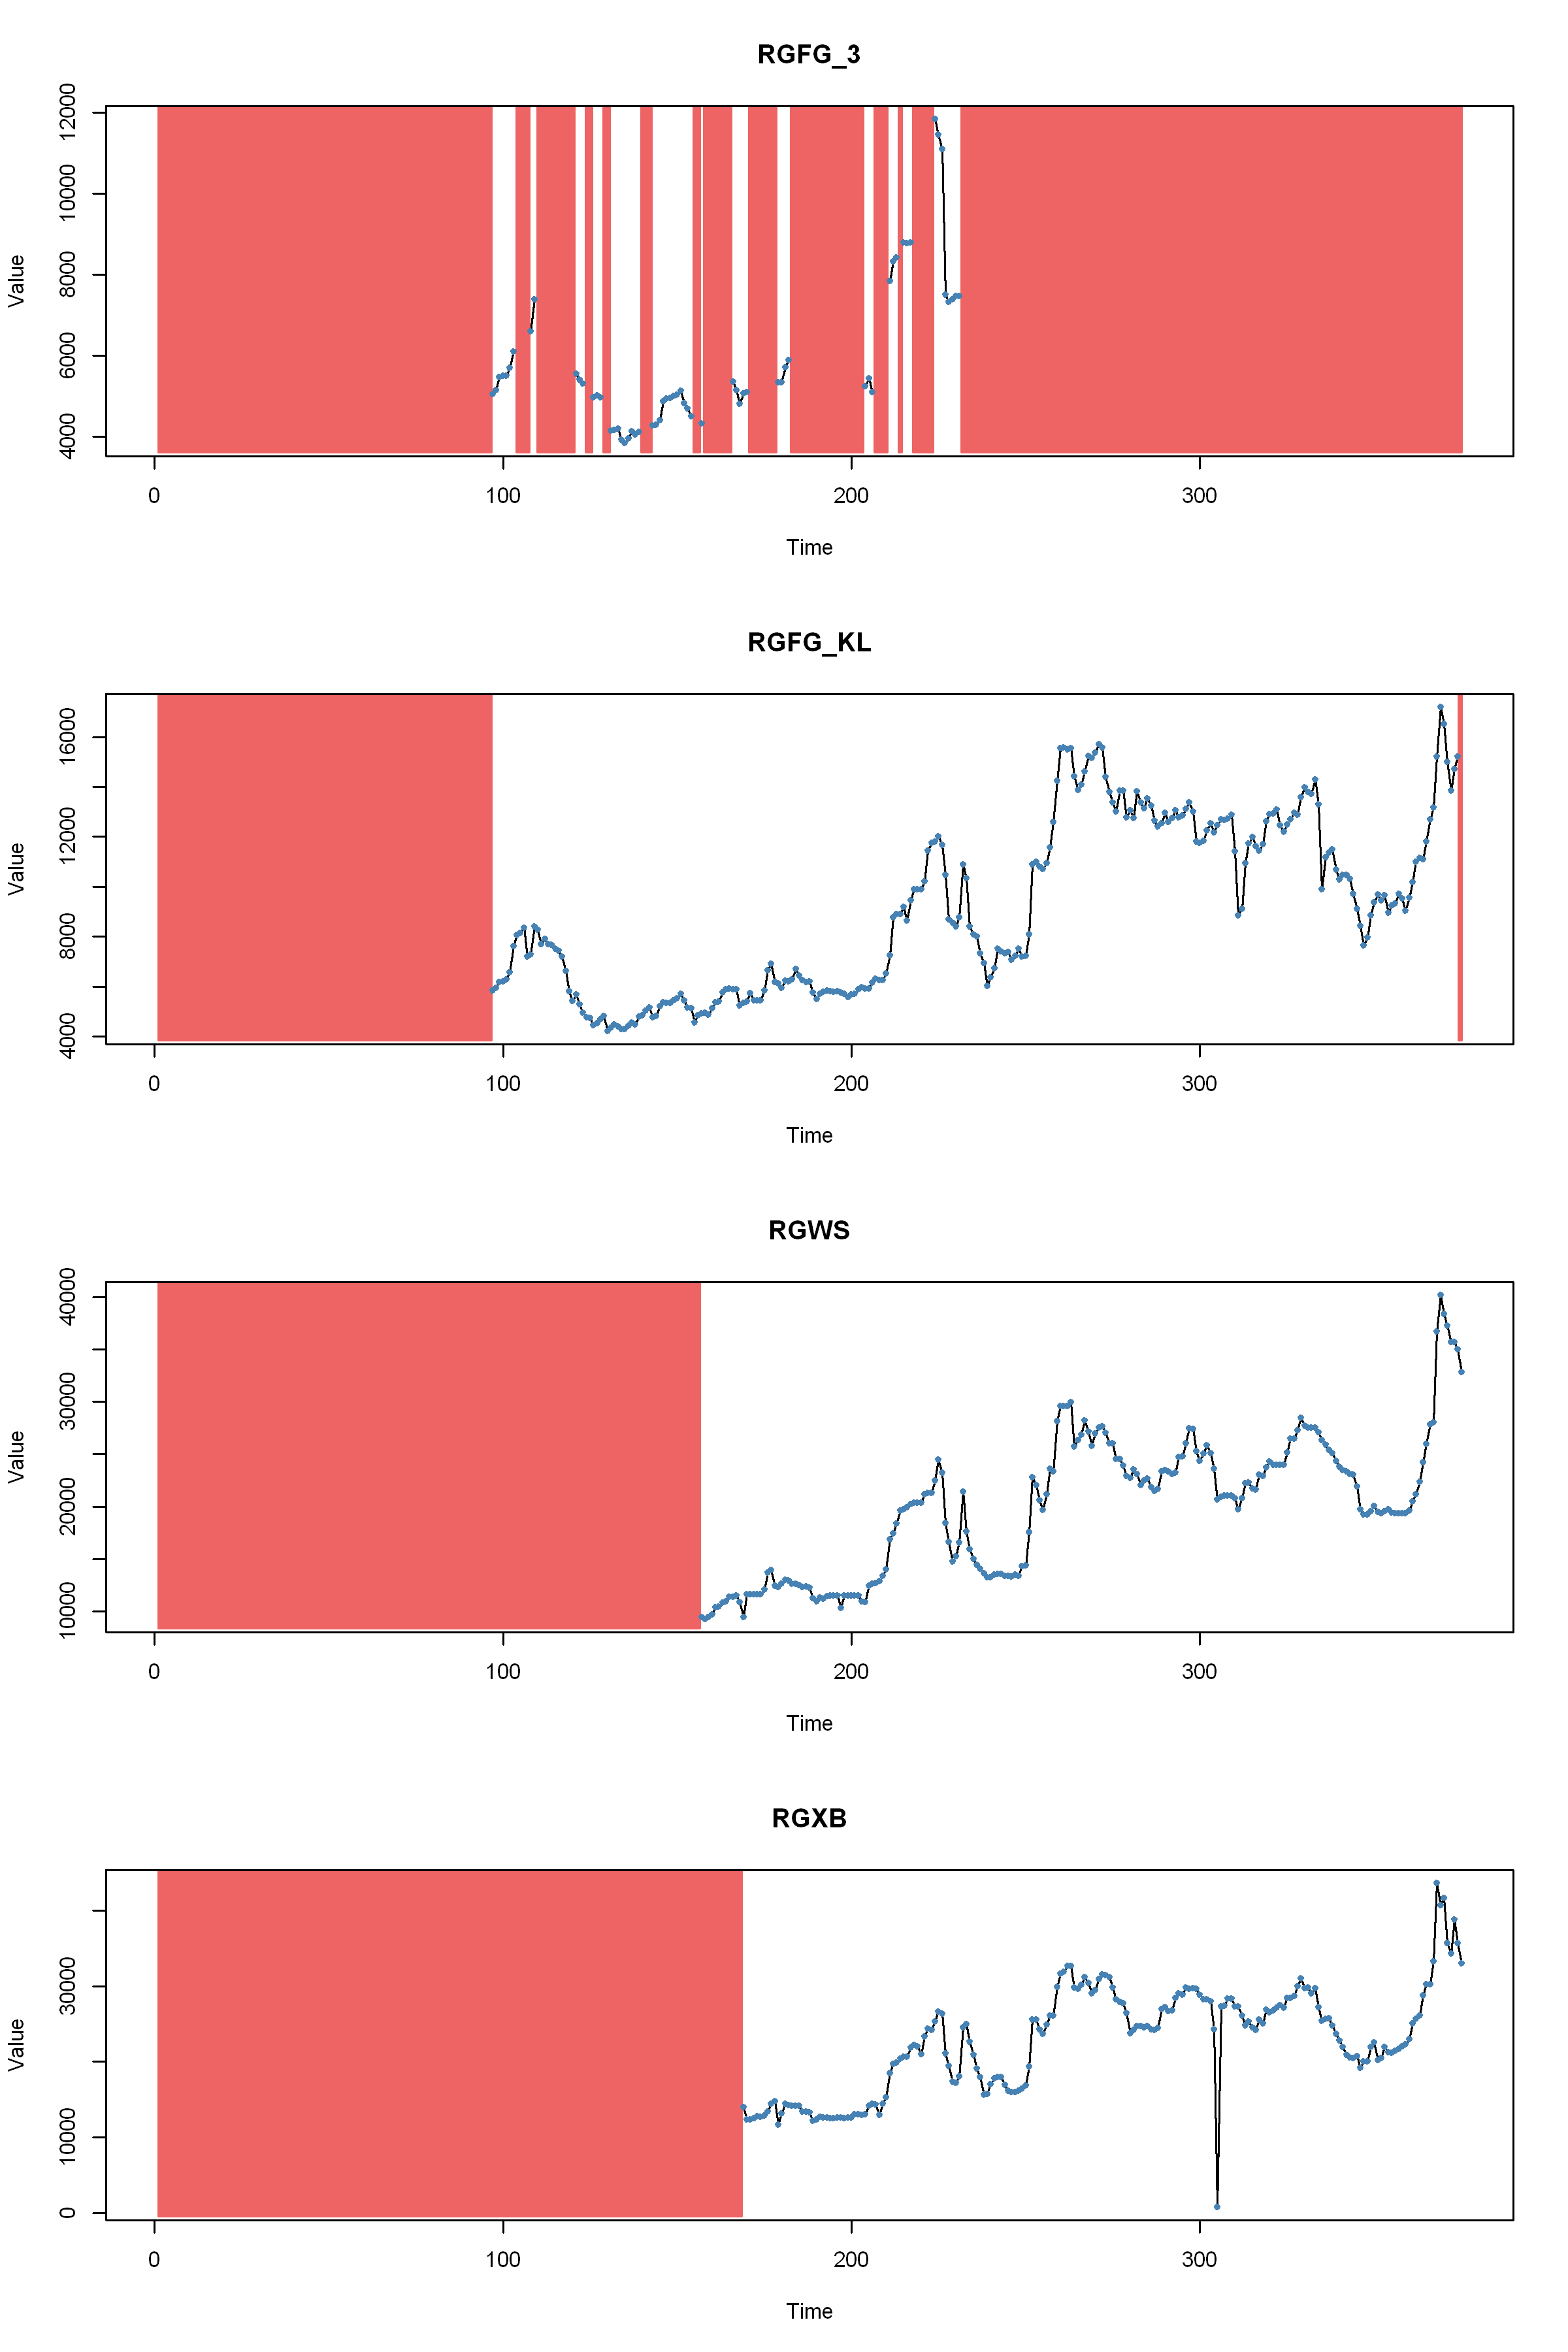

In [14]:
cols = names(price_xts)[startsWith(names(price_xts), 'RG')]
fgp = price_xts[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(fgp)) {
  plotNA.distribution(fgp[,i], main=names(fgp)[i])
}

## กราฟ

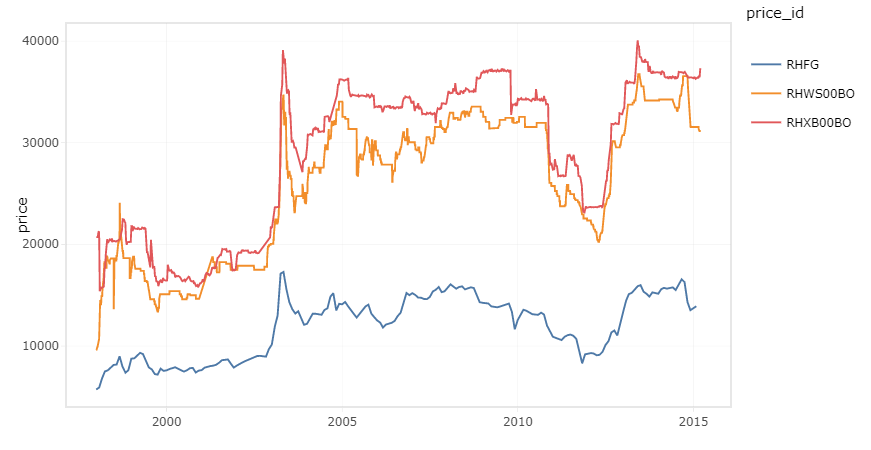

In [126]:
data = rice_price %>%
    filter(year(date)>2002) %>%
    filter((place=='เฉลี่ยทั้งประเทศ' & price_id=='RHFG') |
           price_id=='RHWS00BO' | price_id=='RHXB00BO'
          )

g = ggplot(data, aes(date, amount, colour=price_id)) +
    geom_line() + xlab("") + ylab("price") +
    scale_color_tableau() + 
    theme_light()
ggplotly(g)

# Backup

In [69]:
# rice_fg_wide = rice_price %>%
#   filter(grepl('FG', price_id)) %>%
#   filter(!is.na(amount)) %>%
#   filter(!is.na(date)) %>%
#   left_join(tbl_admin_tha1, by=c("place" = "name_oae1")) %>%
#   mutate(place_id = str_replace_all(HASC_1, "TH.", "")) %>%
#   mutate(new_price_id=paste(price_id, place_id, sep="_")) %>%
#   mutate(month = floor_date(date, "month")) %>%
#   filter(new_price_id %in% prices) %>%
#   select(month, place, new_price_id, amount) %>%
#   group_by(month, new_price_id) %>%
#   summarise(amount = mean(amount)) %>%
#   spread(new_price_id, amount)

# write.xlsx(rice_price_wide, '../data/rice/rice_price_wide.xlsx')

In [ ]:
# prices = c("RHWS00BO", "RHWS00BN", # hommali rice wholesale
#            "RHXB00BO", "RHXB00BN", # hommali rice export
#            "RWWS05GO", "RWWS05GN", # white rice wholesale 
#            "RWXB05GU", # white rice export 
#            "RGWS10LO", "RGWS10LN", # glutinous wholesale
#            "RGXB10GF", "RGXB10GS", "RGXB10GU", "RGXB10LU" # glutinous export
#           )

# rice_price_wide = rice_price %>%
#     select(-place) %>%
#     filter(price_id %in% prices) %>%
#     filter(!is.na(date)) %>%
#     mutate(month = floor_date(date, "month")) %>%
#     mutate(new_price_id = substr(price_id,start = 1, stop = 4)) %>%
#     group_by(month, new_price_id) %>%
#     summarise(amount = mean(amount)) %>%
#     spread(new_price_id, amount) %>%
#     right_join(rice_fg_wide, by="month")

In [63]:
check <- rice_price %>%
    filter(grepl('FG', price_id)) %>%
    mutate(count = !is.na(amount)) %>%
    group_by(place, price_id) %>%
    summarise(sum = sum(count)) %>%
    spread(price_id, sum)

write.xlsx(check, '../data/rice/check.xlsx')

# สร้างตารางอธิบายชื่อ ข้อมูลราคา (`tbl_rice_price`)

In [132]:
# library(rio)
# data_list <- import_list("../data/data_dict.xlsx")

# A <- data_list$aa['aa']
# B <- data_list$bb['bb']
# C <- data_list$cc['cc']
# D <- data_list$d['d']
# E <- data_list$e['e']

# price_id_names <- unique(rice_price$price_id)

# tbl_rice_price <- crossing(A,B,C,D,E) %>% 
#     mutate(price_id = pmap_chr(., paste, sep="")) %>%
#     mutate(price_id = str_replace_all(price_id, "Z", "")) %>%
#     filter(price_id %in% price_id_names)

# tbl_rice_price <- tbl_price_rice %>%
#     left_join(data_list$aa) %>%
#     left_join(data_list$bb) %>%
#     left_join(data_list$cc) %>%
#     left_join(data_list$d) %>%
#     left_join(data_list$e) %>%
#     unite(price_name, c(aa_name, bb_name, cc_name, d_name, e_name), sep = " ", remove = FALSE) %>%
#     unite(price_name_th, c(aa_name_th, bb_name_th, cc_name_th, d_name_th, e_name_th), sep = " ", remove = FALSE) %>%
#     mutate(price_name = str_replace_all(price_name, "NA", "")) %>% 
#     mutate(price_name_th = str_replace_all(price_name_th, "NA", ""))

# write.xlsx(tbl_rice_price, '../data/rice/tbl_rice_price.xlsx')

In [133]:
# count_by_price_id <- rice_price %>%
#     group_by(price_id) %>%
#     summarize(sum(!is.na(amount))) %>%
#     left_join(tbl_rice_price)
# write.xlsx(count_by_price_id, '../data/rice/count_by_price_id.xlsx')

In [134]:
# write.xlsx(unique(rice_fg$place), 'changwat.xlsx')